#Case study

##E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been positioned as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. 

#####***Five major factors*** 
that contributed to the success of an e-commerce store have been identified as: 
service quality, system quality, information quality, trust and net benefit. 


The research furthermore investigated the factors that influence the online #####***customers repeat purchase intention***. 

The combination of both ***utilitarian value and hedonistic values*** are needed to affect the repeat purchase intention (loyalty) positively. 

The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


###Be careful: 
There are two sheets (one is detailed) and second is encoded in the excel file. You may use any of them by extracting in separate excel sheet. The number of column(s) is more than 47. Read the column header carefully.

####Note : 
Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.   

Need not to create machine learning models /but still if anybody comes with it that is welcome.


Disclaimer:  The datasets and figure(s) are highly confidential. Any kind of commercial activities find with the content will be taken strict action. The dataset is only available for academic purpose. 


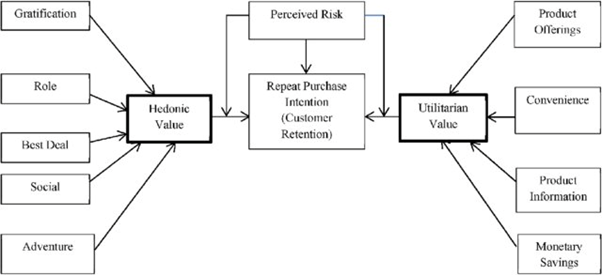

Five major factors that contributed to the success of an e-commerce store have been identified as: 

1. Service quality
2. System quality
3. Information quality
4. Trust
5. Net benefit.

The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both ***utilitarian value*** and ***hedonistic values*** are needed to affect the repeat purchase intention (loyalty) positively.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [ ]:
df = pd.read_excel('/content/customer_retention_dataset.xlsx')
enc_df = pd.read_excel('/content/customer_retention_dataset.xlsx', 1)

In [ ]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [ ]:
enc_df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

The detailed dataset will be a better choice for data analysis.

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

In [ ]:
df.isnull().sum().sum()

0

Observations:

There are no null values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   1Gender of respondent                                                                                         269 non-null    object
 1   2 How old are you?                                                                                            269 non-null    object
 2   3 Which city do you shop online from?                                                                         269 non-null    object
 3   4 What is the Pin Code of where you shop online from?                                                         269 non-null    int64 
 4   5 Since How Long You are Shopping Online ?                    

Observations:

All the columns are of object type other than '4 What is the Pin Code of where you shop online from? which is an int type.

In [ ]:
df.shape

(269, 71)

In [ ]:
df.describe(exclude='int')

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print('*'*200)

1Gender of respondent
Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
********************************************************************************************************************************************************************************************************
2 How old are you?
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you?, dtype: int64
********************************************************************************************************************************************************************************************************
3 Which city do you shop online from?
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
*******

In [ ]:
def plot_count(data, col, fig_size = None):
  values = df[col].unique()
  print(f"The unique values in '{col}' are [{', '.join(values)}]")
  print(f'The unique value counts are as follows:\n{df[col].value_counts()}')
  
  if fig_size:
    plt.figure(figsize=fig_size)
  else:
    plt.figure(figsize=(len(values)*3,len(values)*3))
  ax = sns.countplot(x=col, data = data)


  i = 0
  for p in ax.patches:  
    percentage= data[data[col] == values[i]][col].count() / data.shape[0] * 100
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(percentage, 2)}%', (x + width/2, y + height*1.02), ha='center')
    ax.annotate(f'count={height}', (x + width/2, y + height*0.5), ha='center')
    i+=1

  sns.despine()
  plt.show()

The unique values in '1Gender of respondent' are [Male, Female]
The unique value counts are as follows:
Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


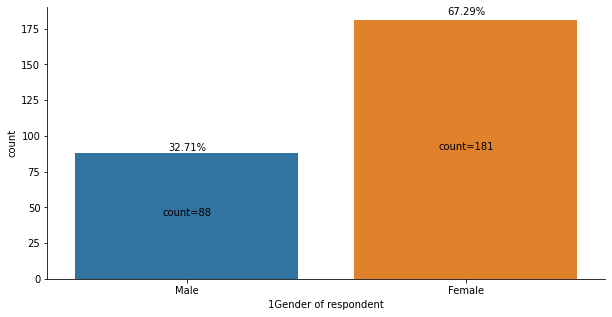

In [ ]:
plot_count(df, '1Gender of respondent',(10,5))

Observations:

This dataset contains more female respondents than male.

The unique values in '2 How old are you?' are [31-40 years, 21-30 years, 41-50 yaers, Less than 20 years, 51 years and above]
The unique value counts are as follows:
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you?, dtype: int64


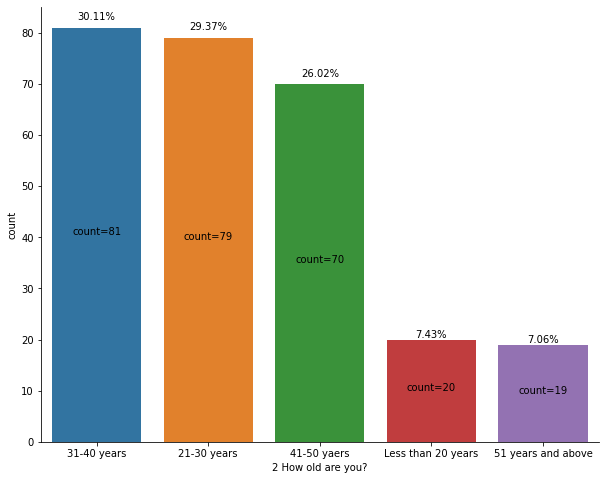

In [ ]:
plot_count(df, '2 How old are you?',(10,8))

Observations:

1. Most of the respondents are in the age groups of 30s, 20s and 40s as 1st, 2nd and 3rd places.
2. The age groups less than 20 and 51 and above are very less.

The unique values in '3 Which city do you shop online from?' are [Delhi, Greater Noida, Karnal , Bangalore , Noida, Solan, Moradabad, Gurgaon , Merrut, Ghaziabad, Bulandshahr]
The unique value counts are as follows:
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


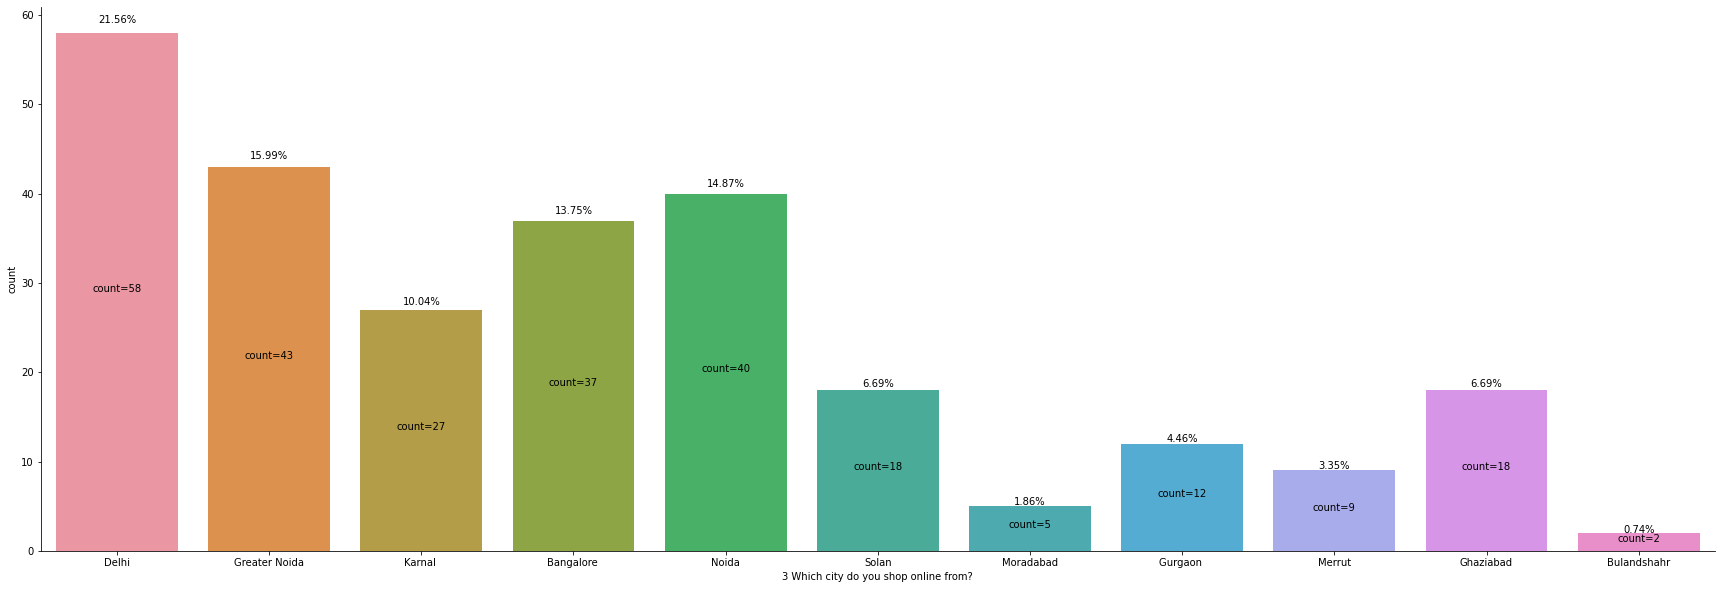

In [ ]:
plot_count(df, '3 Which city do you shop online from?', (30,10))

Observations:
1. Among the available cities, Delhi has the higest number of respondents followed by Greater Noida, Noida, Banglore in the subsequent places.
2. Bulandshahr has the lowest number of respodents.

Look at each city and see which sites are popular there

The unique values in '5 Since How Long You are Shopping Online ?' are [Above 4 years, 3-4 years, 2-3 years, Less than 1 year, 1-2 years]
The unique value counts are as follows:
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64


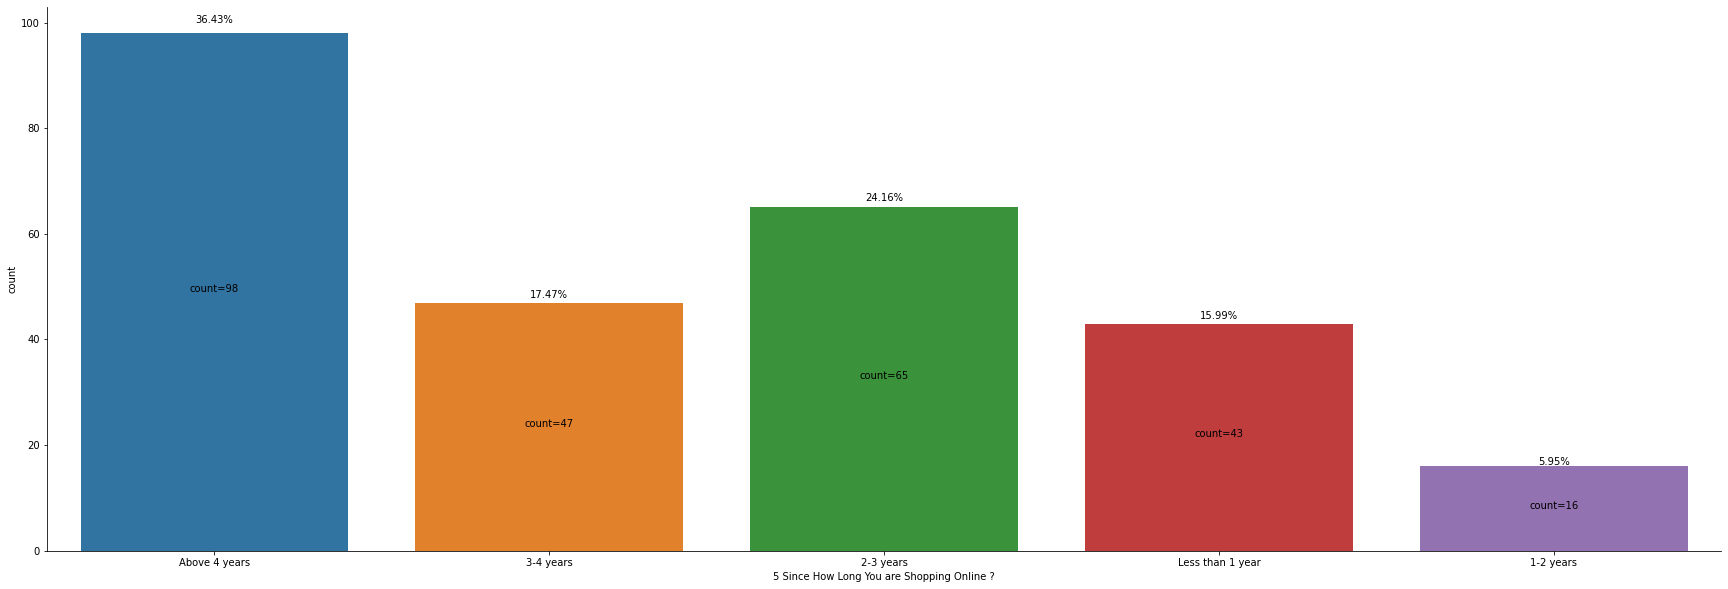

In [ ]:
plot_count(df, '5 Since How Long You are Shopping Online ?', (30,10))

Observations:
1. The data shows that Most of the customers are using online shopping for more than 4 years. This indicates that there is a large number of repeat customers.
2. There is also an increased number of customers using online shopping within 1 year than customers using online shopping for 1-2 years. This indicates that online shopping is getting popular again recently although there was a slight decrease in the 1-2 years' population.

Look at each of these years and see which age groups fall in each

The unique values in '7 How do you access the internet while shopping on-line?' are [Dial-up, Wi-Fi, Mobile Internet, Mobile internet]
The unique value counts are as follows:
Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64


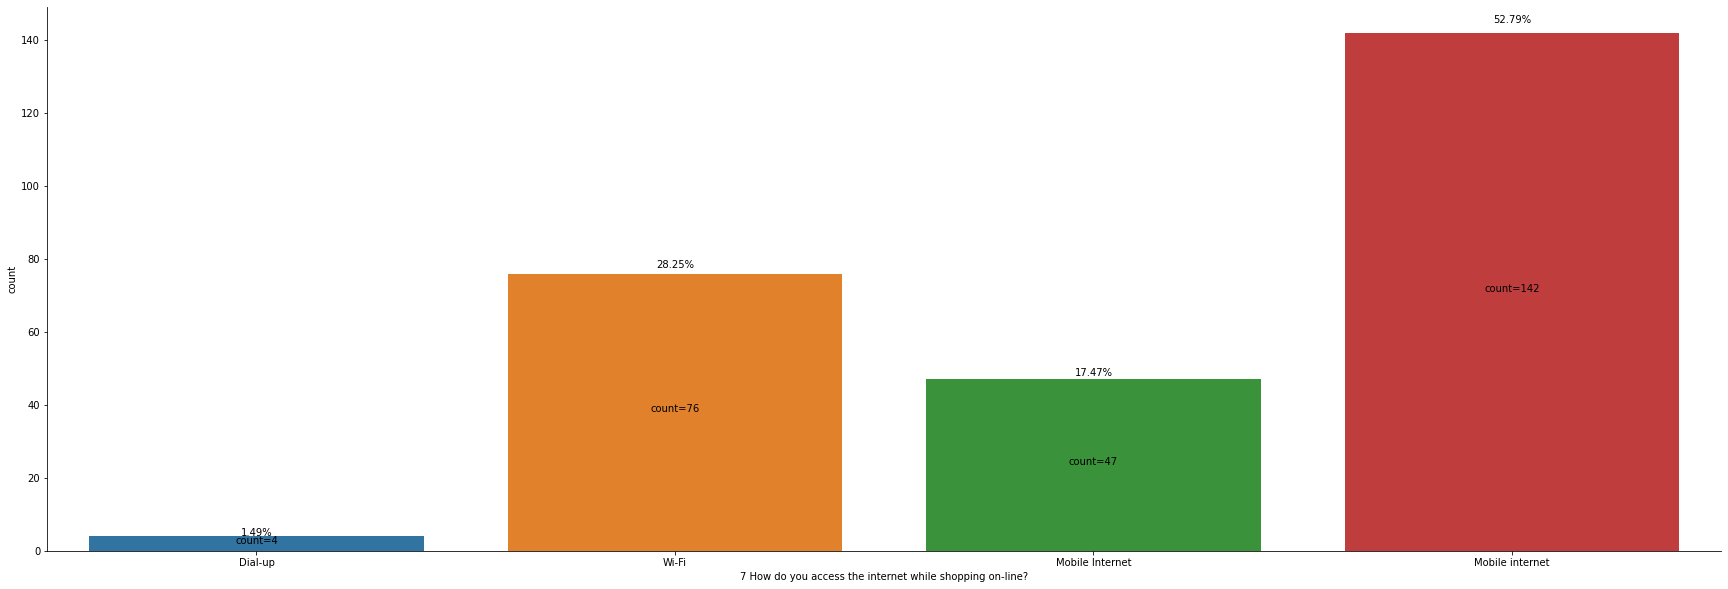

In [ ]:
plot_count(df, '7 How do you access the internet while shopping on-line?', (30,10))

Observations:
1. The 'Mobile internet' and 'Mobile Internet' both are same values. These can be combined.

In [ ]:
df['7 How do you access the internet while shopping on-line?'] = df['7 How do you access the internet while shopping on-line?'].apply(lambda x: 'Mobile internet' if x == 'Mobile Internet' else x)

The unique values in '7 How do you access the internet while shopping on-line?' are [Dial-up, Wi-Fi, Mobile internet]
The unique value counts are as follows:
Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64


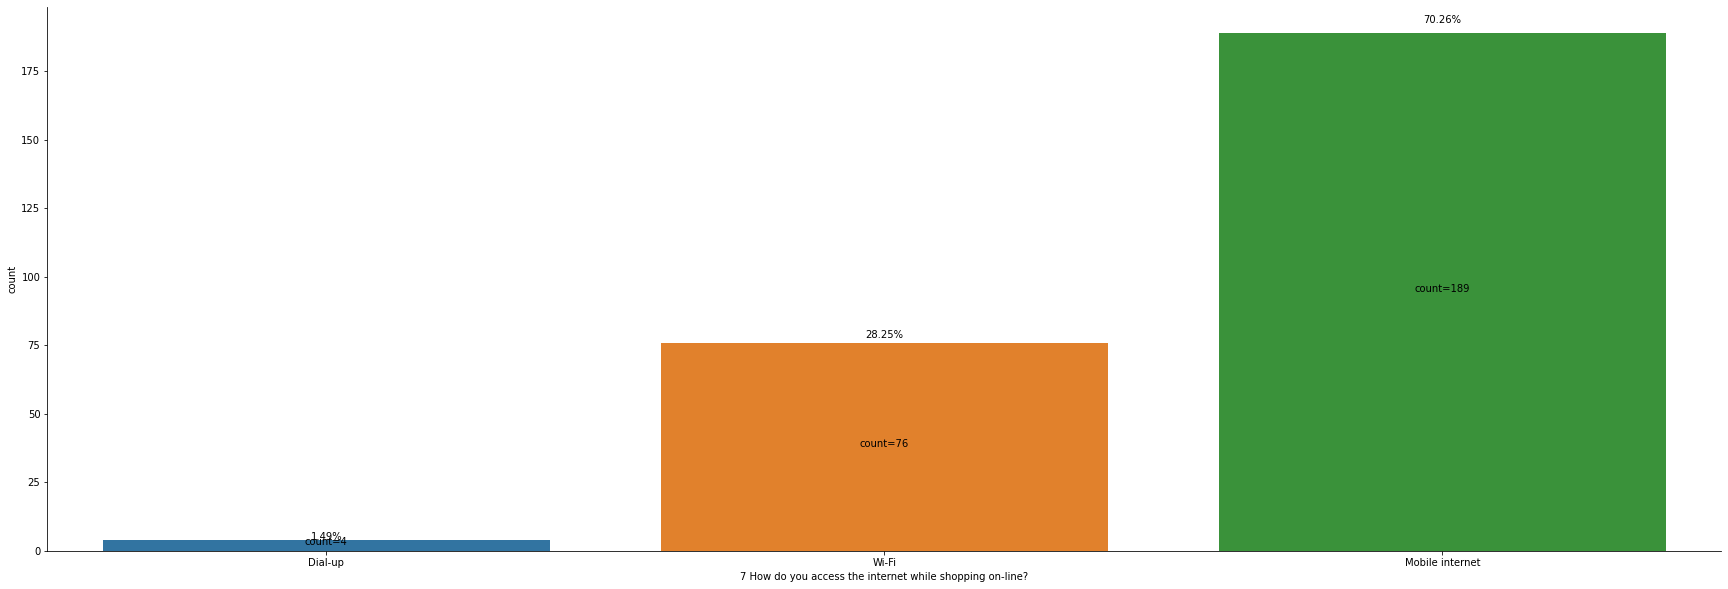

In [ ]:
plot_count(df, '7 How do you access the internet while shopping on-line?', (30,10))

Observations:
1. Most of the customers are using 'Mobile internet' to access internet to shop online.

The unique values in '8 Which device do you use to access the online shopping?' are [Desktop, Smartphone, Tablet, Laptop]
The unique value counts are as follows:
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64


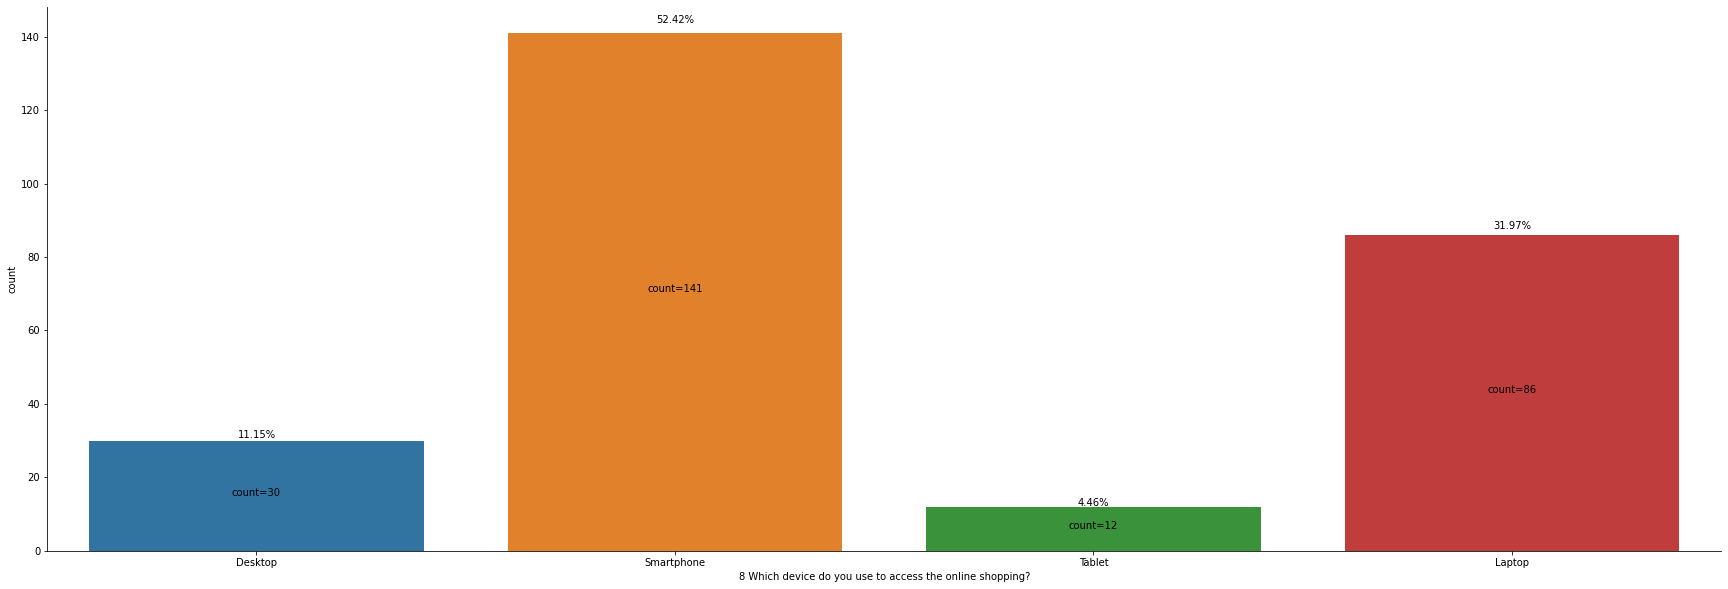

In [ ]:
plot_count(df, '8 Which device do you use to access the online shopping?', (30,10))

Observations:
1. Smartphone is the most used device to visit online shopping stores. About 52% of the customers use smartphone to visit the store.

The unique values in '10 What is the operating system (OS) of your device?' are [Window/windows Mobile, IOS/Mac, Android]
The unique value counts are as follows:
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?, dtype: int64


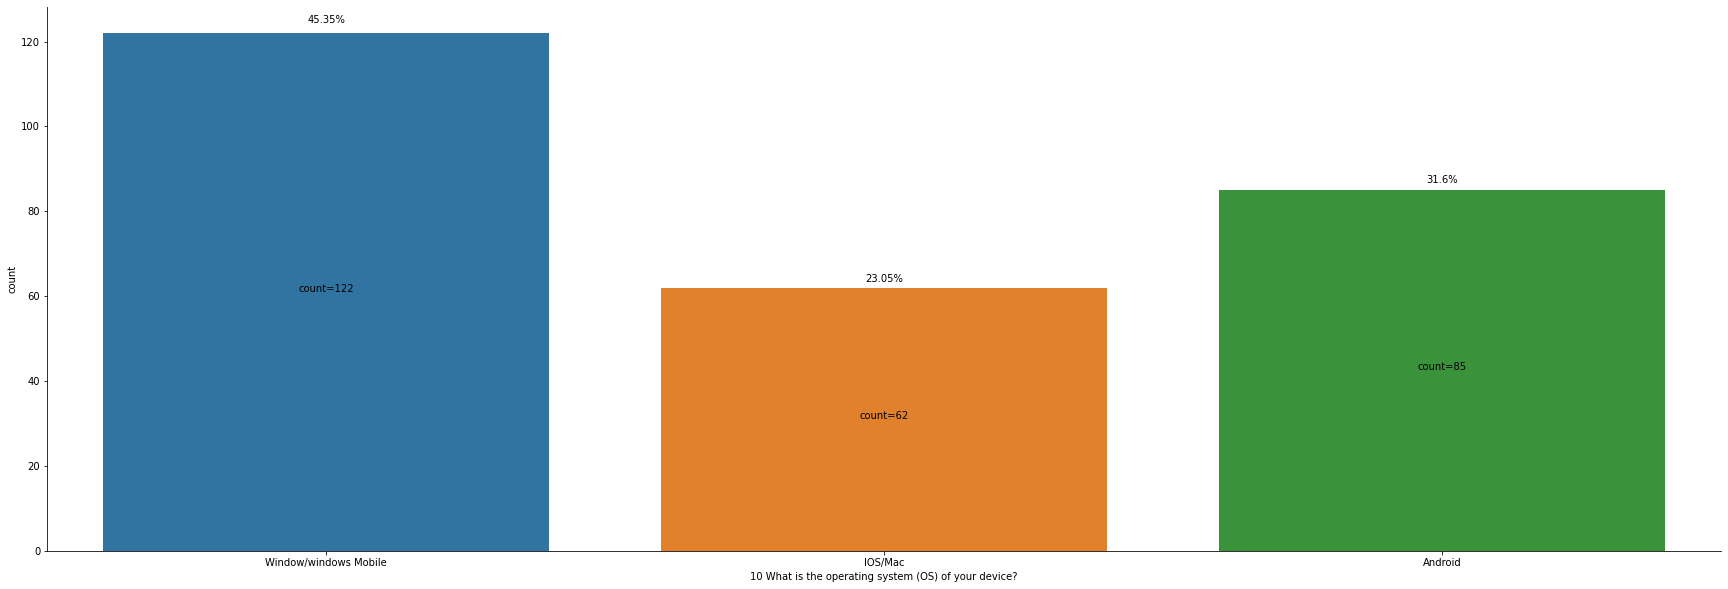

In [ ]:
plot_count(df, '10 What is the operating system (OS) of your device?', (30,10))

The unique values in '12 Which channel did you follow to arrive at your favorite online store for the first time?' are [Search Engine, Content Marketing, Display Adverts]
The unique value counts are as follows:
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?, dtype: int64


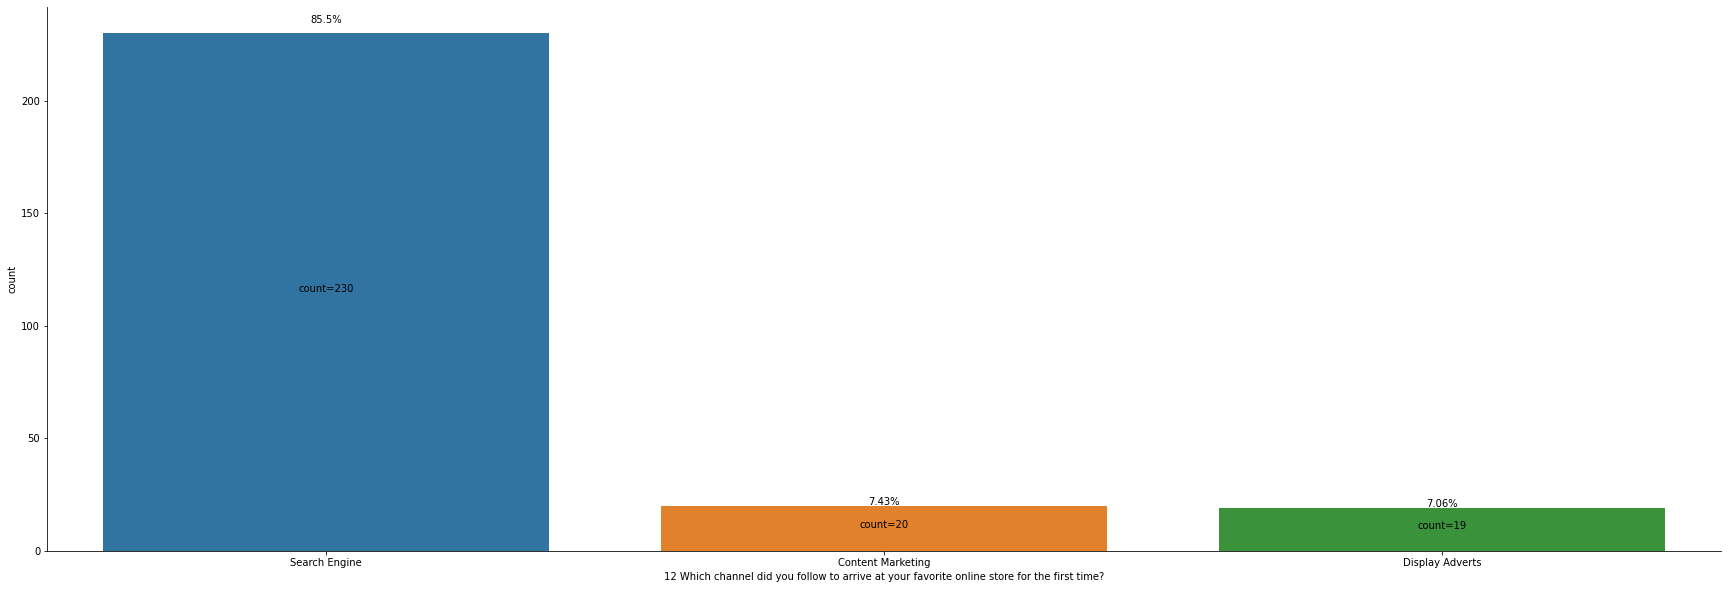

In [ ]:
plot_count(df, '12 Which channel did you follow to arrive at your favorite online store for the first time?', (30,10))

Observations:
1. About 85.5% of the customers are coming into online stores for the first time through Search engines.

The unique values in '13 After first visit, how do you reach the online retail store?' are [Search Engine, Via application, Direct URL, E-mail, Social Media]
The unique value counts are as follows:
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?, dtype: int64


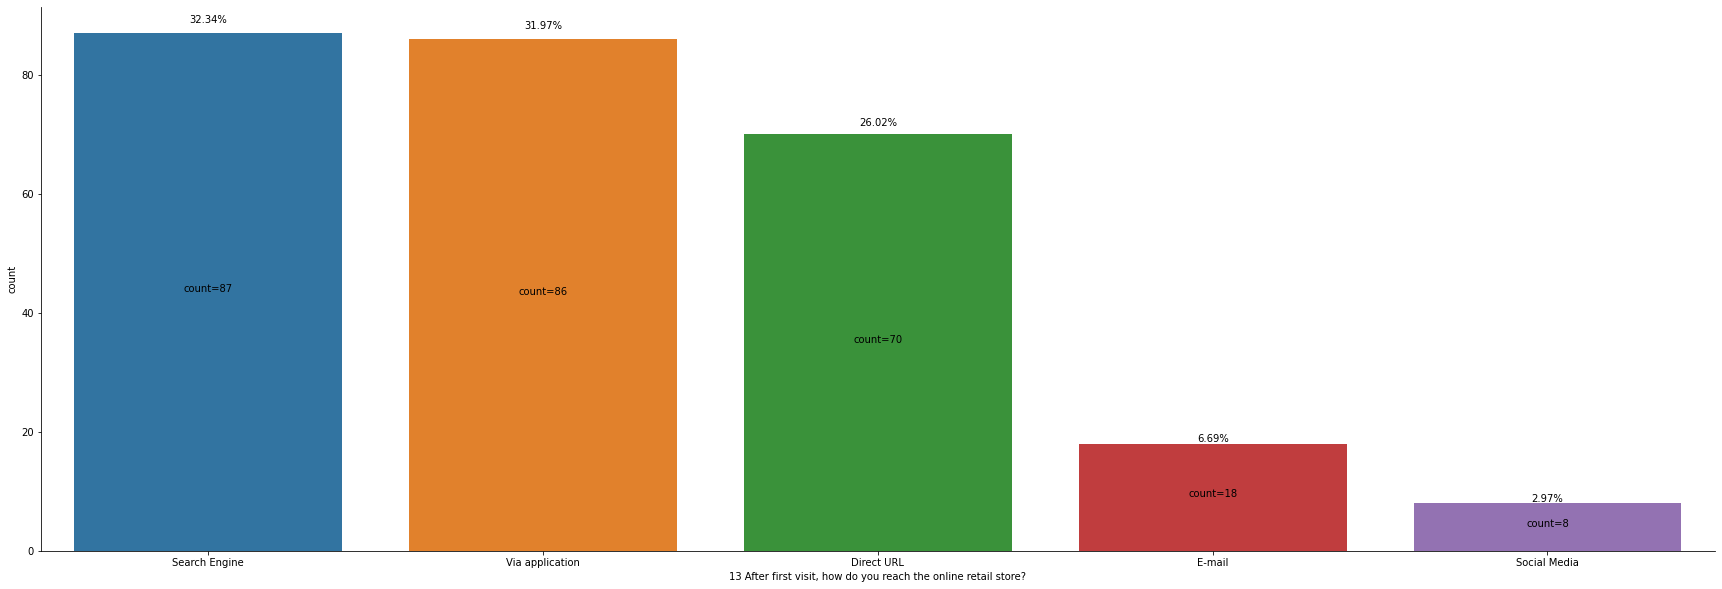

In [ ]:
plot_count(df, '13 After first visit, how do you reach the online retail store?', (30,10))

Observations:
1. The repeat customers are using Search engines and applications to come back to the online stores after.
2. Social media channel is the least used channel.

The unique values in '14 How much time do you explore the e- retail store before making a purchase decision?' are [6-10 mins, more than 15 mins, 11-15 mins, 1-5 mins, Less than 1 min]
The unique value counts are as follows:
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?, dtype: int64


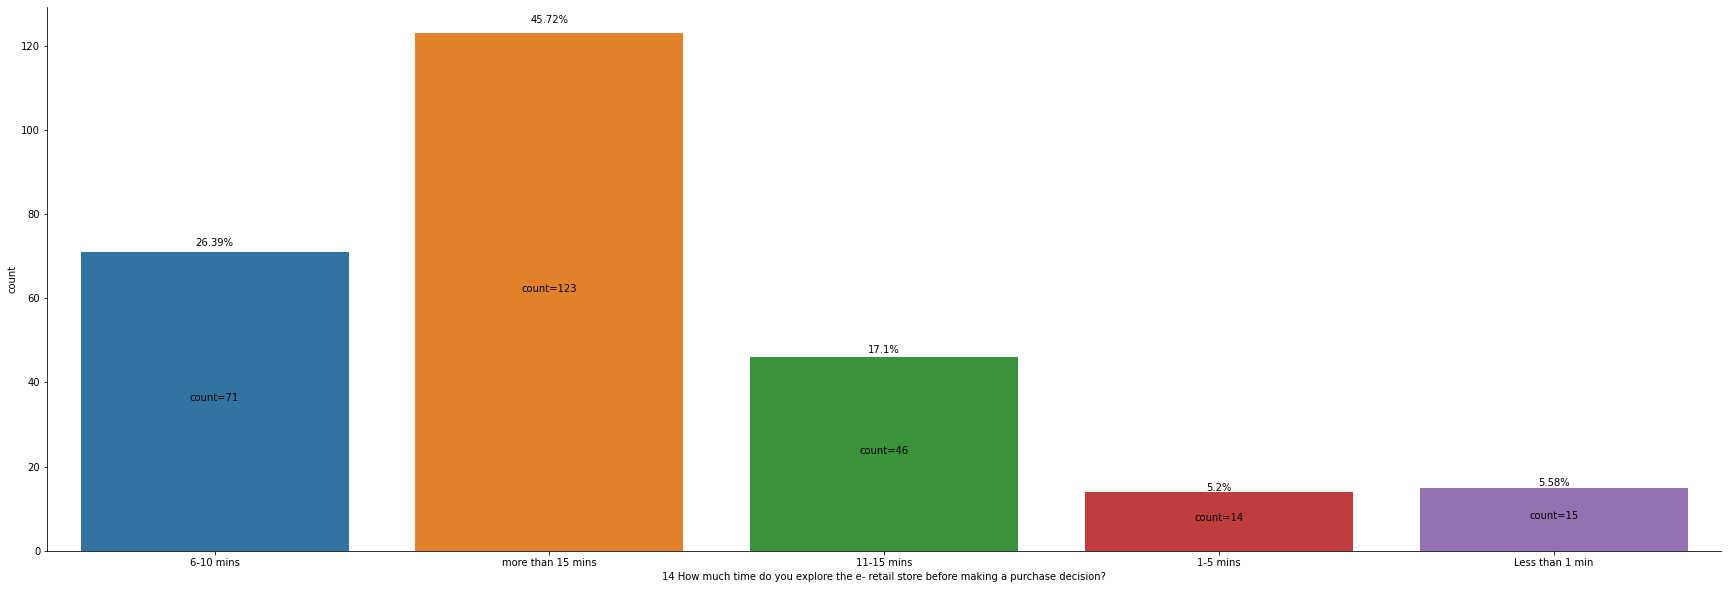

In [ ]:
plot_count(df, '14 How much time do you explore the e- retail store before making a purchase decision?', (30,10))

Observations:
1. From the dataset we can see that about 45.7% of the customers are taking atleast 15 mins to explore the store before making a purchase decision.
2. At least 5.58% of the customers are on the store only for less than 1 mins before making a purchase. This could be because they know what they want and just visit to purchase it.

The unique values in '15 What is your preferred payment Option?' are [E-wallets (Paytm, Freecharge etc.), Credit/Debit cards, Cash on delivery (CoD)]
The unique value counts are as follows:
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?, dtype: int64


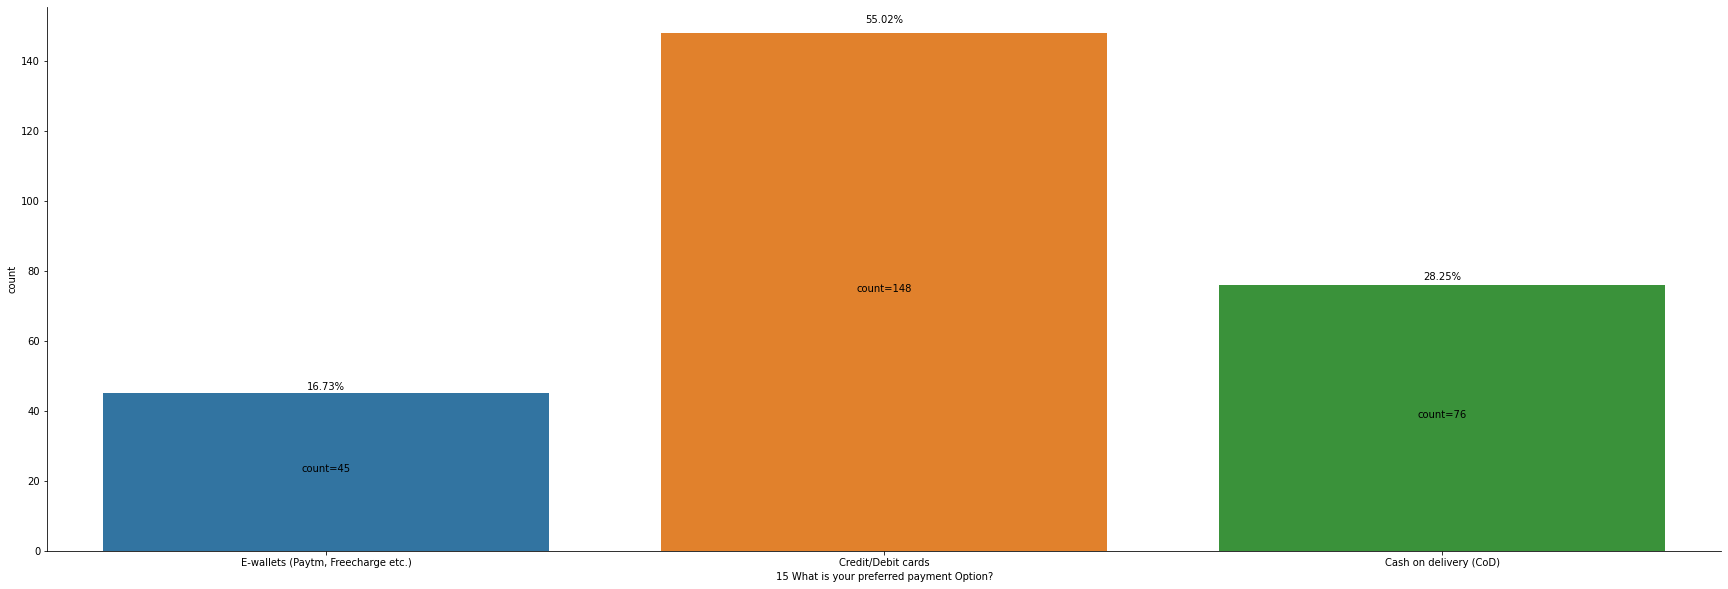

In [ ]:
plot_count(df, '15 What is your preferred payment Option?', (30,10))

Observations:
1. For about 55% of the customers the preferred payment option is Credit/Debit cards.
2. E-wallets are still the least preferred option.

The unique values in '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?' are [Sometimes, Very frequently, Never, Frequently]
The unique value counts are as follows:
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?, dtype: int64


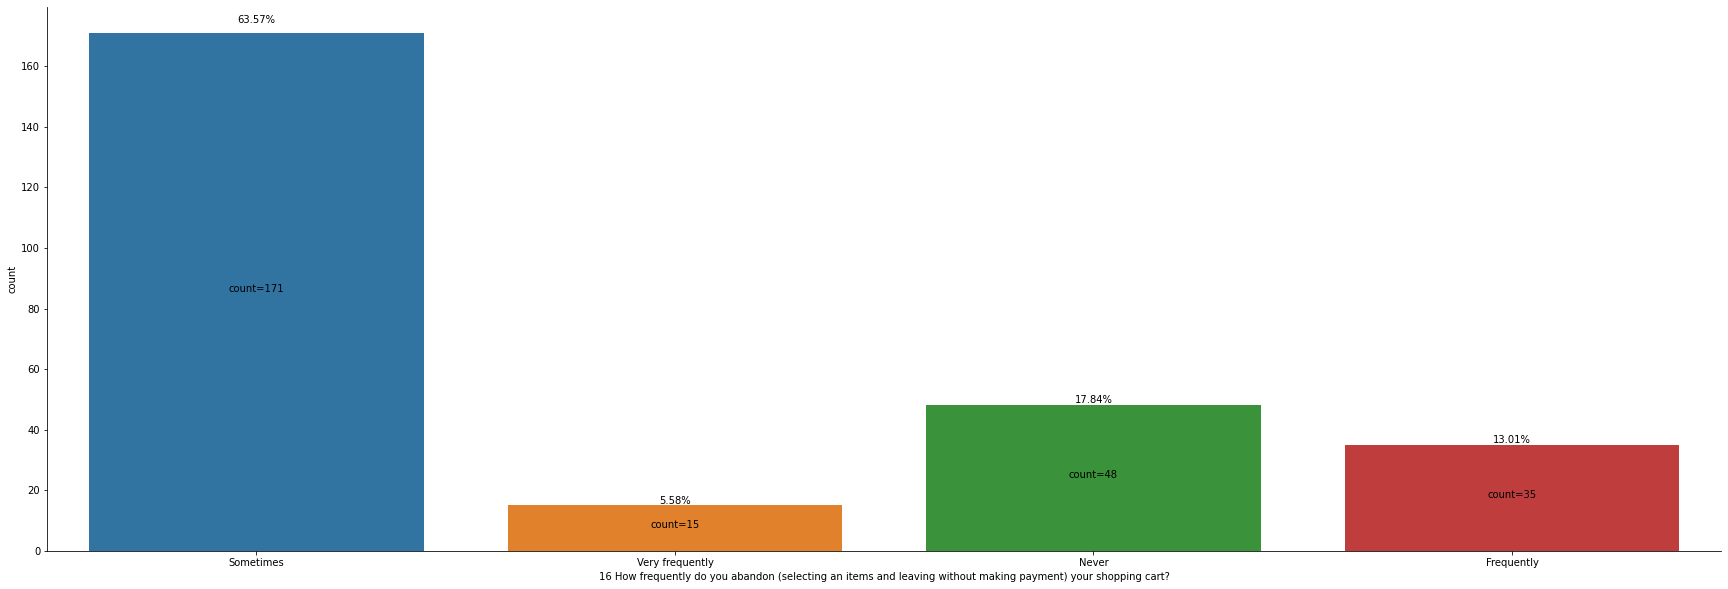

In [ ]:
plot_count(df, '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', (30,10))

Observations:
1. A large portion of the population abandon the shopping cart sometimes.
2. About 17.84% of the population never abandon the cart.
3. About 17.5% of the customers abandon the cart frequently/very frequently.

Observe why each of these population are abandoning the cart?

The unique values in '17 Why did you abandon the “Bag”, “Shopping Cart”?' are [Lack of trust, Promo code not applicable, Better alternative offer, Change in price, No preferred mode of payment]
The unique value counts are as follows:
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?, dtype: int64


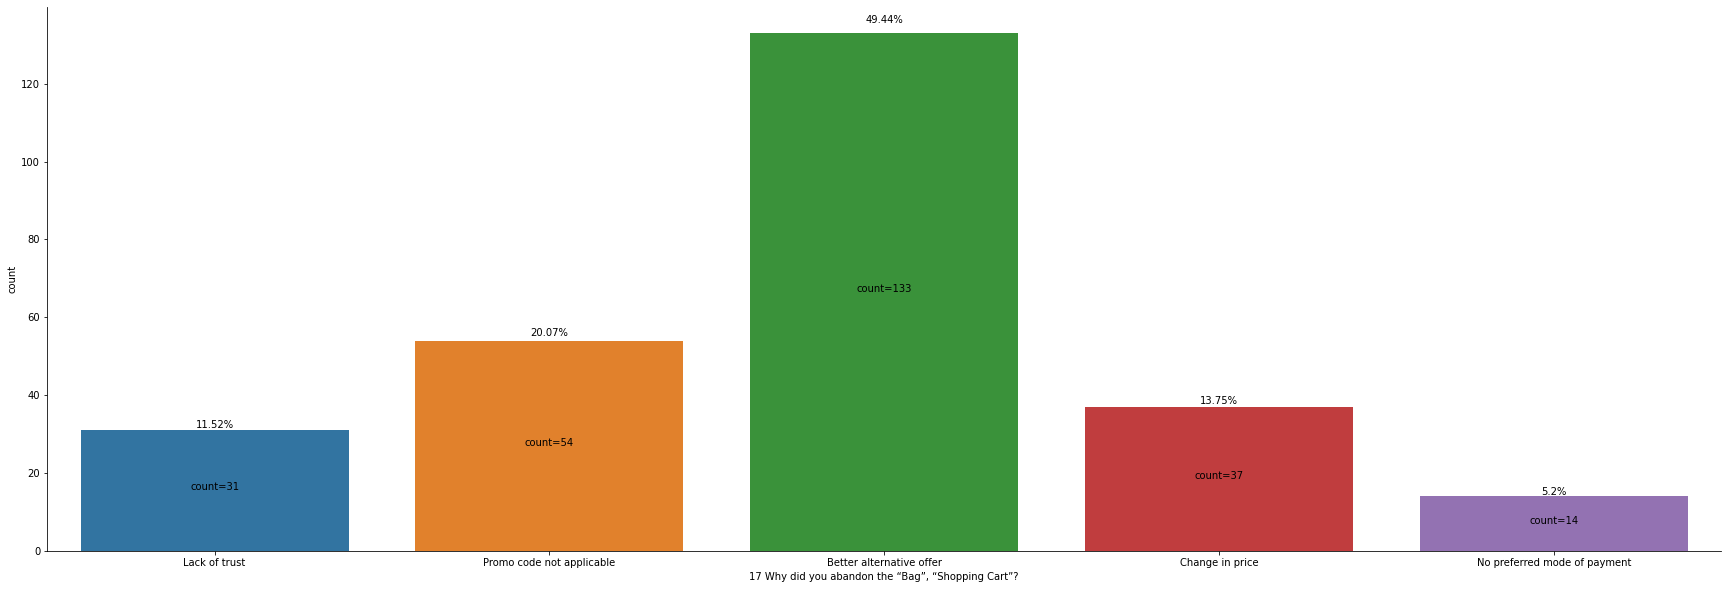

In [ ]:
plot_count(df, '17 Why did you abandon the “Bag”, “Shopping Cart”?', (30,10))

Observations:
1. The top reason for abandoning the cart is that the customers have found a better alternative offers. This indicates that we need to keep the best offers up to date always.
2. About 11.52% of the population have a lack of trust in the online stores. This can be fixed by updating the web security and letting the customers know how protected the store is through some policy pages.
3. At least 5.2% of the customers did not see their preferred mode of payments. 

The unique values in '18 The content on the website must be easy to read and understand' are [Agree (4), Strongly agree (5), Strongly disagree (1), Indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64


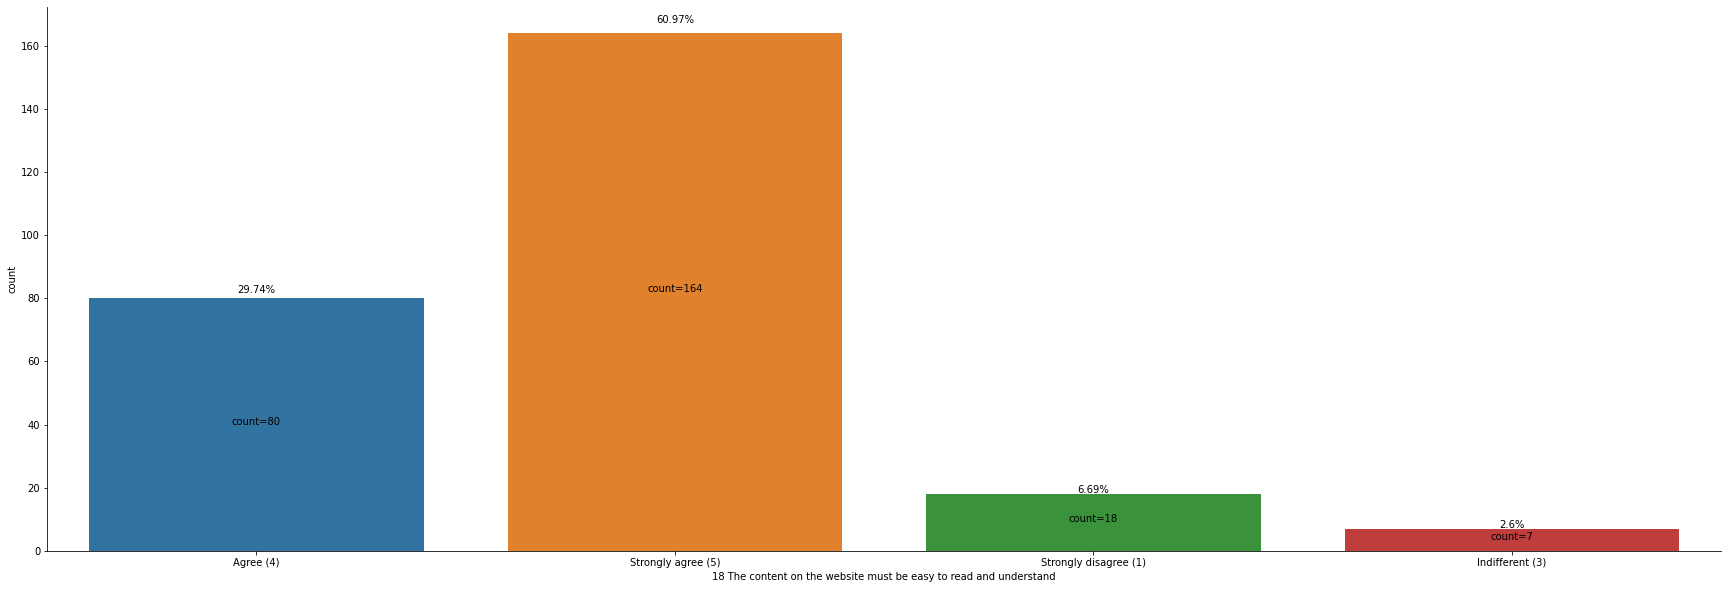

In [ ]:
plot_count(df, '18 The content on the website must be easy to read and understand', (30,10))

Observations:
1. About 90% of the customers Strongly agree/agree that the content on the website must be easy to read and understand.

The unique values in '19 Information on similar product to the one highlighted  is important for product comparison' are [Indifferent (3), Strongly agree (5), Agree (4), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64


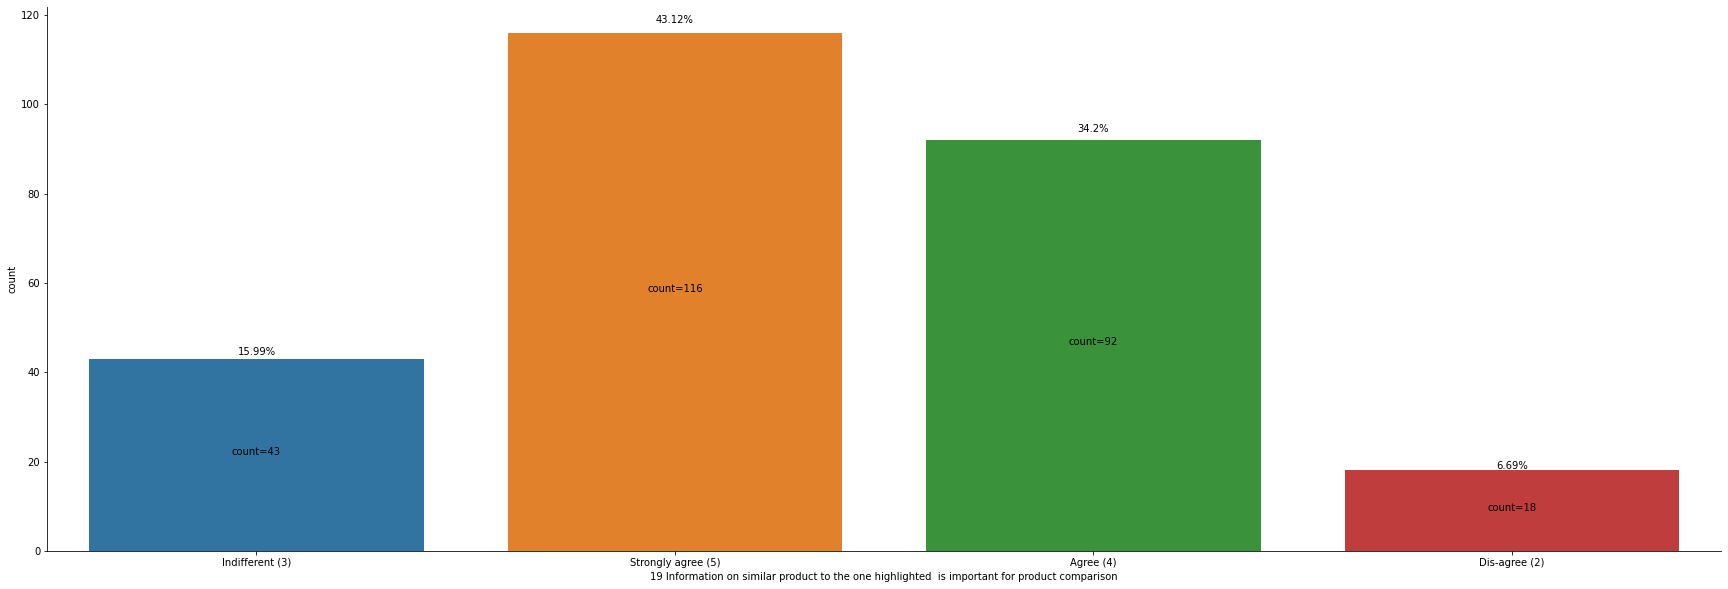

In [ ]:
plot_count(df, '19 Information on similar product to the one highlighted  is important for product comparison', (30,10))

Observations:
1. About 77% of the population agree/Strongly agree that the information on similar products to the one highlighted is important for product comparison.

The unique values in '20 Complete information on listed seller and product being offered is important for purchase decision.' are [Indifferent (3), Strongly agree (5), Agree (4), Dis-agree (2), Strongly disagree (1)]
The unique value counts are as follows:
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


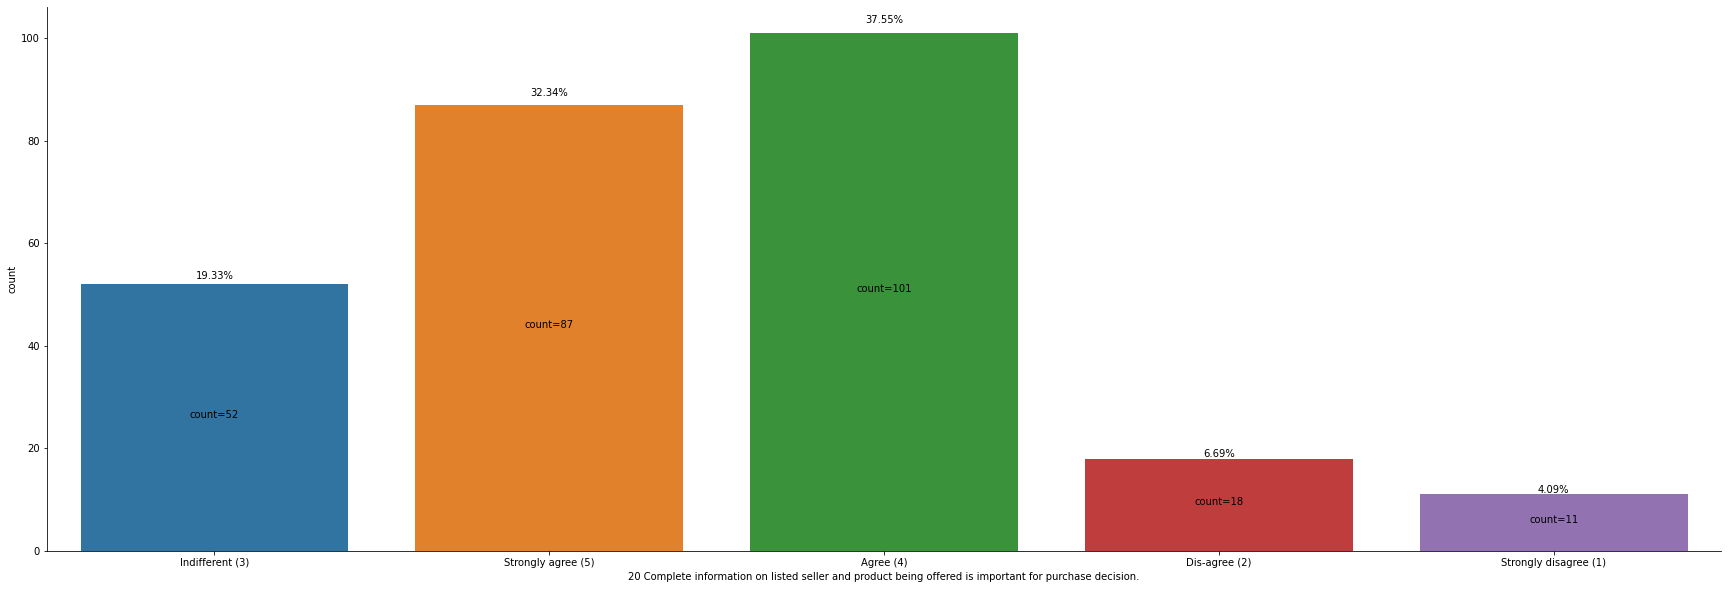

In [ ]:
plot_count(df, '20 Complete information on listed seller and product being offered is important for purchase decision.', (30,10))

Observations:
1. About 69% of the customers strongly agree/agree that the Complete information on listed seller and product being offered is important for purchase decision.

The unique values in '21 All relevant information on listed products must be stated clearly' are [Agree (4), Strongly agree (5), Strongly disagree (1), Dis-agree (2)]
The unique value counts are as follows:
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64


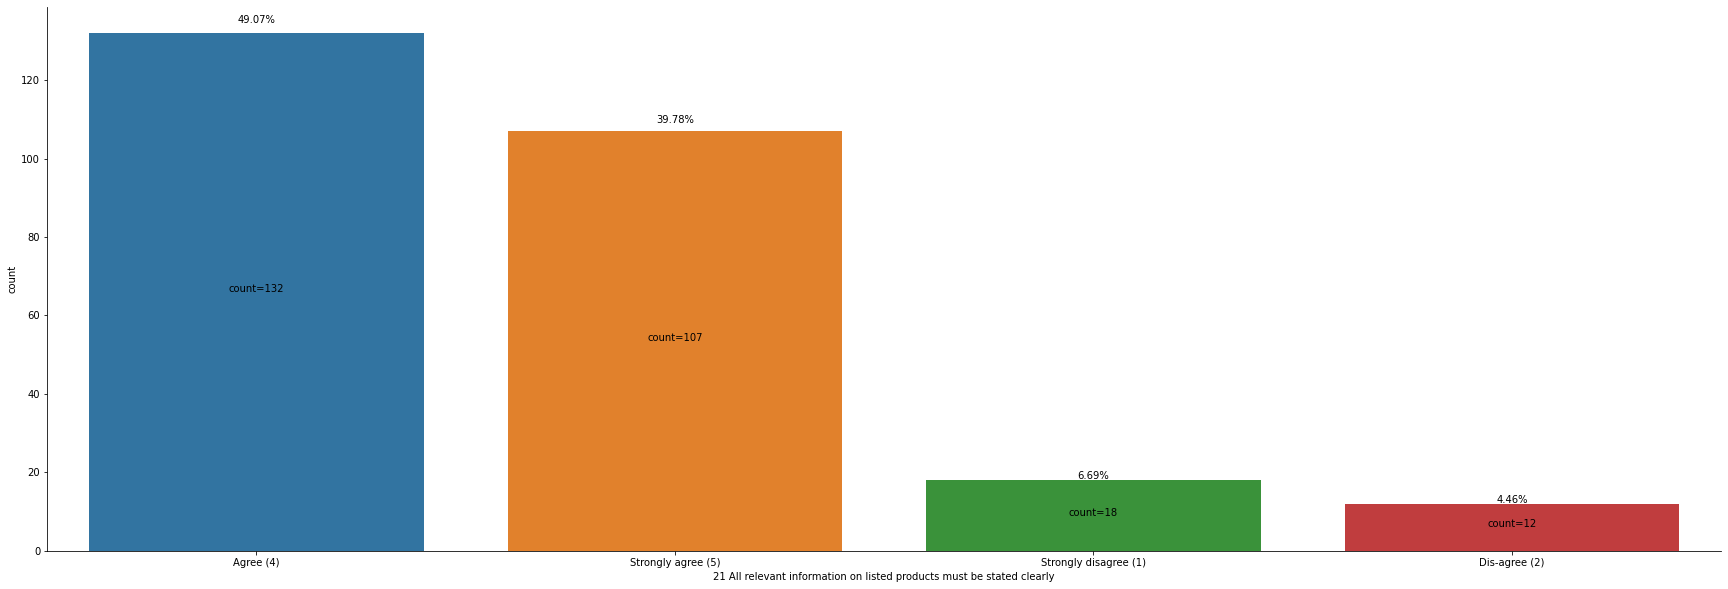

In [ ]:
plot_count(df, '21 All relevant information on listed products must be stated clearly', (30,10))

Observations:
1. About 90% of the customers feel that all relevant information on listed products must be stated clearly.

The unique values in '22 Ease of navigation in website' are [Agree (4), Strongly agree (5), Strongly disagree (1), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64


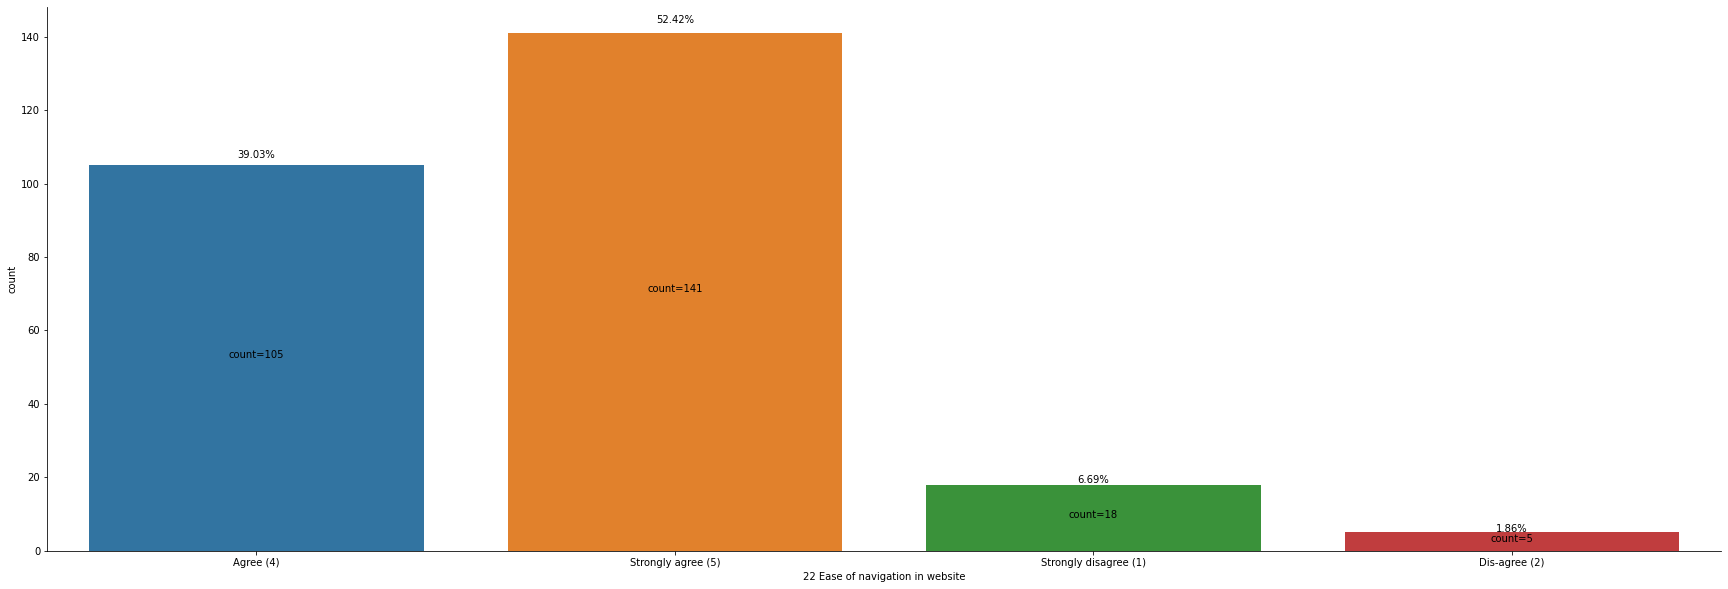

In [ ]:
plot_count(df, '22 Ease of navigation in website', (30,10))

Observaitons:
1. About 91% of the customers agree / strongly agree that ease of navigation is necessary in a website.

The unique values in '23 Loading and processing speed' are [Strongly disagree (1), Strongly agree (5), Agree (4), Dis-agree (2), Indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: 23 Loading and processing speed, dtype: int64


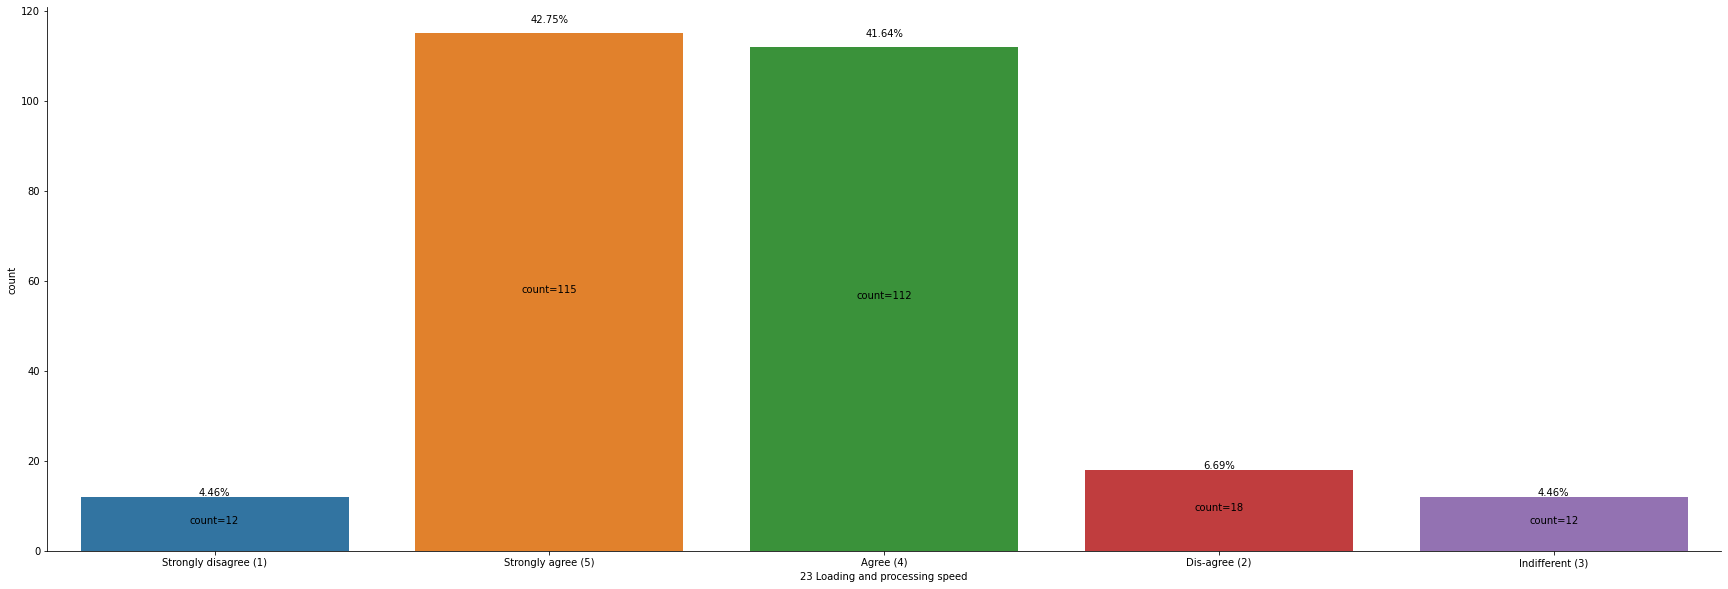

In [ ]:
plot_count(df, '23 Loading and processing speed', (30,10))

Observations:
1. As expected most customers agree/strongly agree that loading and processing speed is important.

The unique values in '24 User friendly Interface of the website' are [Dis-agree (2), Strongly agree (5), Agree (4), Strongly disagree (1), Indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64


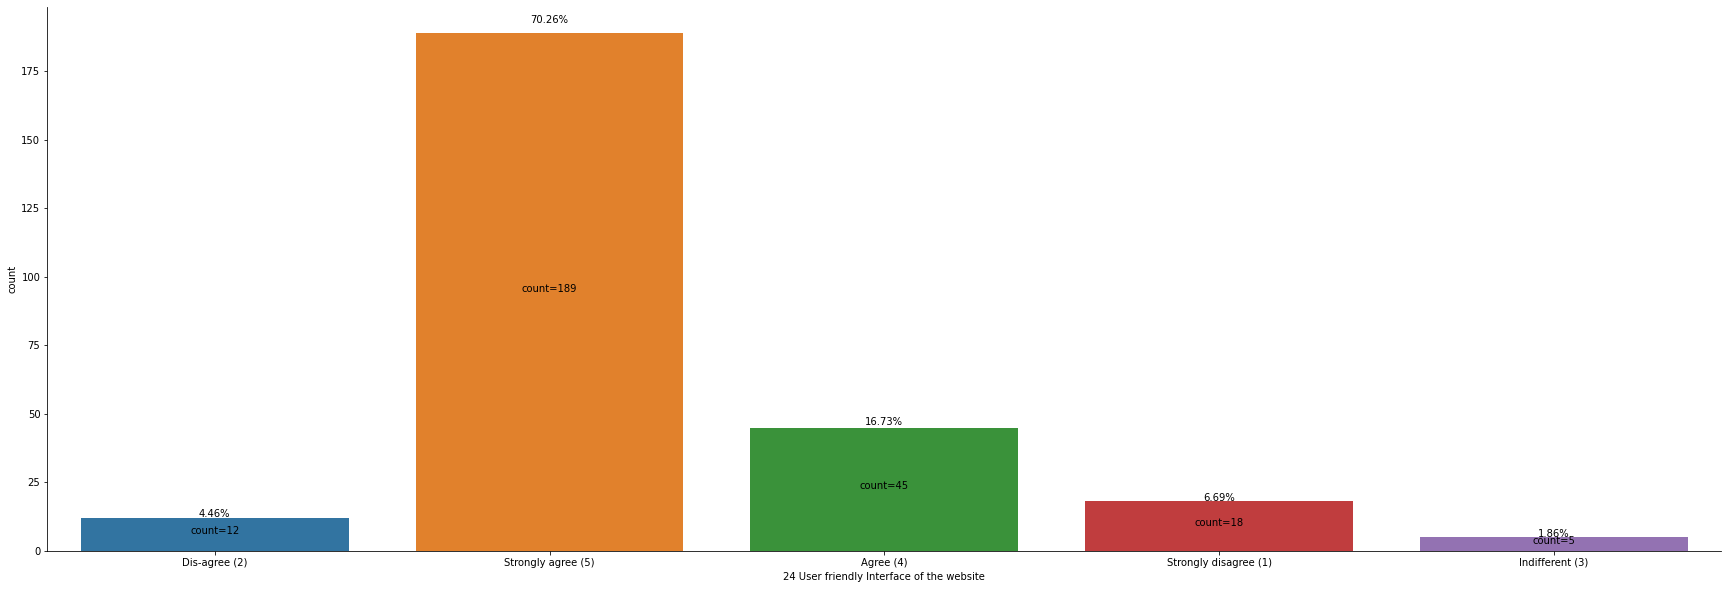

In [ ]:
plot_count(df, '24 User friendly Interface of the website', (30,10))

Observations:
1. At least 70% of the customers strongly agree that the interface of the website should be user friendly.

The unique values in '25 Convenient Payment methods' are [Dis-agree (2), Strongly agree (5), Agree (4)]
The unique value counts are as follows:
Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64


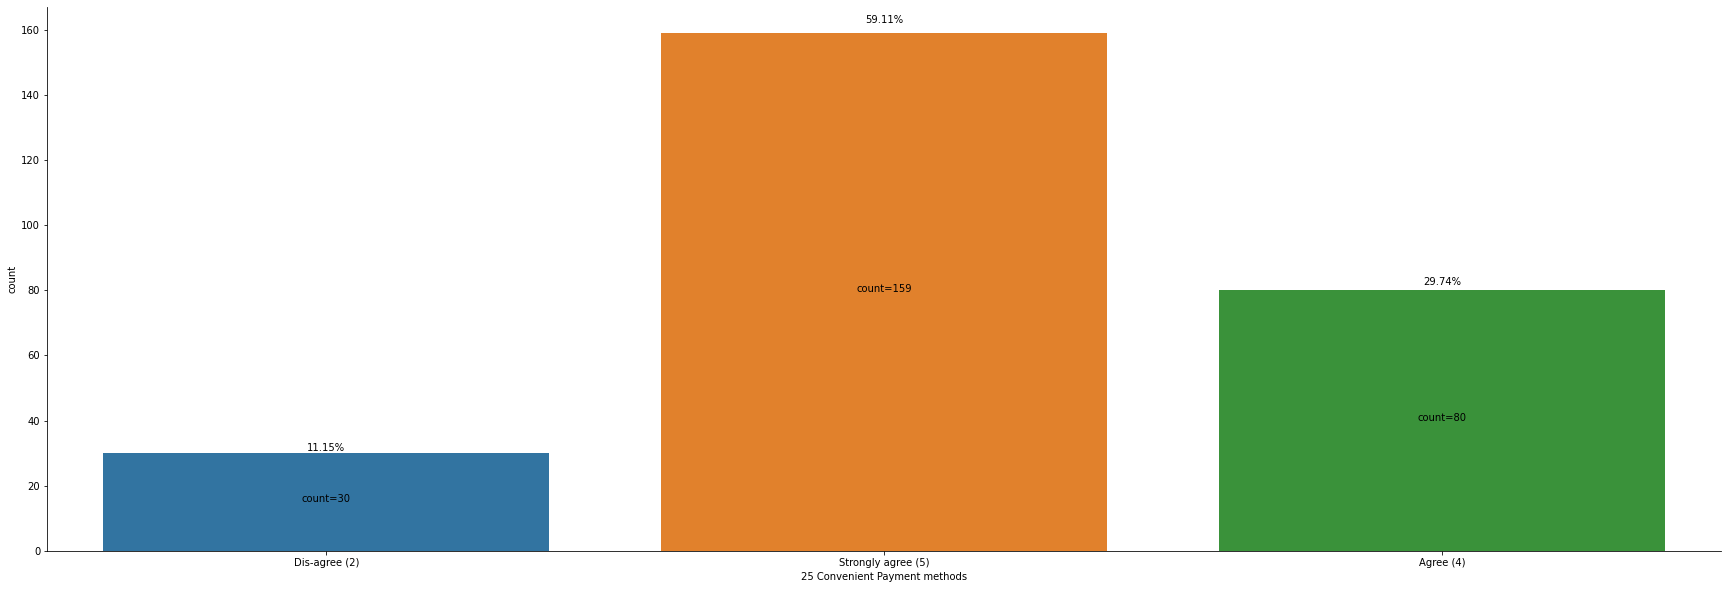

In [ ]:
plot_count(df, '25 Convenient Payment methods', (30,10))

Observations:
1. 59% and 29.7% of the customers Strongly agree and agree respectively that the online store needs to have convenient payment methods.

The unique values in '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time' are [Disagree (2), Strongly agree (5), Agree (4), indifferent  (3)]
The unique value counts are as follows:
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


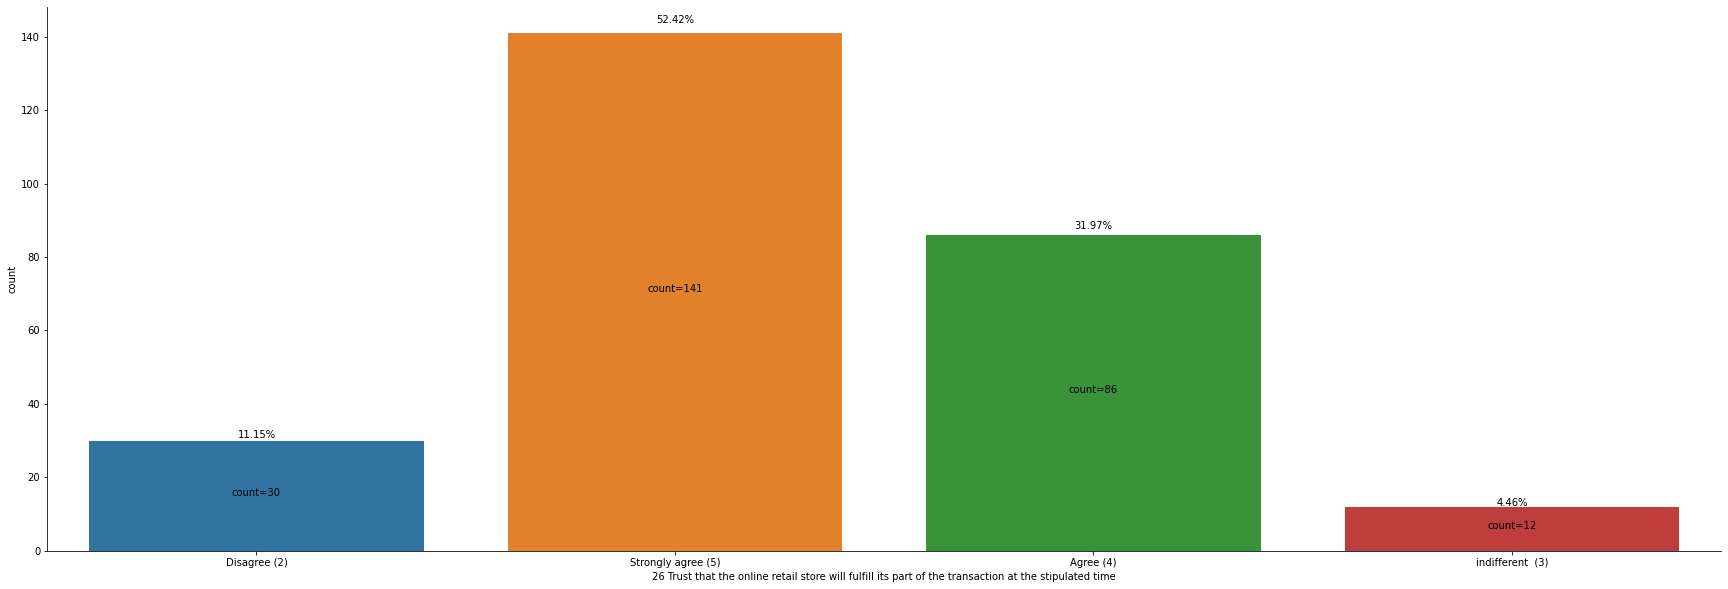

In [ ]:
plot_count(df, '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', (30,10))

Observations:
1. About 84% of the customers strongly agree/agree that the online retail store will fulfill its part of the transaction at the stipulated time.
2. 4.46% of the population have doubts if they can trust that the online retail store will fulfill its part of the transaction at the stipulated time.
3. At least 11.15% of the customers do not trust that the online retail store will fulfill its part of the transaction at the stipulated time.
4. The indifferent and the disagreeing population gives us an idea about why about 28.25% of the people opt Cash on delivery payment option.

The unique values in '27 Empathy (readiness to assist with queries) towards the customers' are [Strongly agree (5), Agree (4), Strongly disagree (1), indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


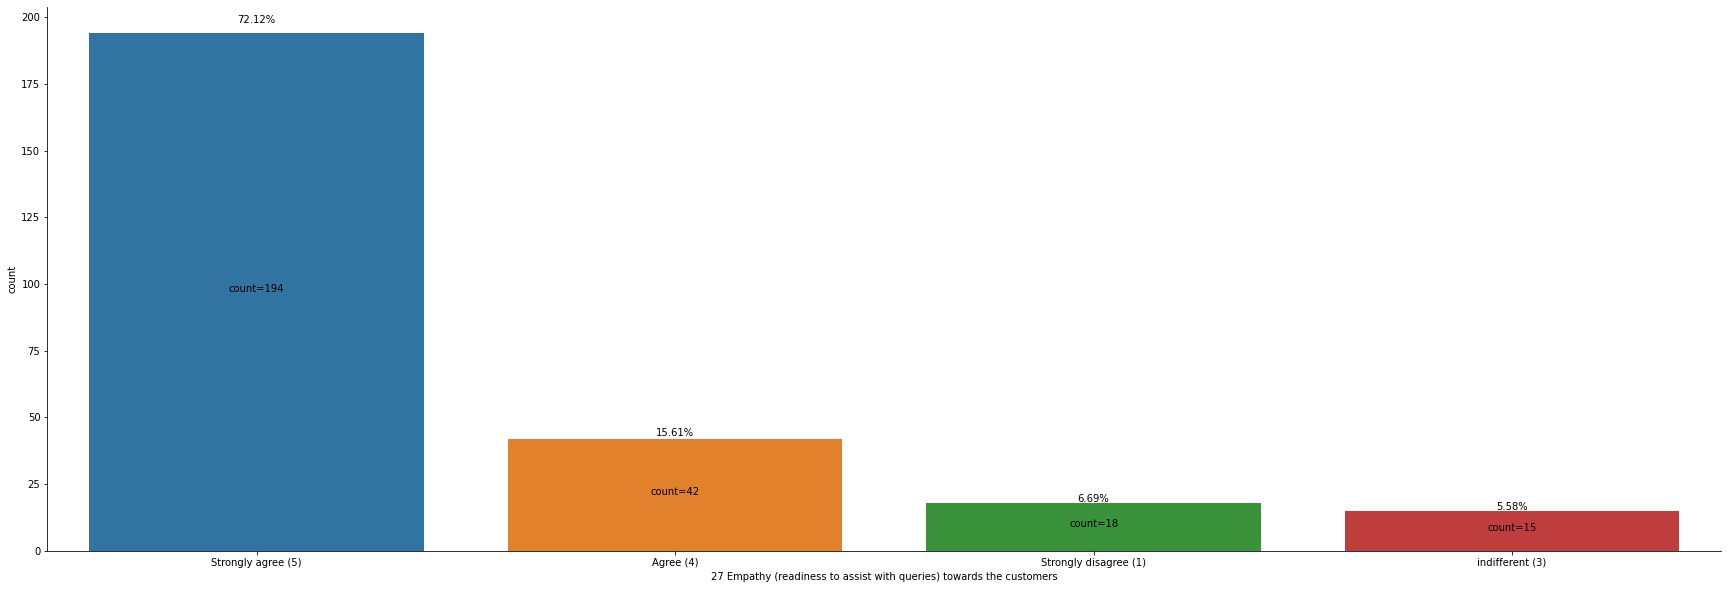

In [ ]:
plot_count(df, '27 Empathy (readiness to assist with queries) towards the customers', (30,10))

Observations:
1. It is good to see that 87% of the customers feel that the online shopping companies empathise towards their customers.

The unique values in '28 Being able to guarantee the privacy of the customer' are [Agree (4), Strongly agree (5), indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


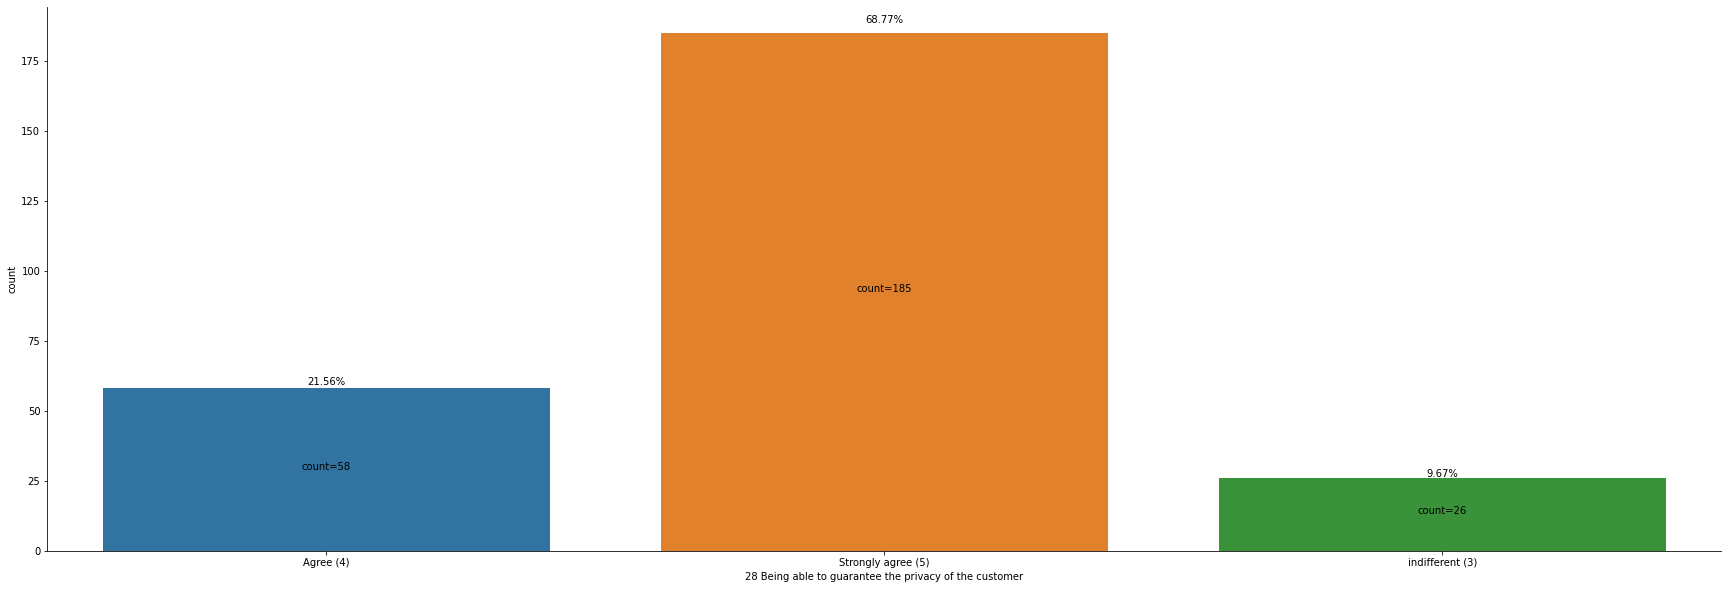

In [ ]:
plot_count(df, '28 Being able to guarantee the privacy of the customer', (30,10))

Observations:
1. privacy is a very important aspect. It is good that none of the customers feel they have issues with privacy with the stores.

The unique values in '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)' are [Agree (4), Strongly agree (5), indifferent (3), Strongly disagree (1)]
The unique value counts are as follows:
Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


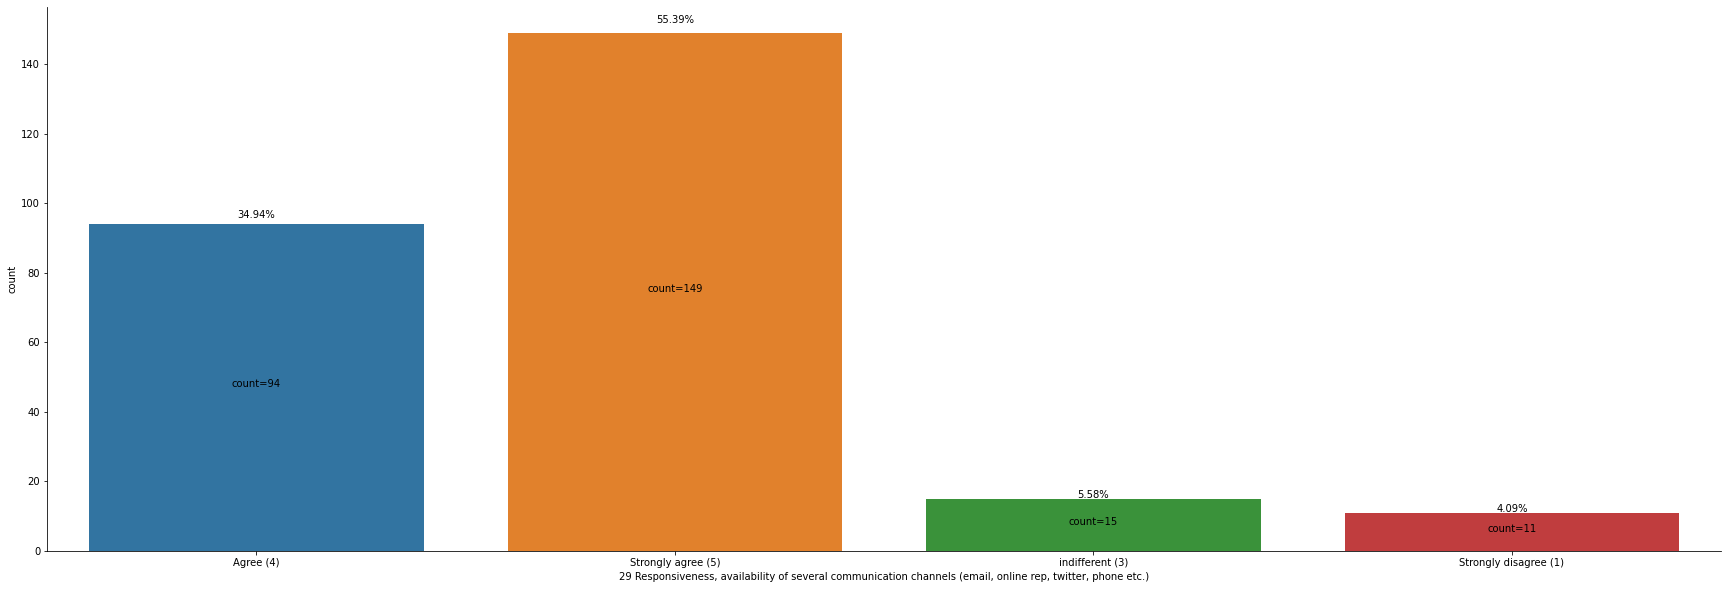

In [ ]:
plot_count(df, '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', (30,10))

The unique values in '30 Online shopping gives monetary benefit and discounts' are [indifferent (3), Strongly agree (5), Agree (4), Strongly disagree (1), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64


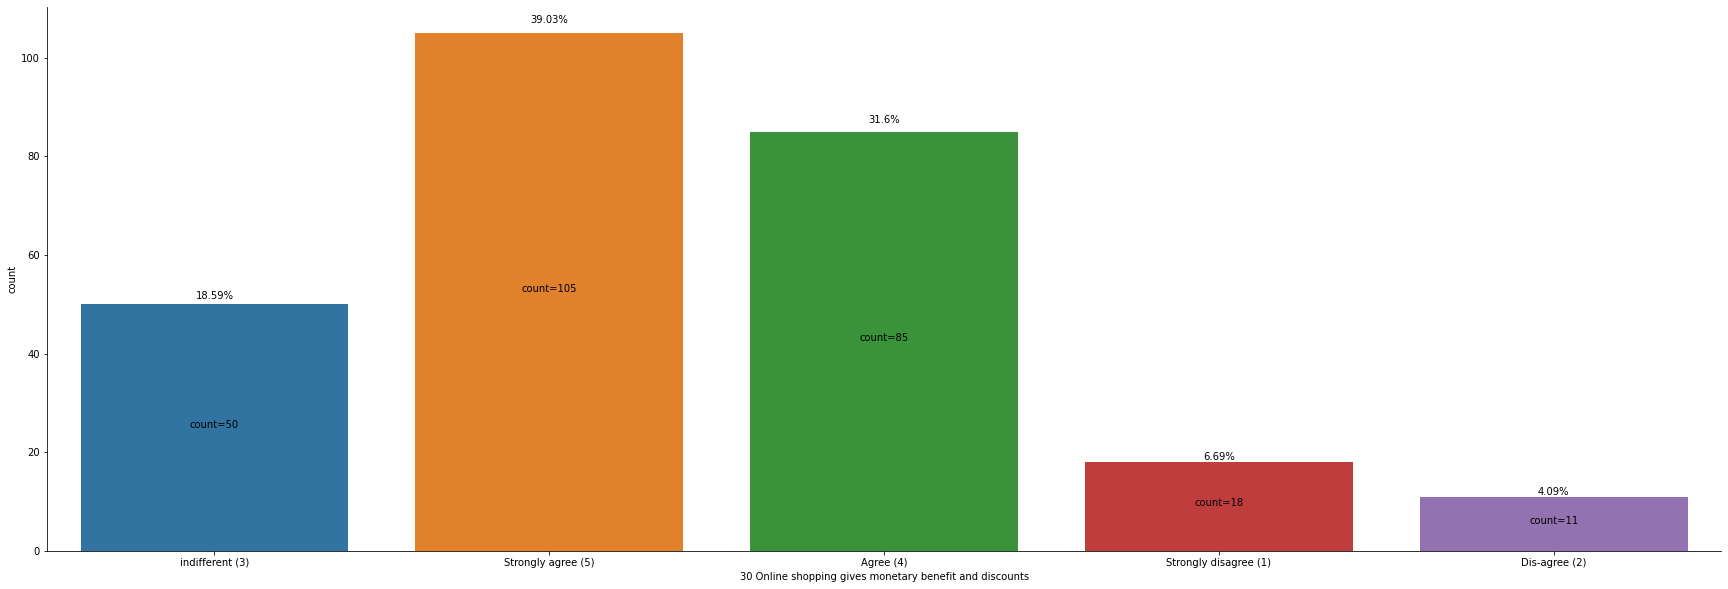

In [ ]:
plot_count(df, '30 Online shopping gives monetary benefit and discounts', (30,10))

The unique values in '32 Shopping online is convenient and flexible' are [Dis-agree (2), Strongly agree (5), indifferent (3), Agree (4)]
The unique value counts are as follows:
Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64


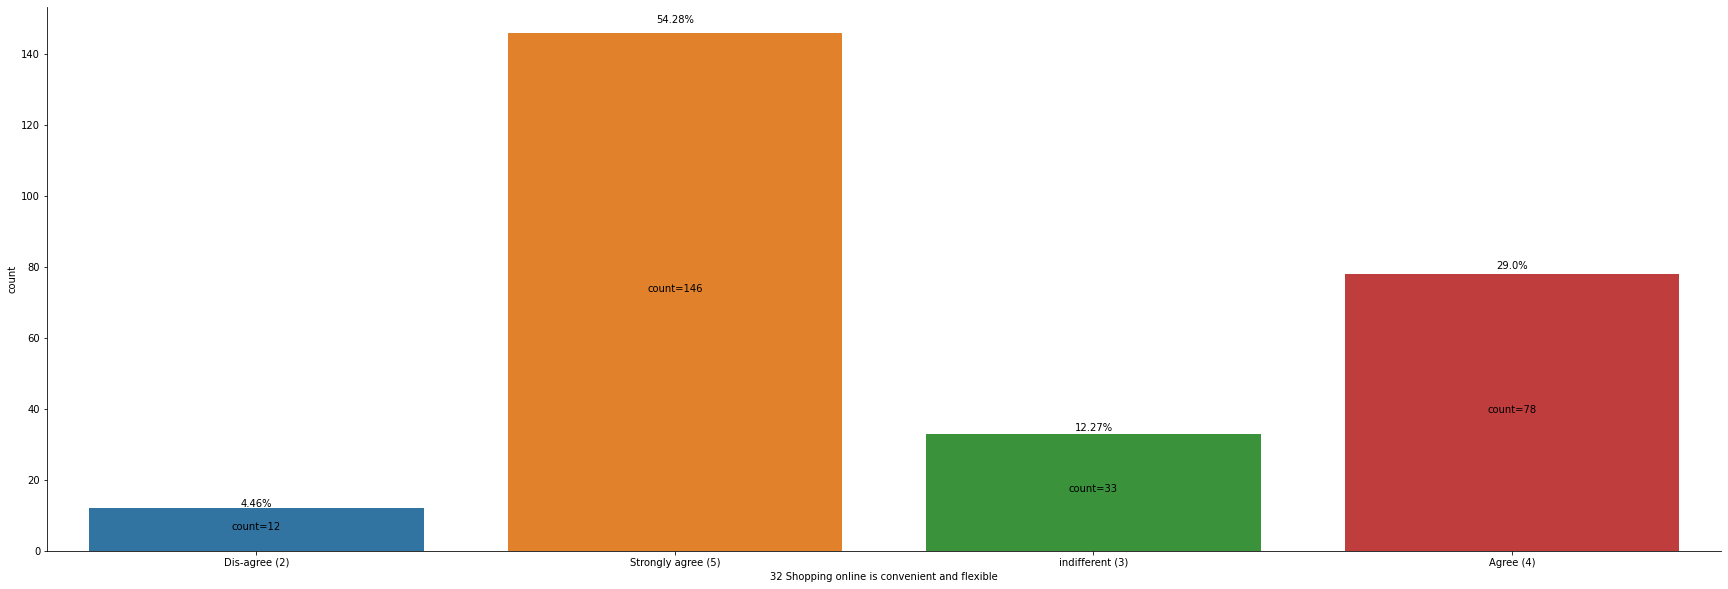

In [ ]:
plot_count(df, '32 Shopping online is convenient and flexible', (30,10))

Observations:
1. A large portion of the population feels that there is monetary benefit and discounts in shopping online and that it is convenient and flexible.

The unique values in '31 Enjoyment is derived from shopping online' are [Strongly disagree (1), Strongly agree (5), indifferent (3), Agree (4), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64


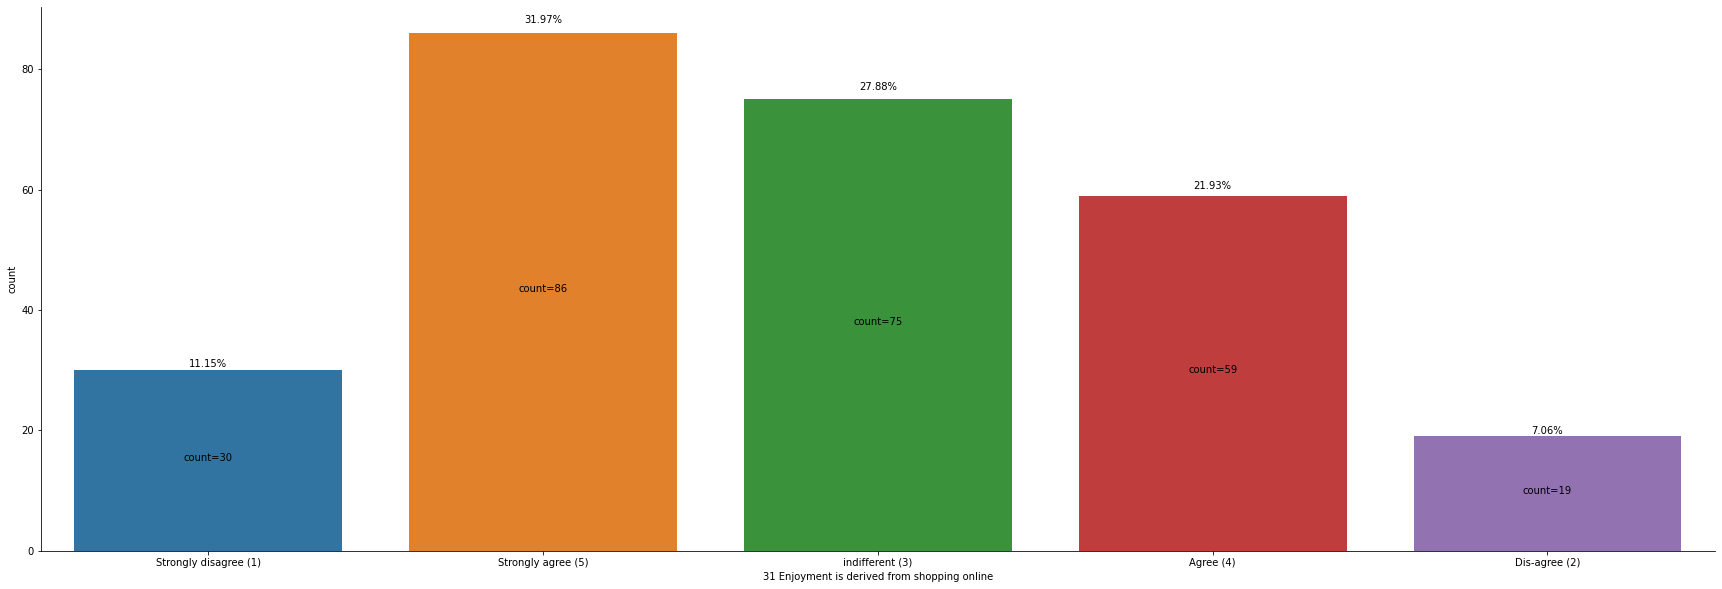

In [ ]:
plot_count(df, '31 Enjoyment is derived from shopping online', (30,10))

The unique values in '33 Return and replacement policy of the e-tailer is important for purchase decision' are [Dis-agree (2), Strongly agree (5), Agree (4)]
The unique value counts are as follows:
Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


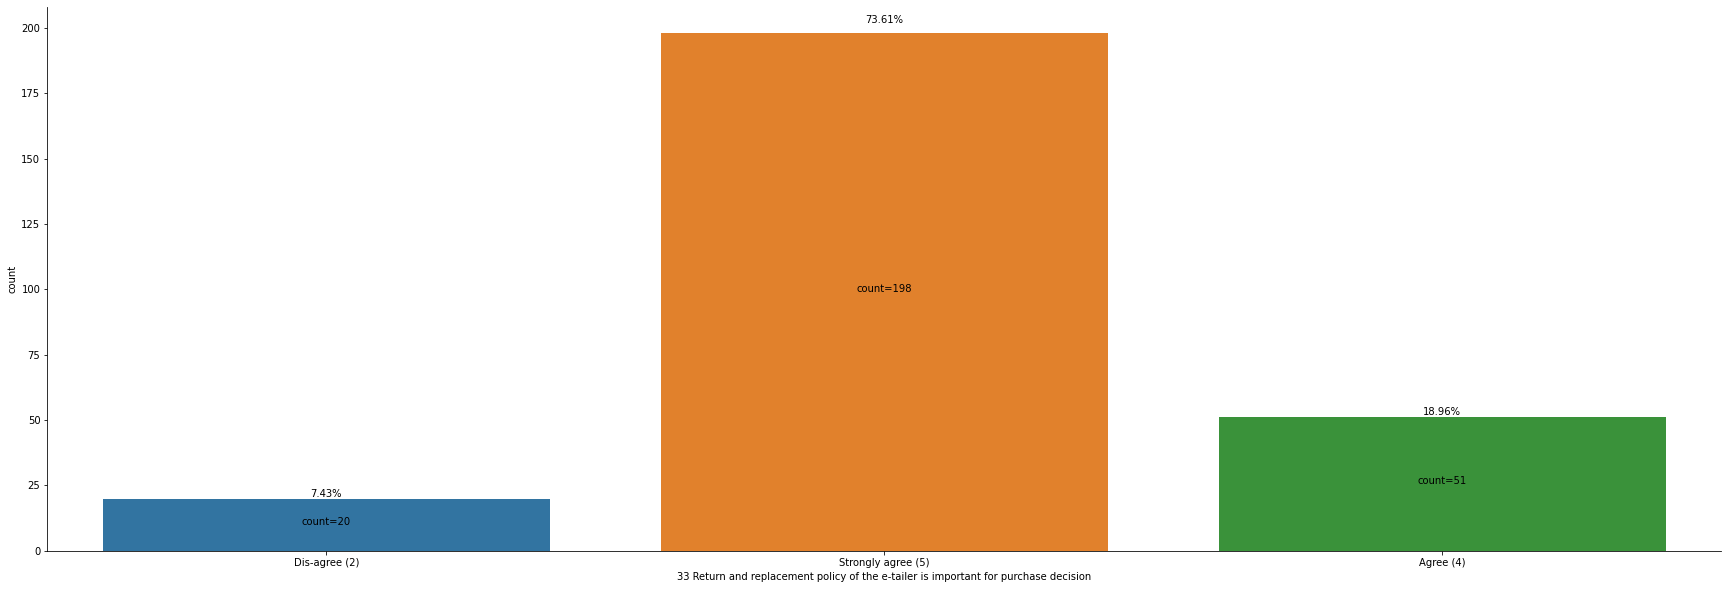

In [ ]:
plot_count(df, '33 Return and replacement policy of the e-tailer is important for purchase decision', (30,10))

Observations:
1. Over 90% of the customers feel that Return and Replacement policy of the e-retailer is important for purchase decision.

The unique values in '34 Gaining access to loyalty programs is a benefit of shopping online' are [Agree (4), Strongly agree (5), indifferent (3), Dis-agree (2), Strongly disagree (1)]
The unique value counts are as follows:
Strongly agree (5)       115
indifferent (3)           64
Agree (4)                 64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64


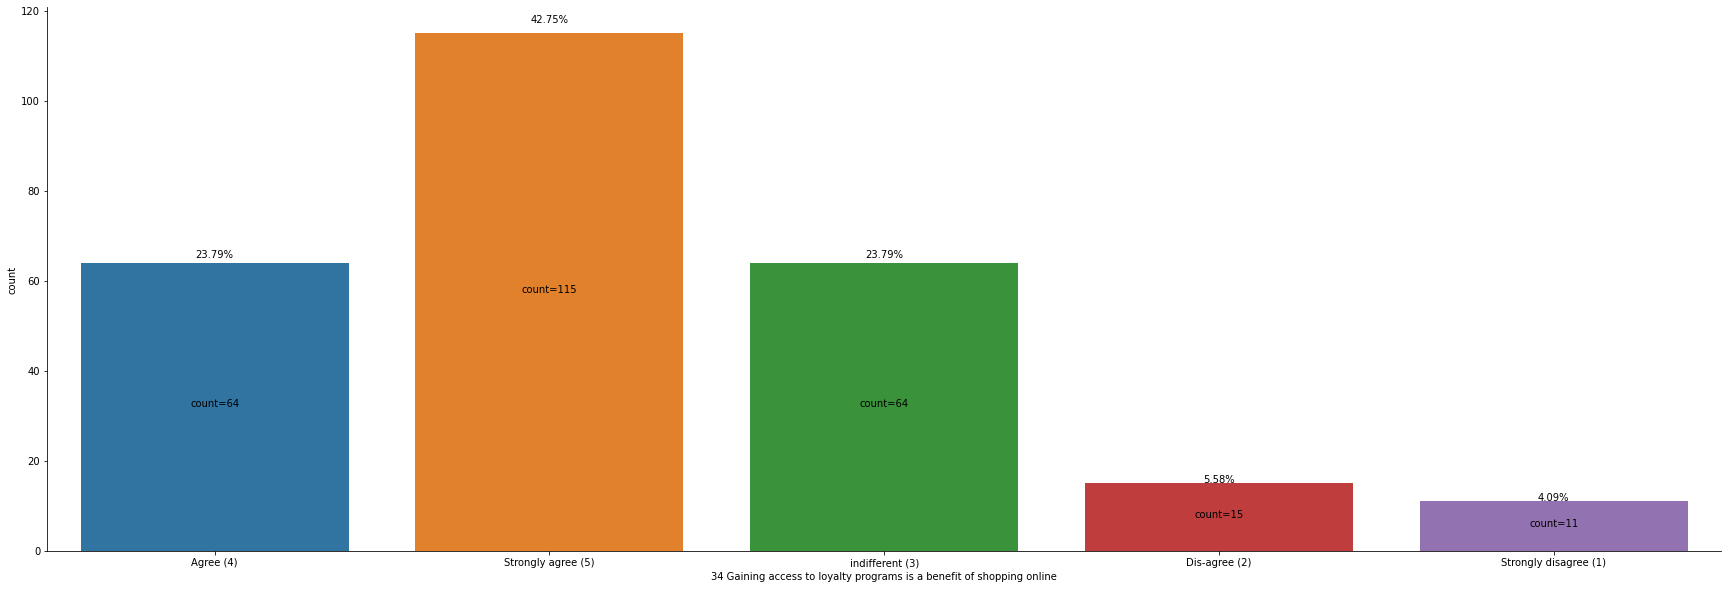

In [ ]:
plot_count(df, '34 Gaining access to loyalty programs is a benefit of shopping online', (30,10))

Observations:
1. More than half of the population feels that loyalty prgrams are a benefit of online shopping experience.

The unique values in '35 Displaying quality Information on the website improves satisfaction of customers' are [indifferent (3), Strongly agree (5), Agree (4)]
The unique value counts are as follows:
Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64


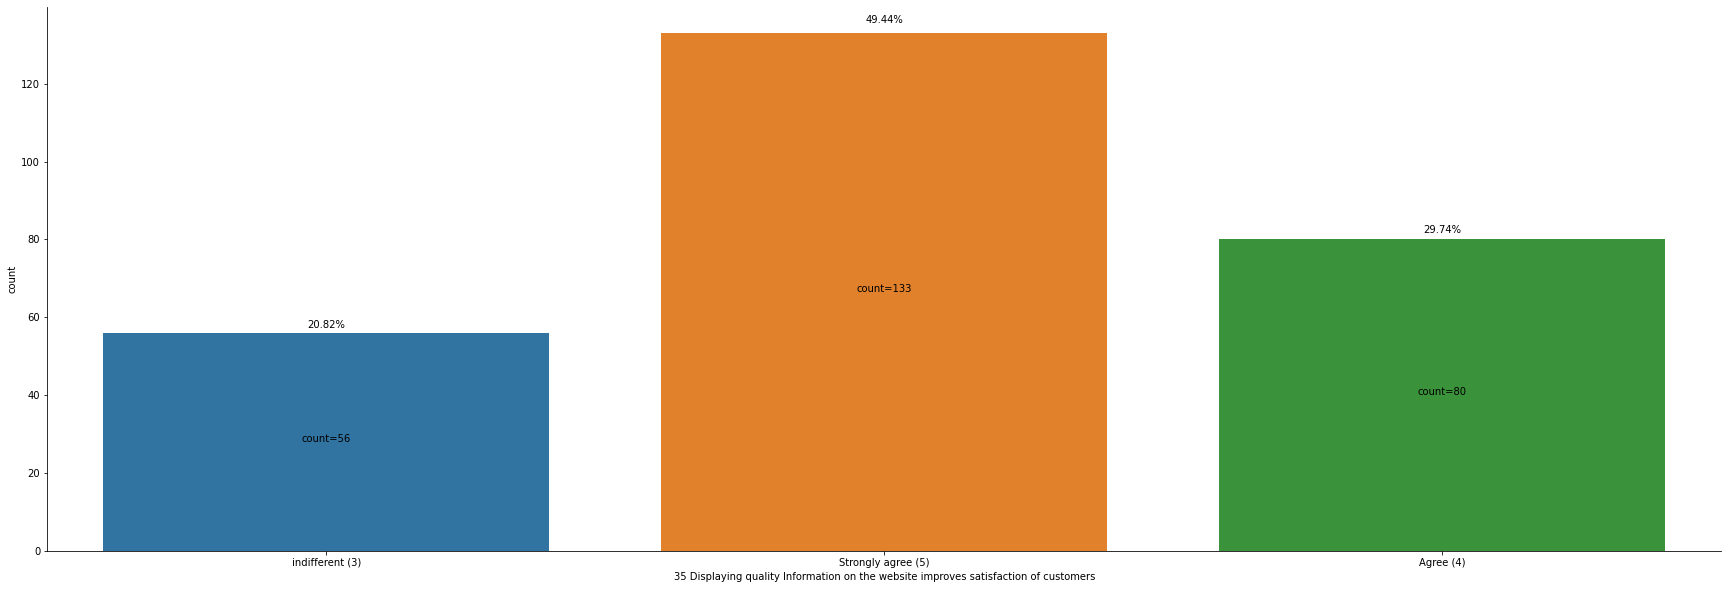

In [ ]:
plot_count(df, '35 Displaying quality Information on the website improves satisfaction of customers', (30,10))

Observations:
1. There is no disagreement that displaying quality Information on the website improves satisfaction of customers.

The unique values in '36 User derive satisfaction while shopping on a good quality website or application' are [Strongly agree (5), Agree (4), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64


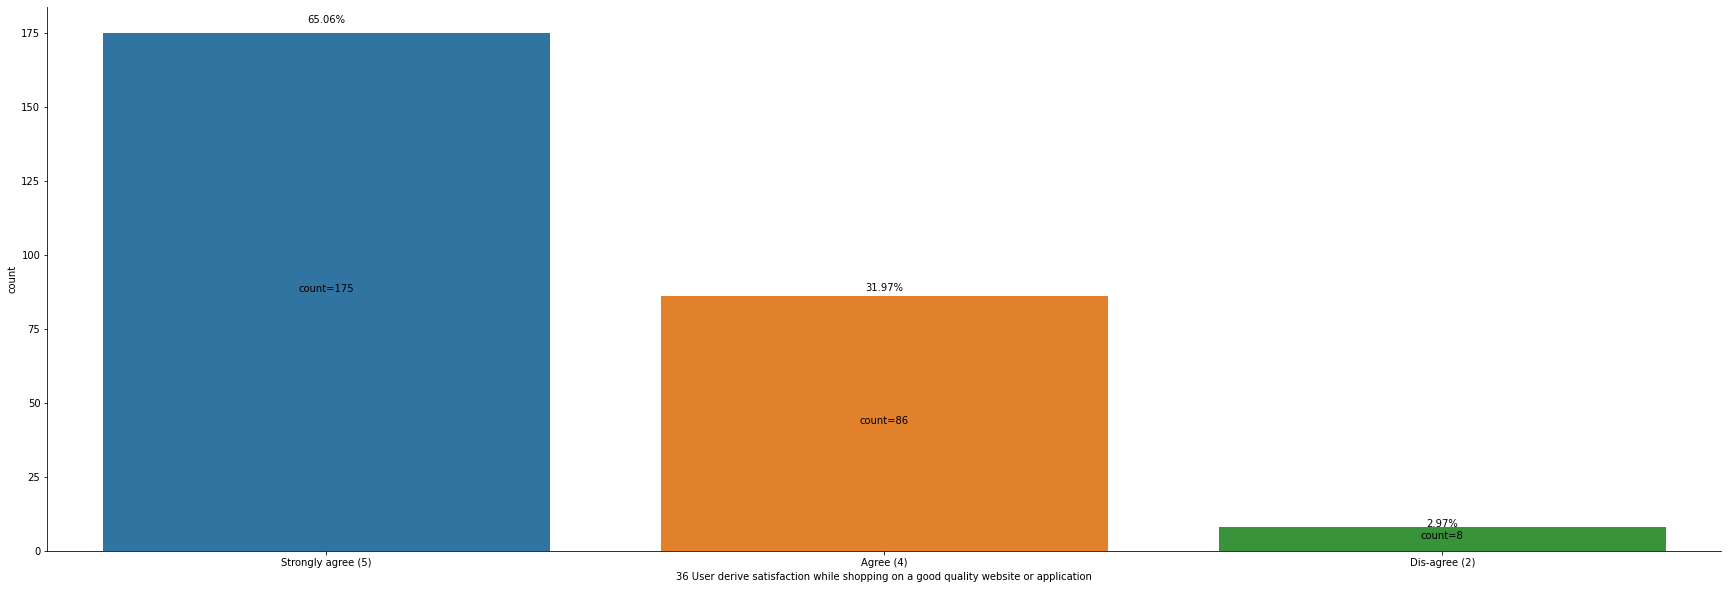

In [ ]:
plot_count(df, '36 User derive satisfaction while shopping on a good quality website or application', (30,10))

Observations:
1. At least 96% of the customers Strongly agree/agree that customers derive satisfaction while shopping on a good quality website or application.

The unique values in '37 Net Benefit derived from shopping online can lead to users satisfaction' are [Agree (4), Strongly agree (5), indifferent (3), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


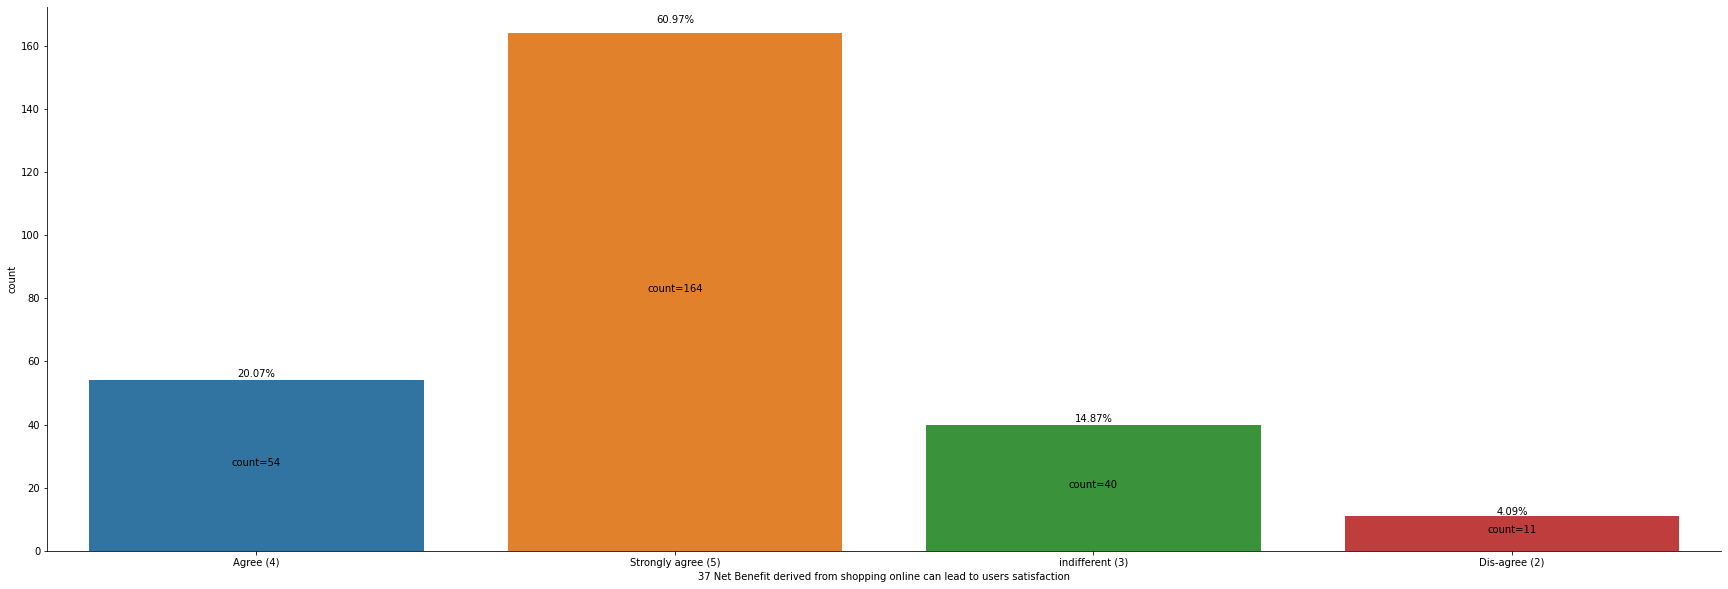

In [ ]:
plot_count(df, '37 Net Benefit derived from shopping online can lead to users satisfaction', (30,10))

The unique values in '38 User satisfaction cannot exist without trust' are [Strongly agree (5), Agree (4), Strongly disagree (1), Dis-agree (2), indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


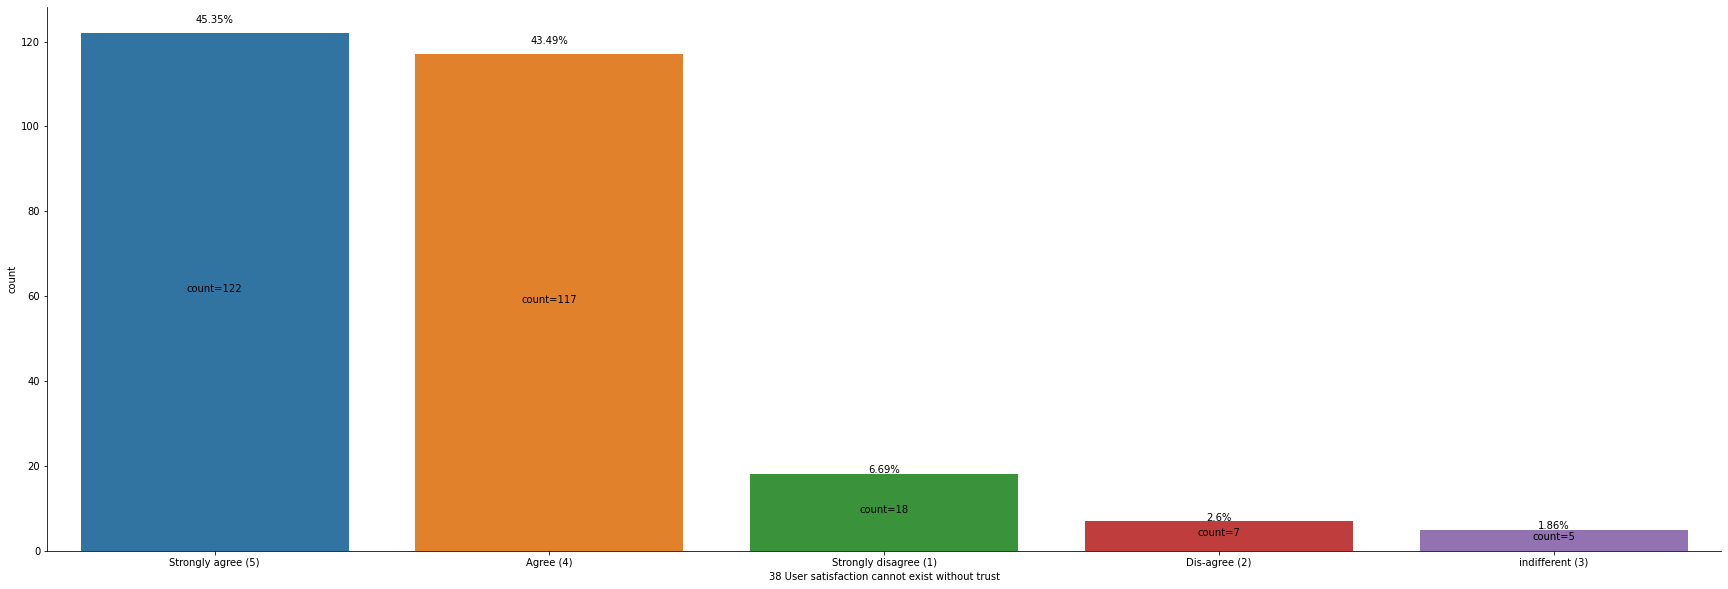

In [ ]:
plot_count(df, '38 User satisfaction cannot exist without trust', (30,10))

Observations:
1. The dataset shows that customers give a lot of interest in trust. At least 88% of the customers strongly agree/agree that user satisfaction cannot exist without trust.

The unique values in '39 Offering a wide variety of listed product in several category' are [indifferent (3), Strongly agree (5), Agree (4), Dis-agree (2)]
The unique value counts are as follows:
Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64


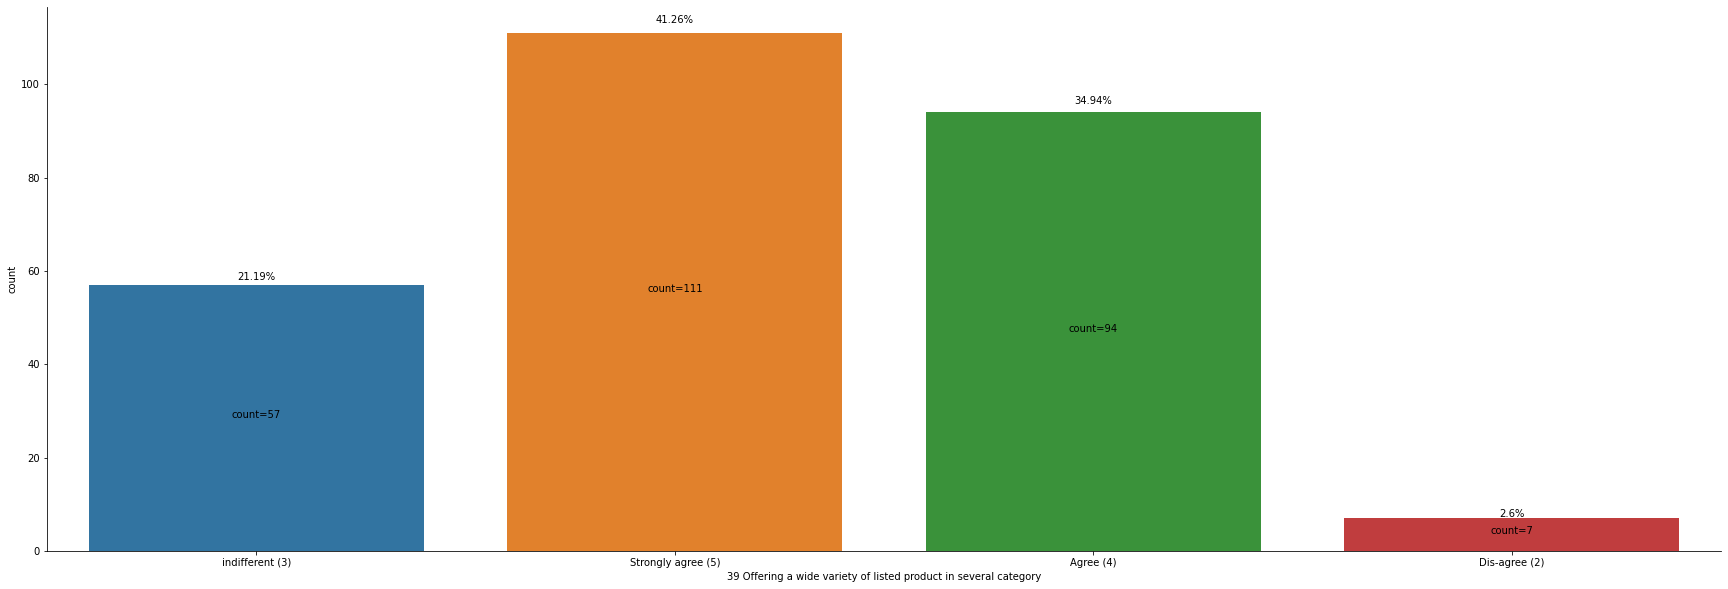

In [ ]:
plot_count(df, '39 Offering a wide variety of listed product in several category', (30,10))

Observations:
1. About 75% of the population strongly agree/agree that offering a wide variety of listed product in several category is needed.

The unique values in '40 Provision of complete and relevant product information' are [indifferent (3), Strongly agree (5), Agree (4), Disagree (2)]
The unique value counts are as follows:
Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64


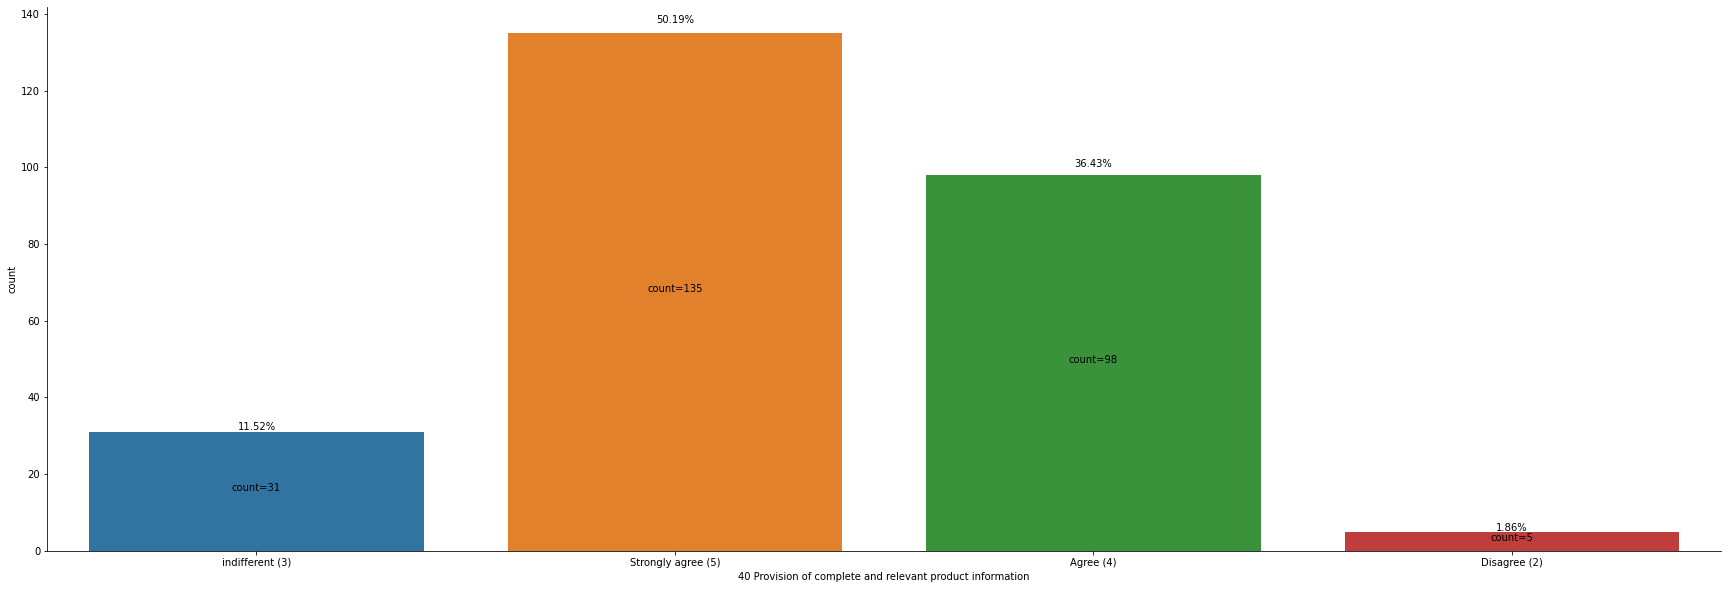

In [ ]:
plot_count(df, '40 Provision of complete and relevant product information', (30,10))

Observations:
1. 86% of the customers strongly agree/agree that Provision of complete and relevant product information is neccessary on the website.

The unique values in '41 Monetary savings' are [Disagree (2), Strongly agree (5), Agree (4), indifferent (3)]
The unique value counts are as follows:
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64


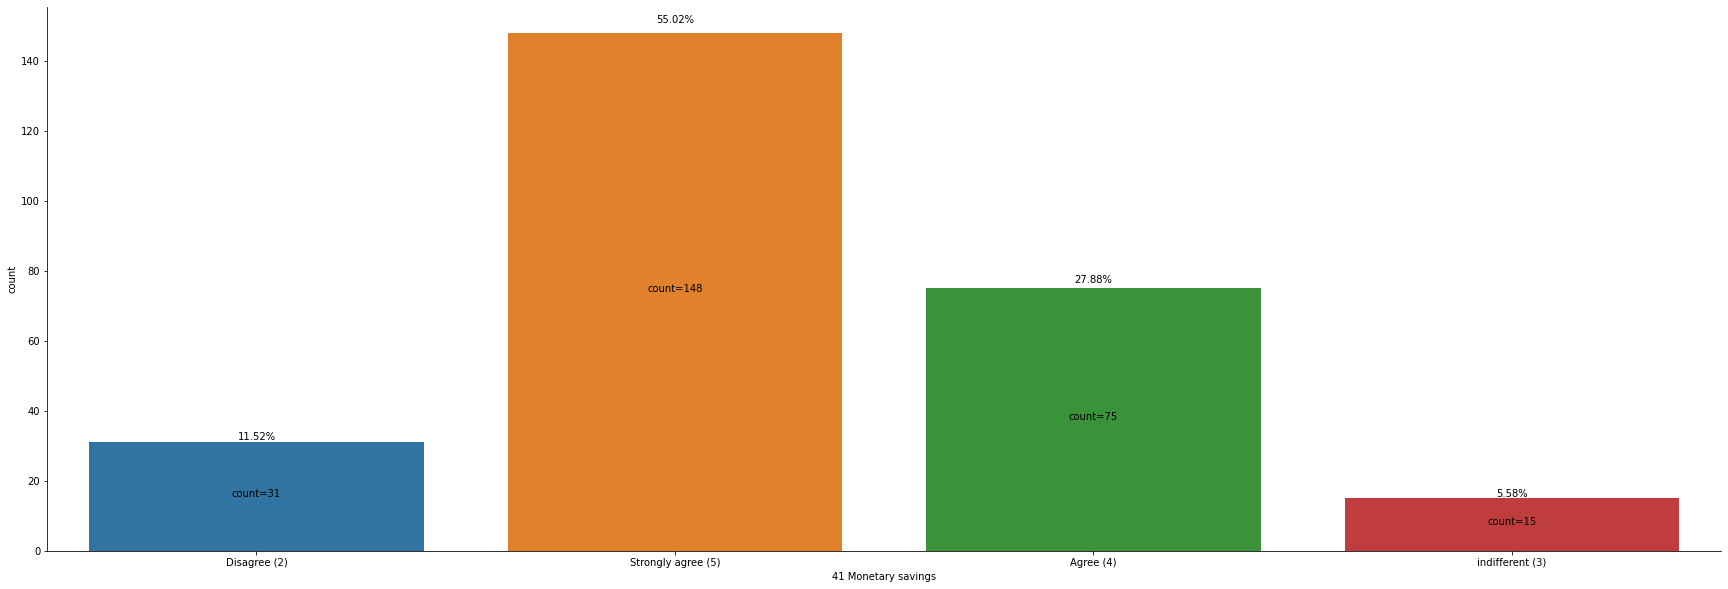

In [ ]:
plot_count(df, '41 Monetary savings', (30,10))

Observations:
1. About 82% of the population feel that there is Monetary savings in online shopping.

The unique values in '42 The Convenience of patronizing the online retailer' are [indifferent (3), Agree (4), Strongly agree (5)]
The unique value counts are as follows:
Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64


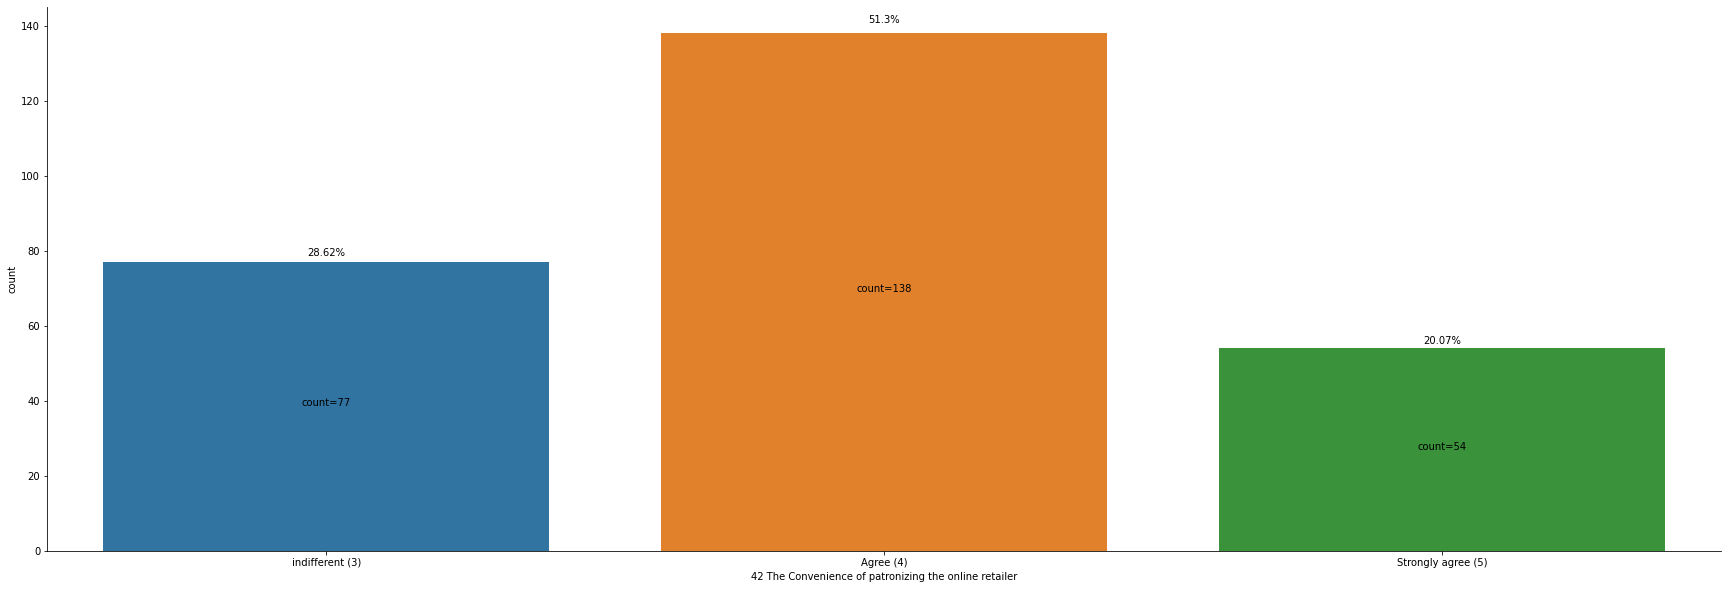

In [ ]:
plot_count(df, '42 The Convenience of patronizing the online retailer', (30,10))

The unique values in '43 Shopping on the website gives you the sense of adventure' are [Agree (4), indifferent (3), Strongly agree (5), Dis-agree (2), Strongly disagree (1)]
The unique value counts are as follows:
Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64


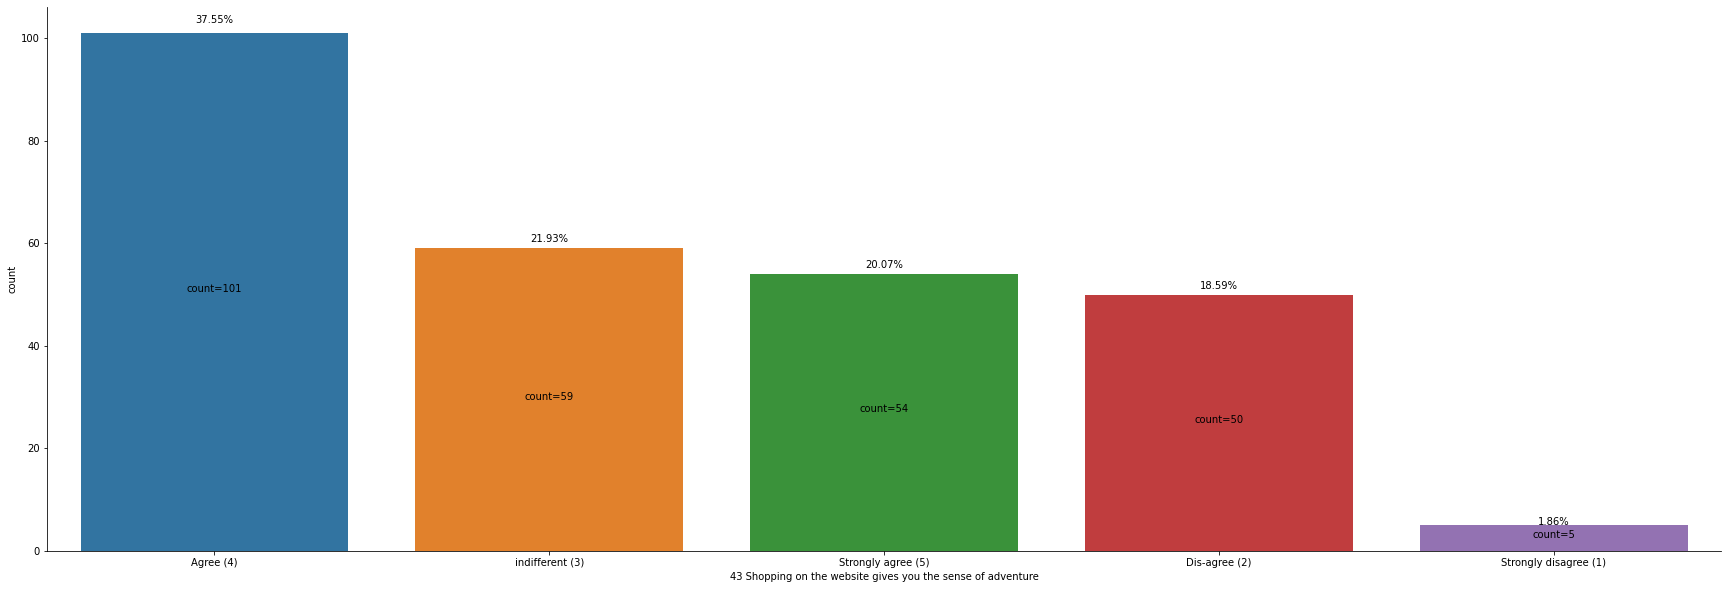

In [ ]:
plot_count(df, '43 Shopping on the website gives you the sense of adventure', (30,10))

Observations:
1. At least 20% of the population disagree that shopping on the website gives you the sense of adventure.

The unique values in '44 Shopping on your preferred e-tailer enhances your social status' are [Agree (4), indifferent (3), Strongly agree (5), Strongly disagree (1), Dis-agree (2)]
The unique value counts are as follows:
indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64


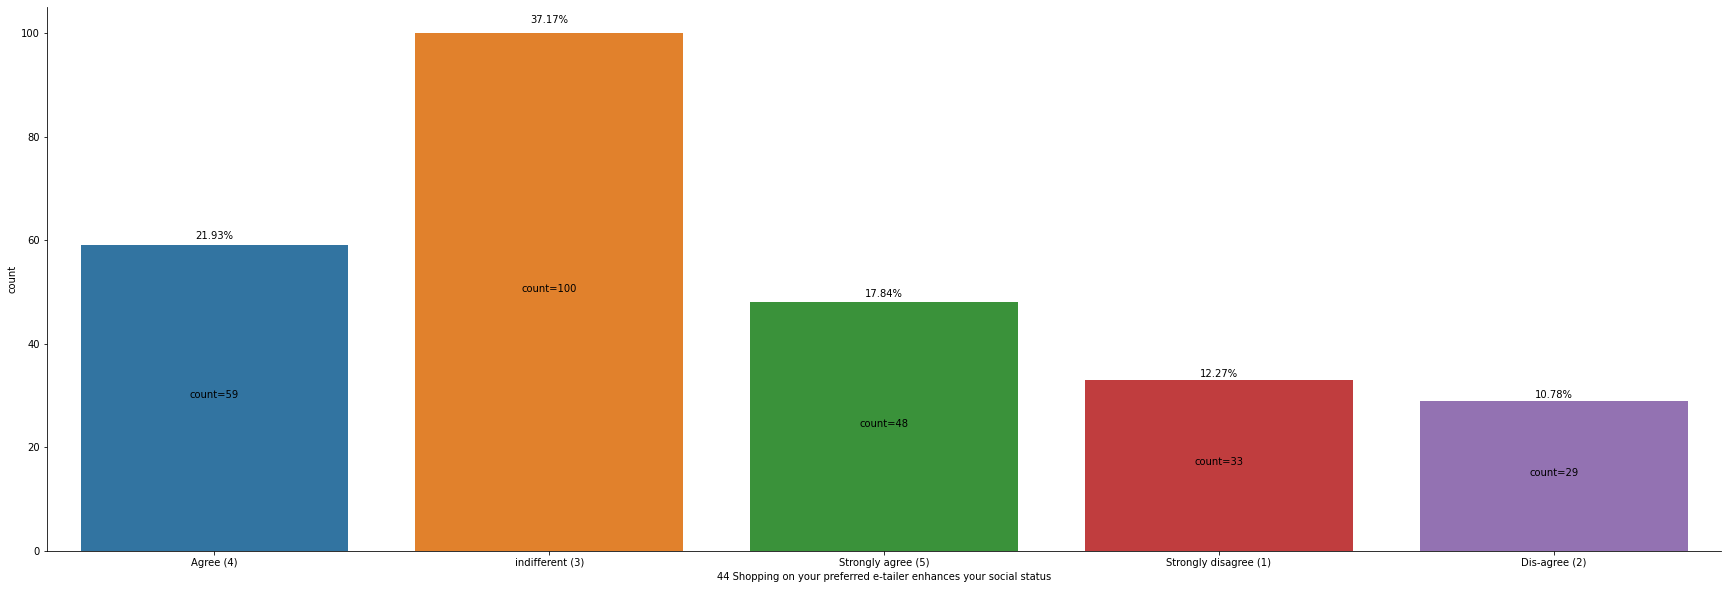

In [ ]:
plot_count(df, '44 Shopping on your preferred e-tailer enhances your social status', (30,10))

The unique values in '45 You feel gratification shopping on your favorite e-tailer' are [Strongly agree (5), indifferent (3), Agree (4), Strongly disagree (1), Disagree (2)]
The unique value counts are as follows:
indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64


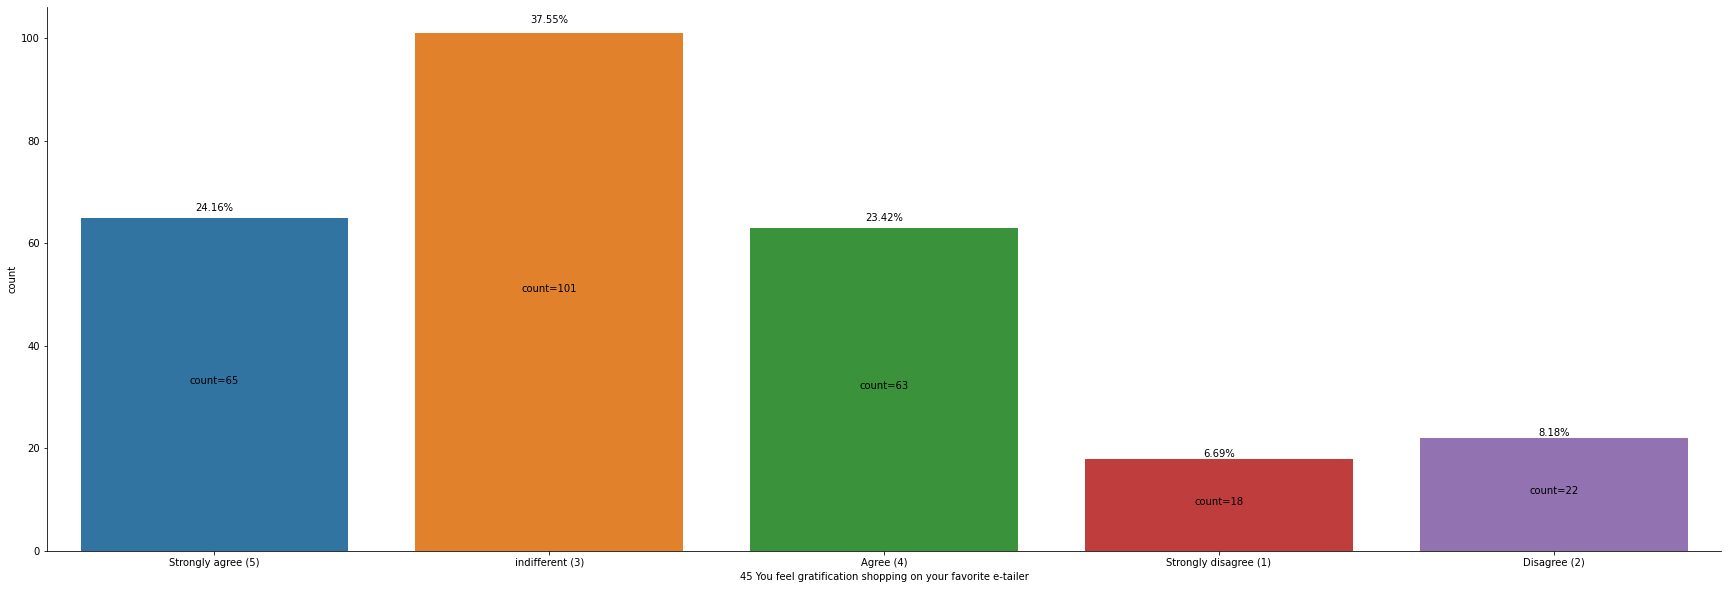

In [ ]:
plot_count(df, '45 You feel gratification shopping on your favorite e-tailer', (30,10))

Observations:
1. Only less than 47% of the customers strongly agree/agree that there is some gratification in shopping on their favorite e-retailer.

The unique values in '46 Shopping on the website helps you fulfill certain roles' are [Agree (4), Strongly agree (5), indifferent (3), Strongly disagree (1), Dis-agree (2)]
The unique value counts are as follows:
Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64


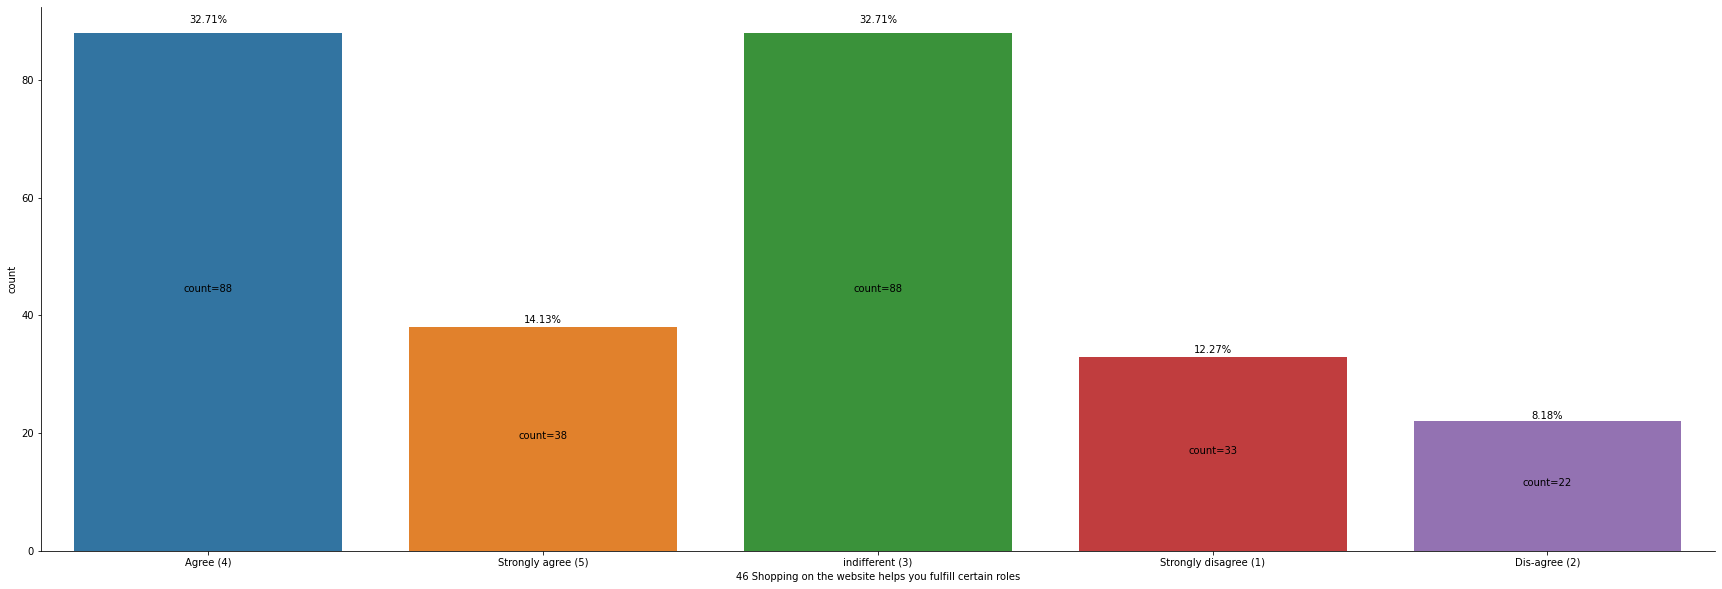

In [ ]:
plot_count(df, '46 Shopping on the website helps you fulfill certain roles', (30,10))

The unique values in '47 Getting value for money spent' are [Strongly agree (5), Agree (4), indifferent (3)]
The unique value counts are as follows:
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64


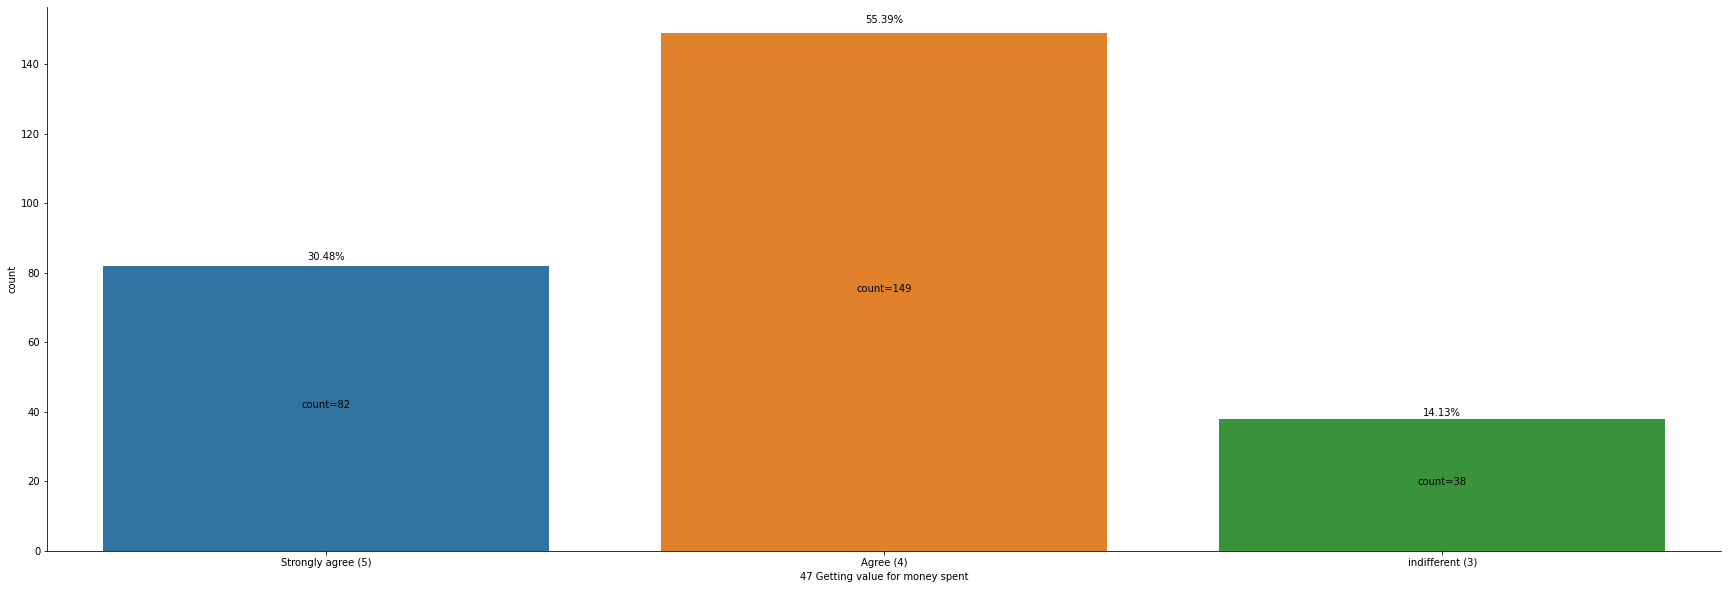

In [ ]:
plot_count(df, '47 Getting value for money spent', (30,10))

Observations:
1. About 85% of the customers strongly agree/agree that online shopping aids in getting value for money spent.

The unique values in 'From the following, tick any (or all) of the online retailers you have shopped from;' are [Amazon.in, Paytm.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Snapdeal.com, Amazon.in, Amazon.in, Flipkart.com, Paytm.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                            

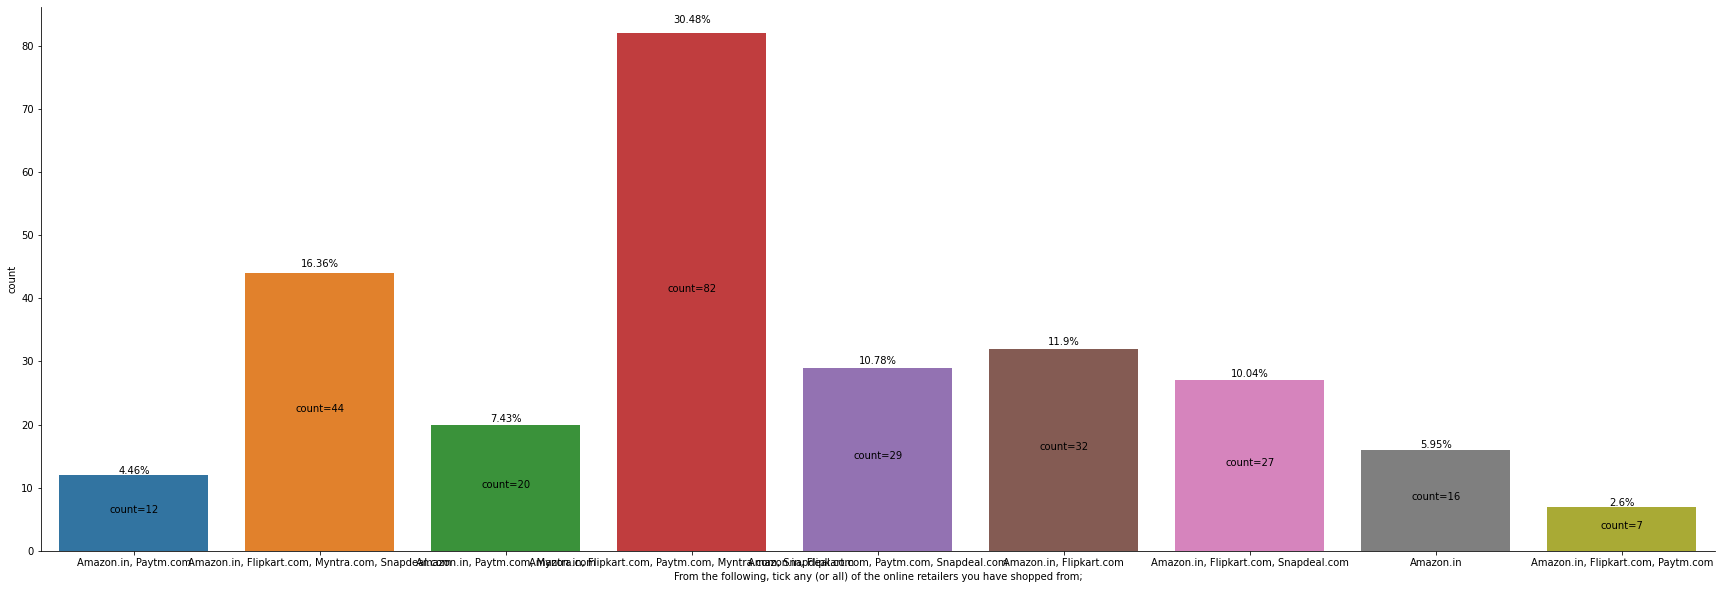

In [ ]:
plot_count(df, 'From the following, tick any (or all) of the online retailers you have shopped from;', (30,10))

Observations:
1. All of the combinations values have Amazon.in in them. This clearly shows that all the customers in this population have shopped from Amazon.in site.
2. Flipkart.com site holds the 2nd place.
3. About 30.48% of the customers have shopped from all 5 websites in the option(Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com).
4. Amazon is the only site which has customers that have not shopped from other sites. There are about 5.95% of such customers.

The unique values in 'Easy to use website or application' are [Paytm.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Myntra.com, Amazon.in, Amazon.in, Paytm.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                

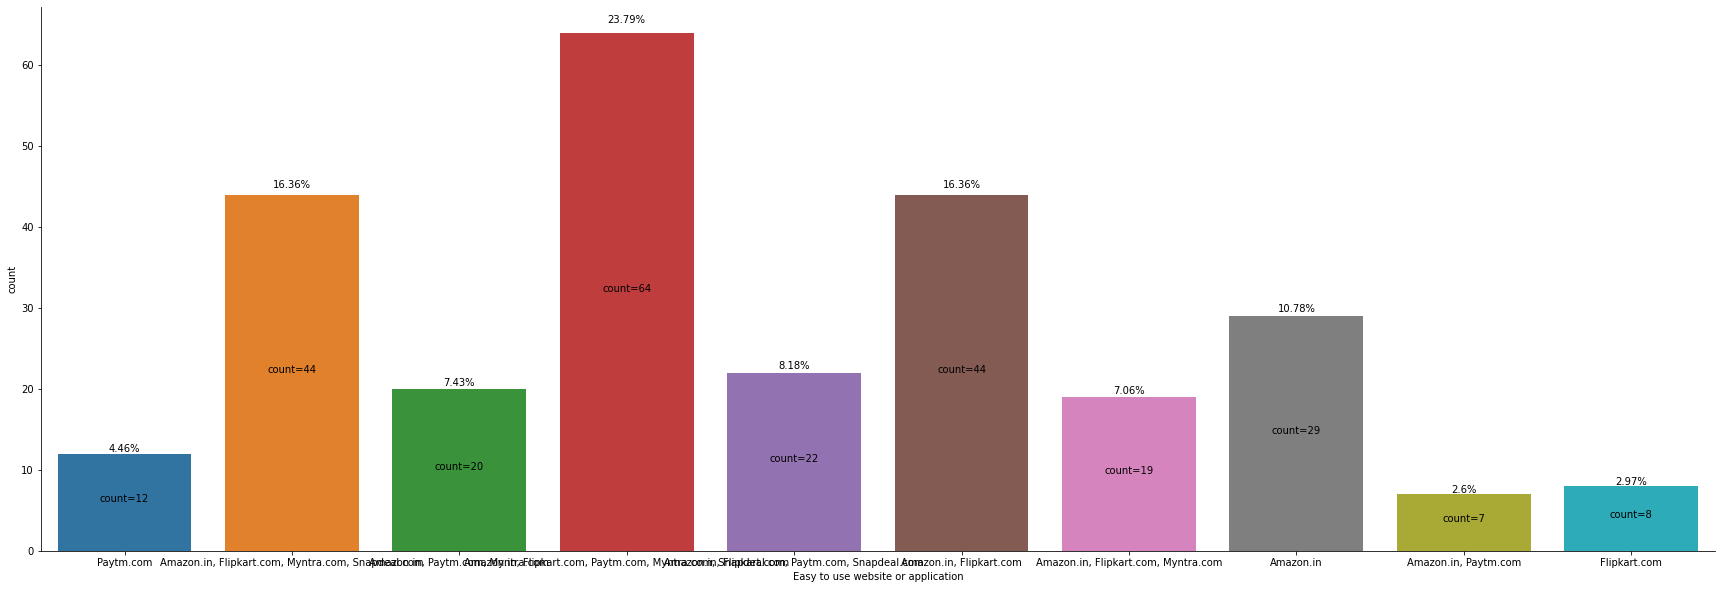

In [ ]:
plot_count(df, 'Easy to use website or application', (30,10))

The unique values in 'Visual appealing web-page layout' are [Flipkart.com, Amazon.in, Myntra.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Myntra.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com, Flipkart.com, Myntra.com, Amazon.in]
The unique value counts are as follows:
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                           

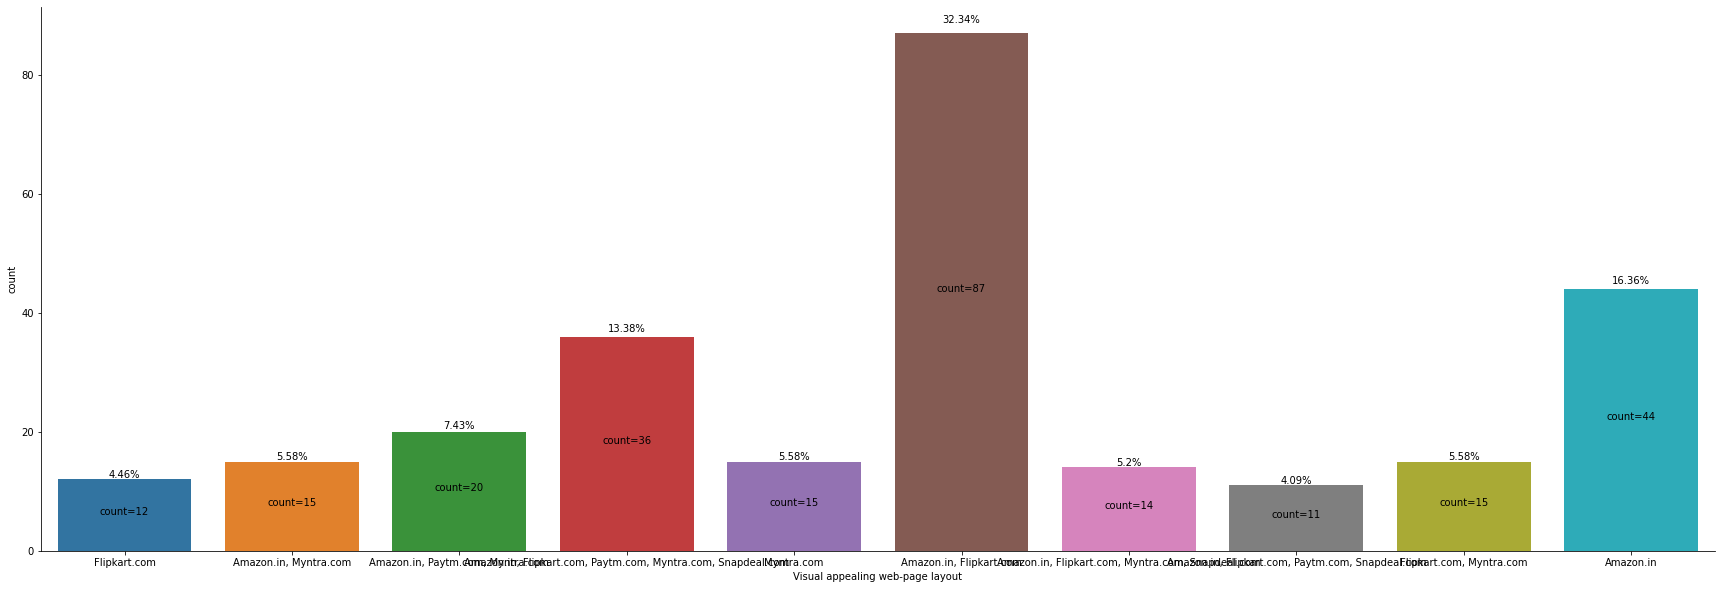

In [ ]:
plot_count(df, 'Visual appealing web-page layout', (30,10))

The unique values in 'Wild variety of product on offer' are [Flipkart.com, Flipkart.com, Myntra.com, Amazon.in, Myntra.com, Amazon.in, Flipkart.com, Myntra.com, Amazon.in, Flipkart.com, Paytm.com, Amazon.in, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Paytm.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


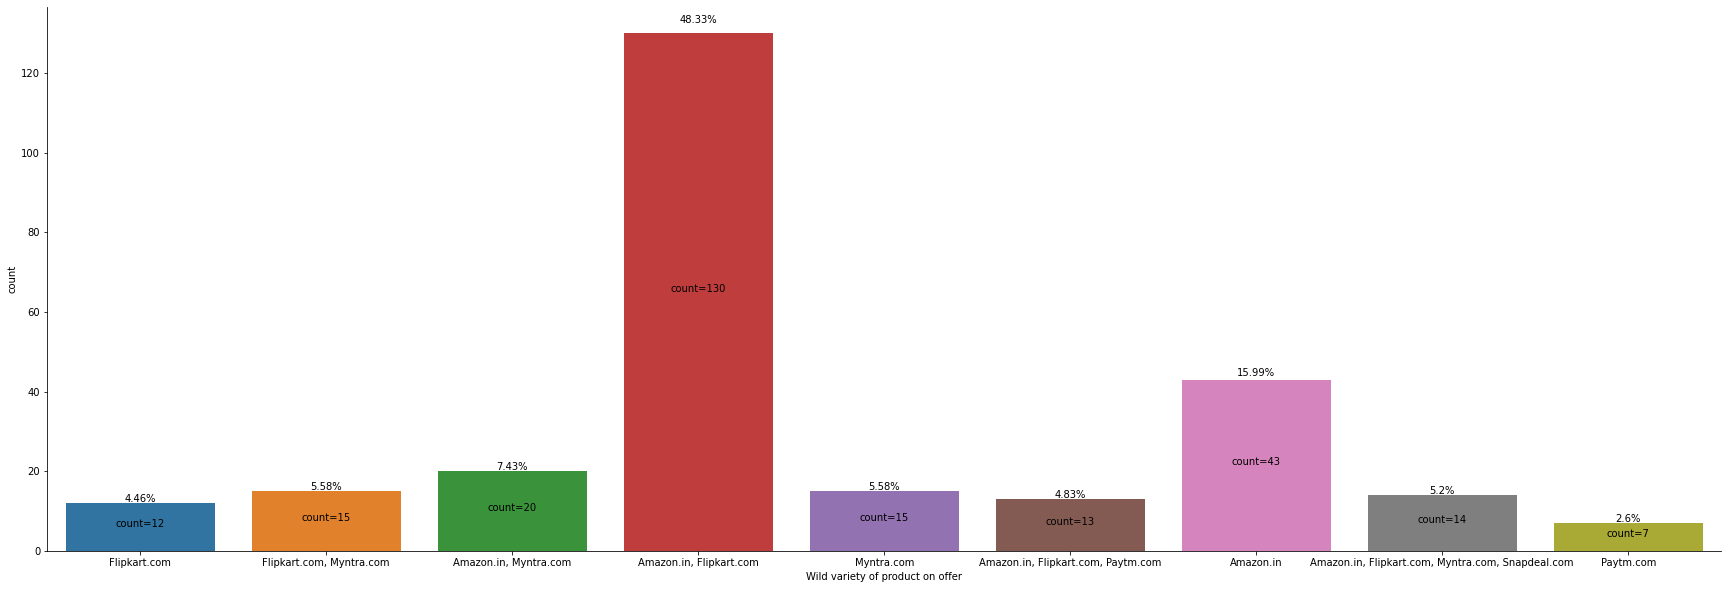

In [ ]:
plot_count(df, 'Wild variety of product on offer', (30,10))

The unique values in 'Complete, relevant description information of products' are [Snapdeal.com, Amazon.in, Flipkart.com, Myntra.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Paytm.com, Flipkart.com, Snapdeal.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Amazon.in, Flipkart.com, Snapdeal.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                      

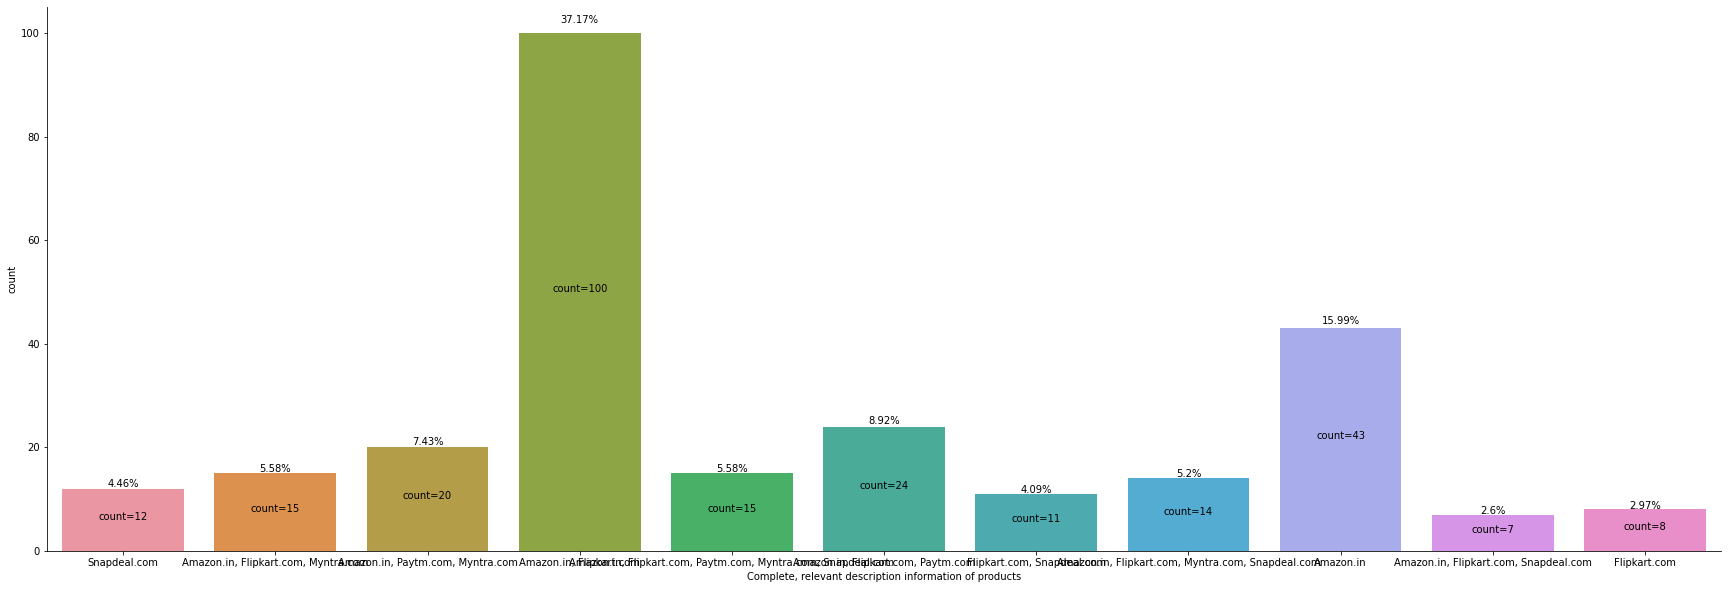

In [ ]:
plot_count(df, 'Complete, relevant description information of products', (30,10))

The unique values in 'Fast loading website speed of website and application' are [Snapdeal.com, Amazon.in, Flipkart.com, Myntra.com, Amazon.in, Paytm.com, Amazon.in, Flipkart.com, Snapdeal.com, Amazon.in, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Paytm.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                   

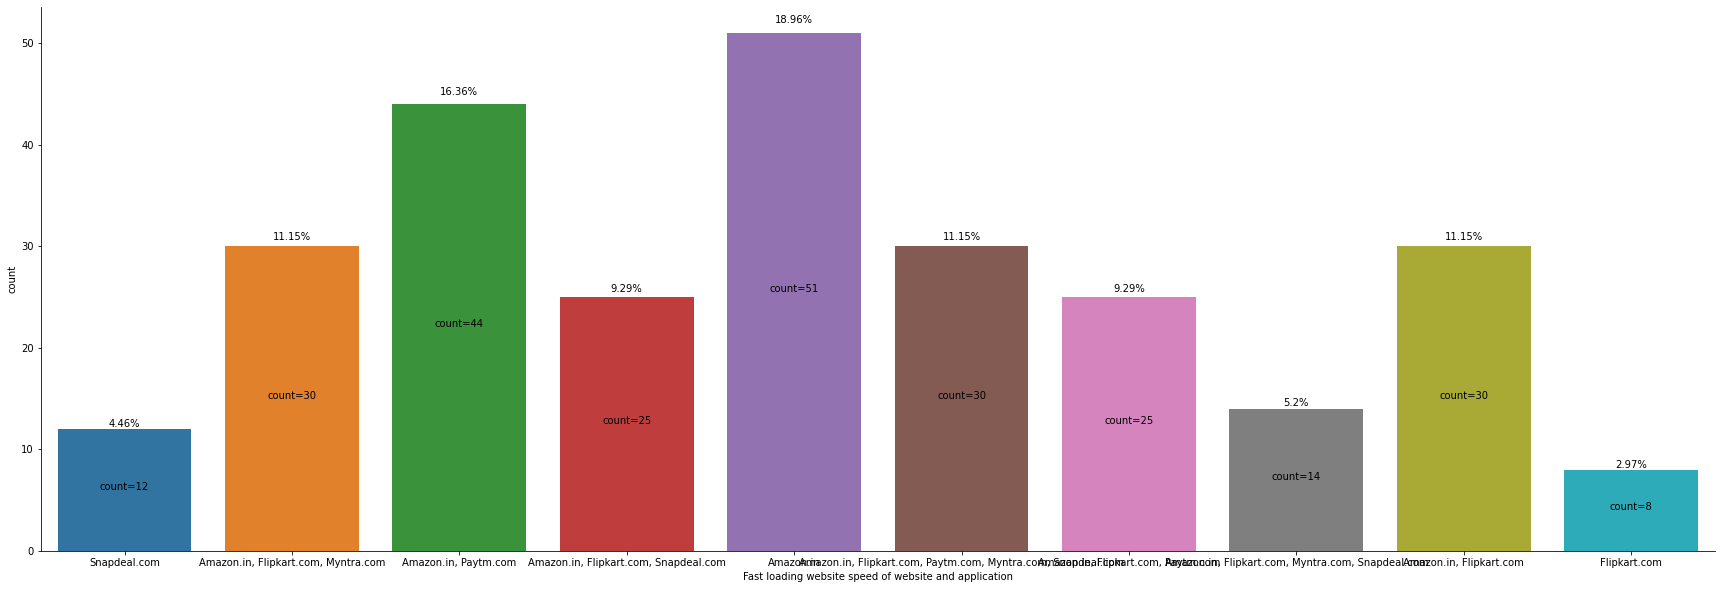

In [ ]:
plot_count(df, 'Fast loading website speed of website and application', (30,10))

The unique values in 'Reliability of the website or application' are [Paytm.com, Myntra.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Paytm.com, Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com, Amazon.in, Flipkart.com, Snapdeal.com, Amazon.in, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application

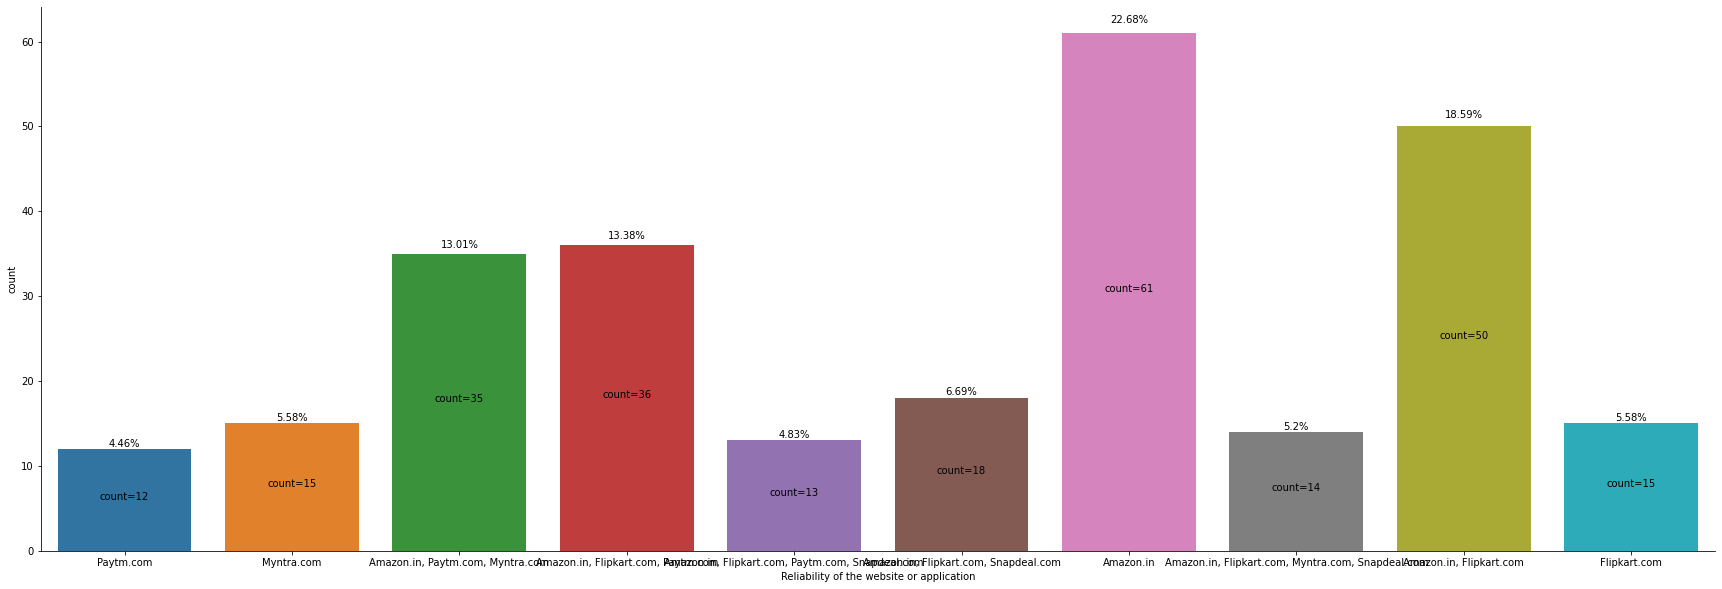

In [ ]:
plot_count(df, 'Reliability of the website or application', (30,10))

The unique values in 'Quickness to complete purchase' are [Paytm.com, Amazon.com, Flipkart.com, Myntra.com, Amazon.com, Paytm.com, Myntra.com, Amazon.com, Flipkart.com, Paytm.com, Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal, Amazon.com, Flipkart.com, Myntra.com, Snapdeal, Amazon.com, Flipkart.com, Flipkart.com]
The unique value counts are as follows:
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


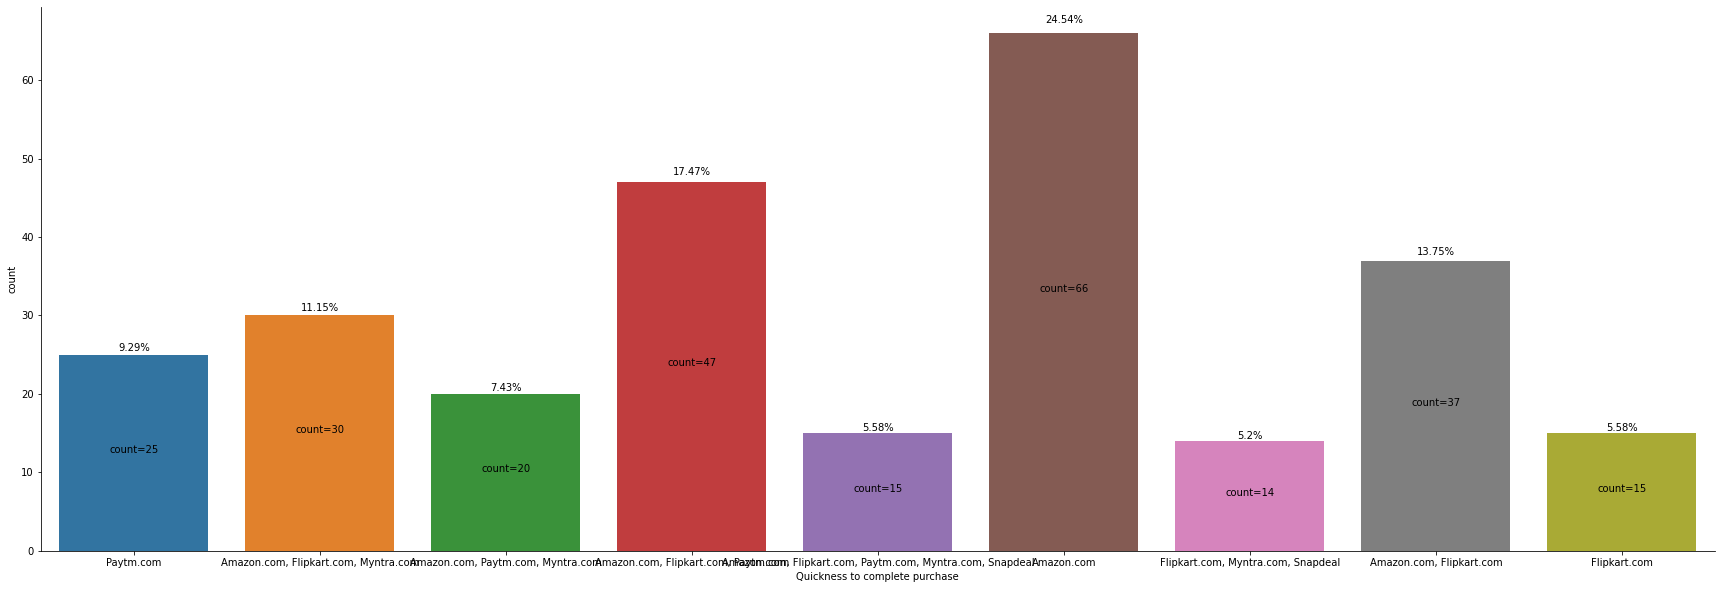

In [ ]:
plot_count(df, 'Quickness to complete purchase', (30,10))

The unique values in 'Availability of several payment options' are [Patym.com, Amazon.in, Flipkart.com, Myntra.com, Patym.com, Myntra.com, Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Snapdeal.com, Amazon.in, Flipkart.com, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Patym.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com            

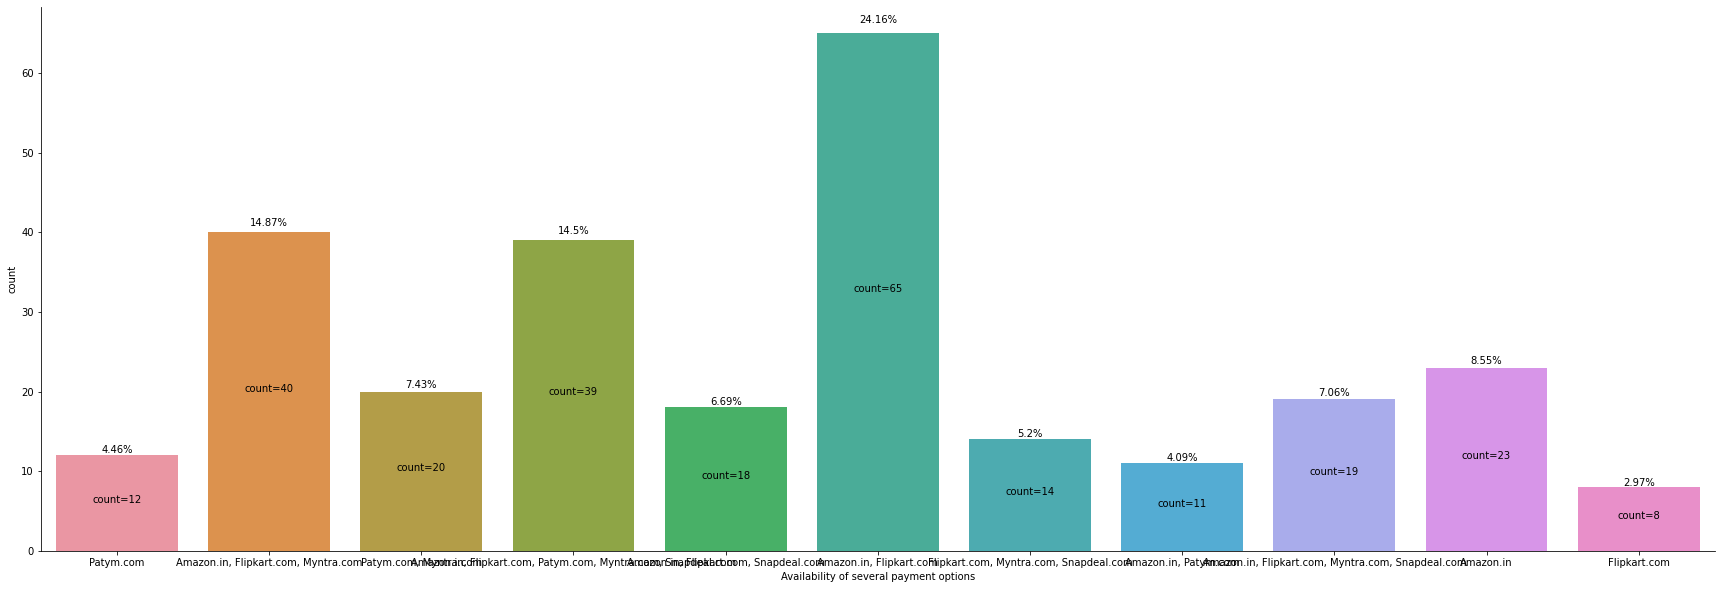

In [ ]:
plot_count(df, 'Availability of several payment options', (30,10))

The unique values in 'Speedy order delivery' are [Amazon.in, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Snapdeal.com, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Myntra.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery, dtype: int64


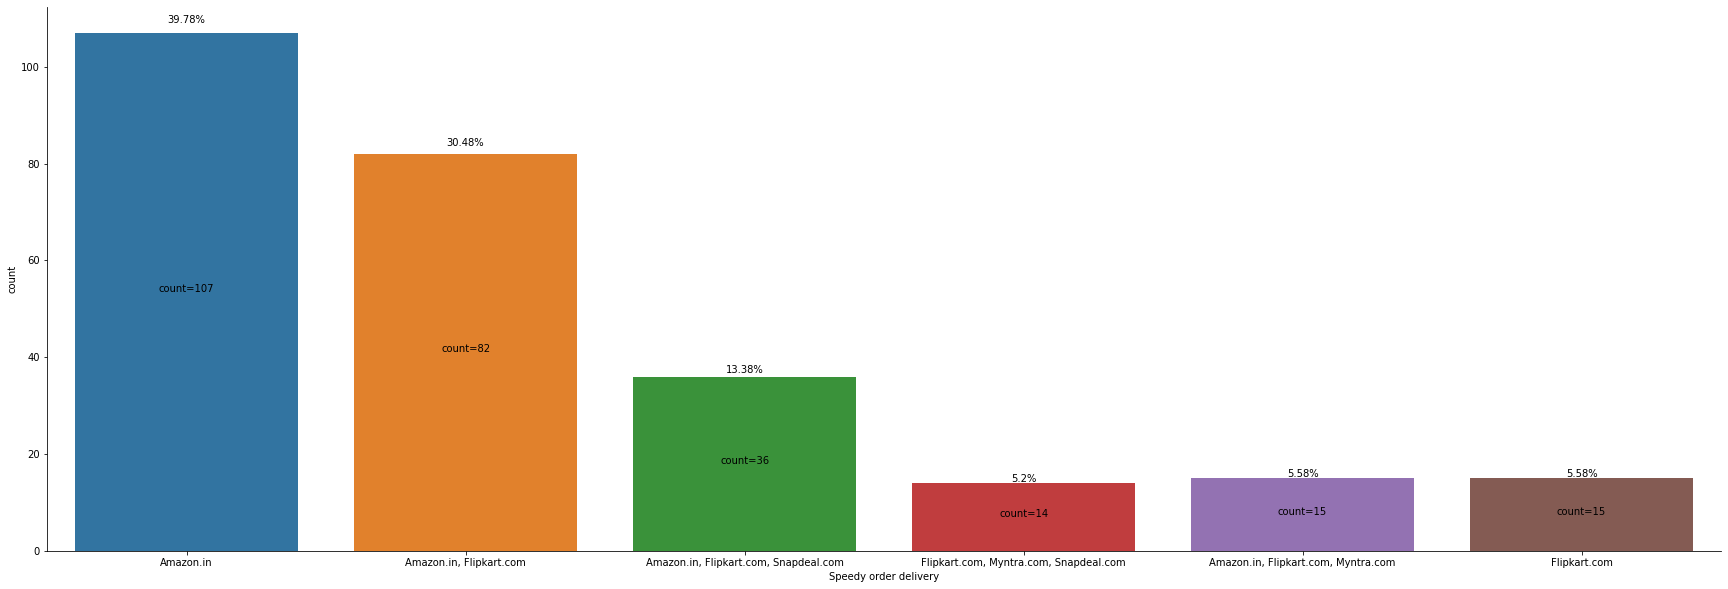

In [ ]:
plot_count(df, 'Speedy order delivery', (30,10))

The unique values in 'Privacy of customers’ information' are [Amazon.in, Myntra.com, Amazon.in, Flipkart.com, Myntra.com, Amazon.in, Paytm.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Paytm.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Paytm.com, Amazon.in, Flipkart.com, Snapdeal.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapd

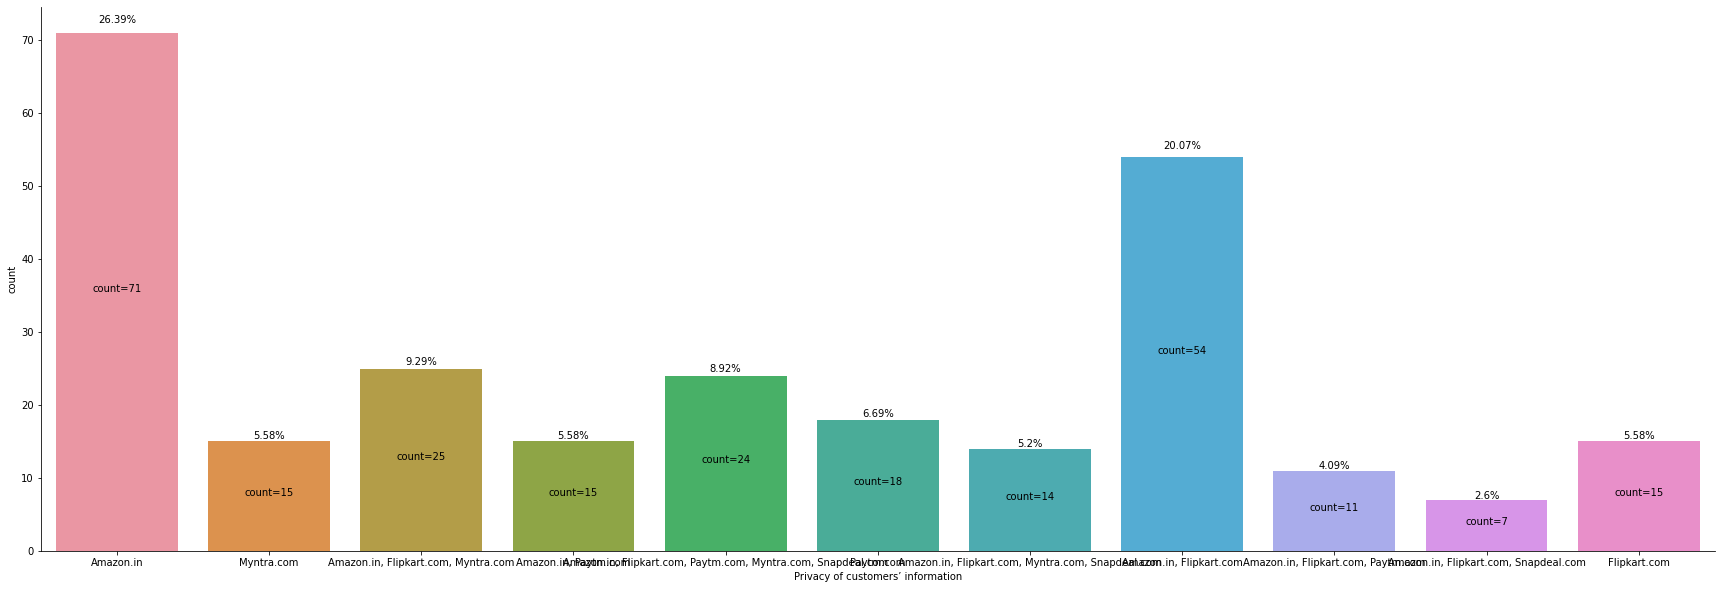

In [ ]:
plot_count(df, 'Privacy of customers’ information', (30,10))

The unique values in 'Security of customer financial information' are [Amazon.in, Myntra.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Snapdeal.com, Paytm.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Flipkart.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Paytm.com, Amazon.in, Snapdeal.com]
The unique value counts are as follows:
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                       

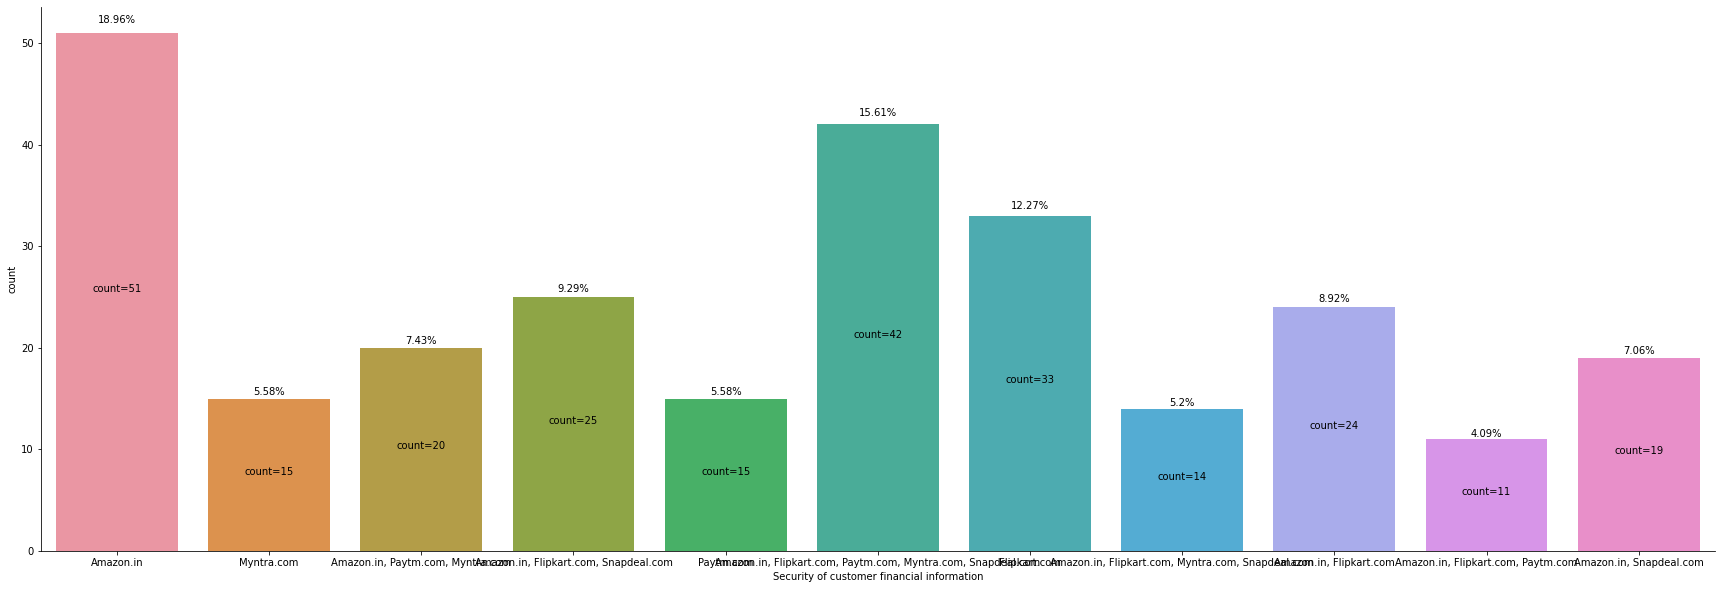

In [ ]:
plot_count(df, 'Security of customer financial information', (30,10))

The unique values in 'Perceived Trustworthiness' are [Flipkart.com, Myntra.com, Amazon.in, Myntra.com, Amazon.in, Flipkart.com, Snapdeal.com, Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com, Amazon.in, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Paytm.com]
The unique value counts are as follows:
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthines

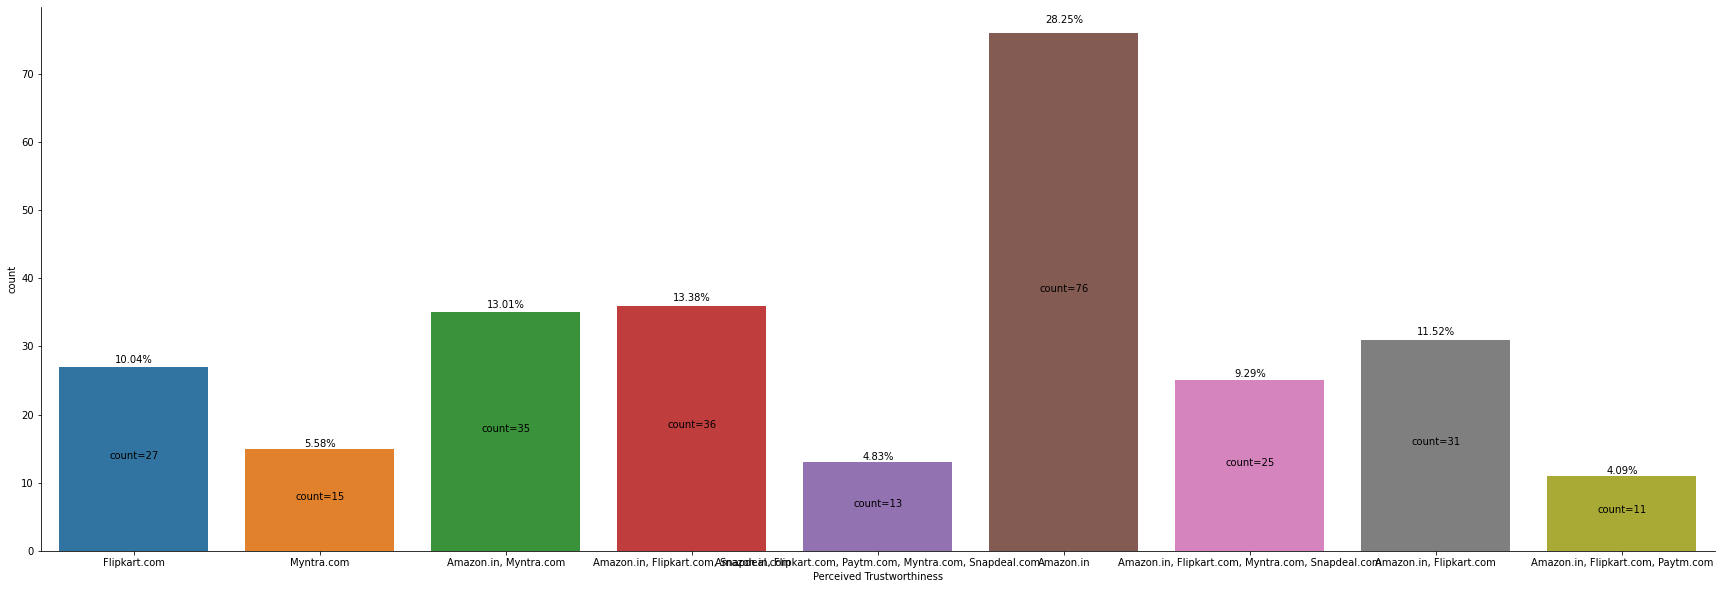

In [ ]:
plot_count(df, 'Perceived Trustworthiness', (30,10))

The unique values in 'Presence of online assistance through multi-channel' are [Paytm.com, Amazon.in, Flipkart.com, Myntra.com, Myntra.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal, Amazon.in, Myntra.com, Amazon.in, Flipkart.com, Paytm.com, Amazon.in, Amazon.in, Flipkart.com, Amazon.in, Snapdeal, Flipkart.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


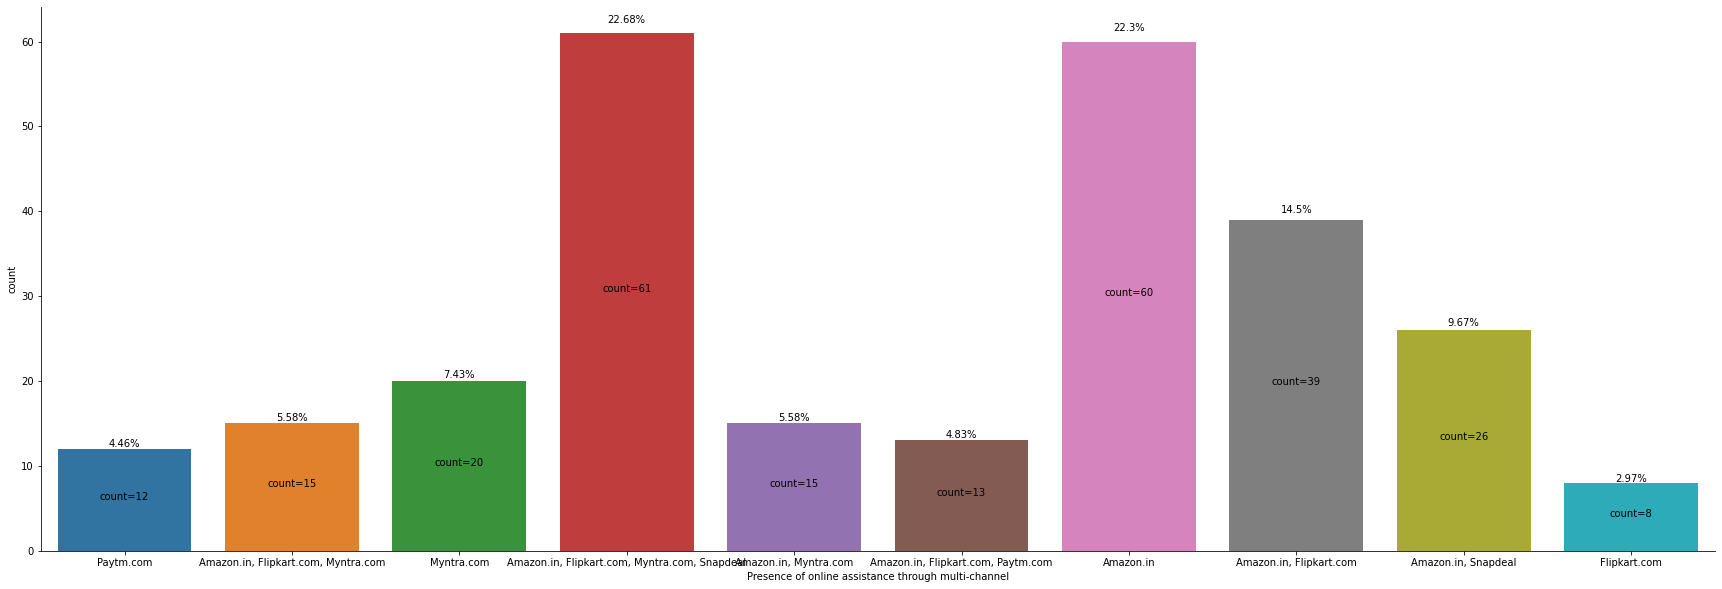

In [ ]:
plot_count(df, 'Presence of online assistance through multi-channel', (30,10))

The unique values in 'Longer time to get logged in (promotion, sales period)' are [Amazon.in, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Flipkart.com, Paytm.com, Flipkart.com, Paytm.com, Snapdeal.com, Amazon.in, Flipkart.com, Snapdeal.com, Paytm.com, Amazon.in, Paytm.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


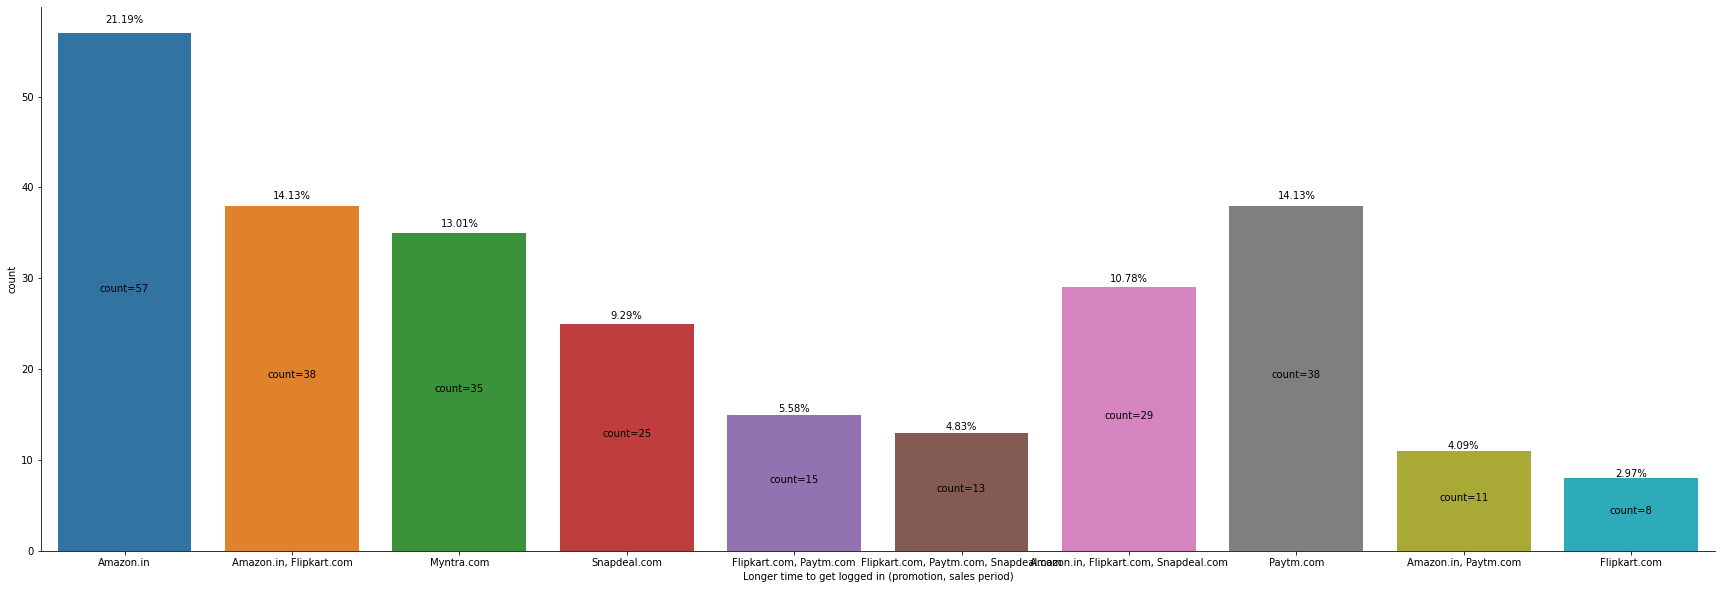

In [ ]:
plot_count(df, 'Longer time to get logged in (promotion, sales period)', (30,10))

The unique values in 'Longer time in displaying graphics and photos (promotion, sales period)' are [Amazon.in, Myntra.com, Myntra.com, Snapdeal.com, Paytm.com, Amazon.in, Paytm.com, Amazon.in, Flipkart.com, Amazon.in, Myntra.com, Snapdeal.com, Flipkart.com, Snapdeal.com, Snapdeal.com, Flipkart.com]
The unique value counts are as follows:
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


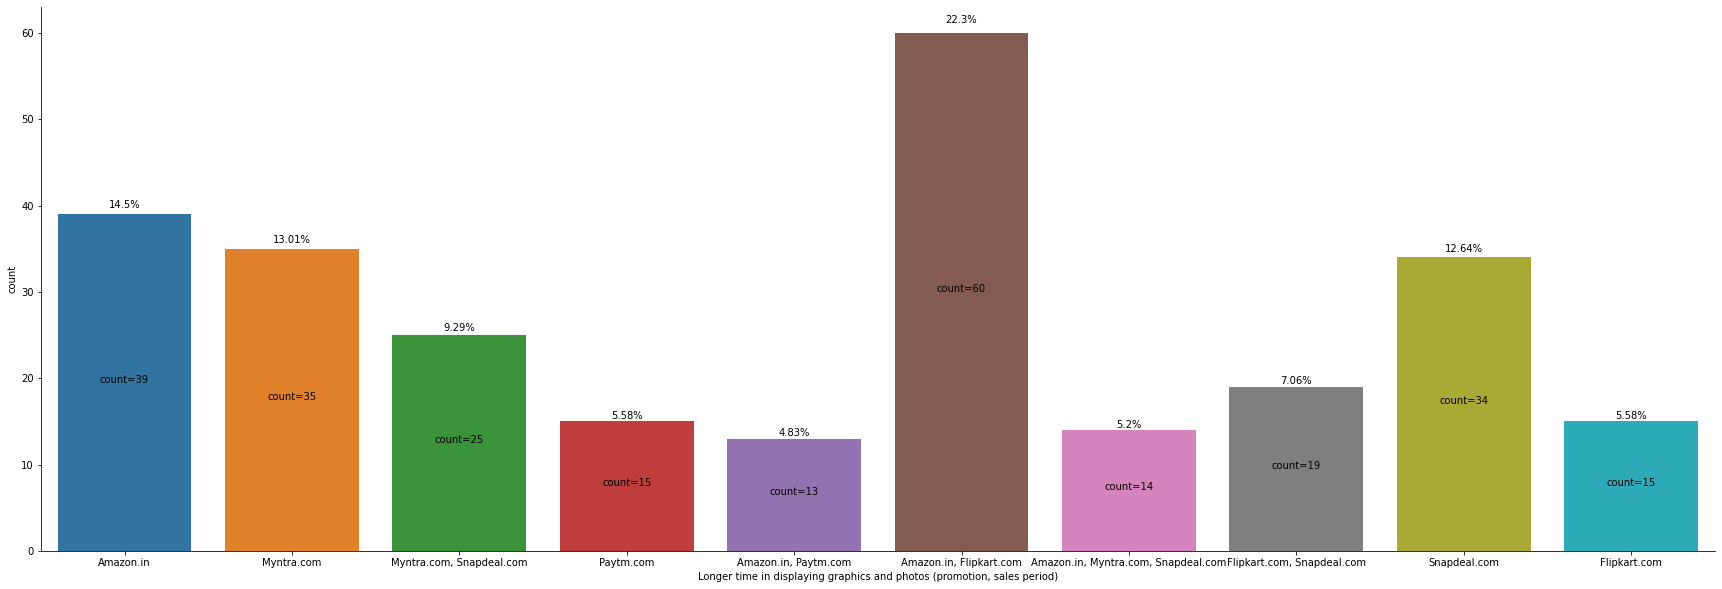

In [ ]:
plot_count(df, 'Longer time in displaying graphics and photos (promotion, sales period)', (30,10))

The unique values in 'Late declaration of price (promotion, sales period)' are [Flipkart.com, snapdeal.com, Myntra.com, Paytm.com, Amazon.in, Paytm.com, Amazon.in, Paytm.com, snapdeal.com, Amazon.in, Flipkart.com]
The unique value counts are as follows:
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64


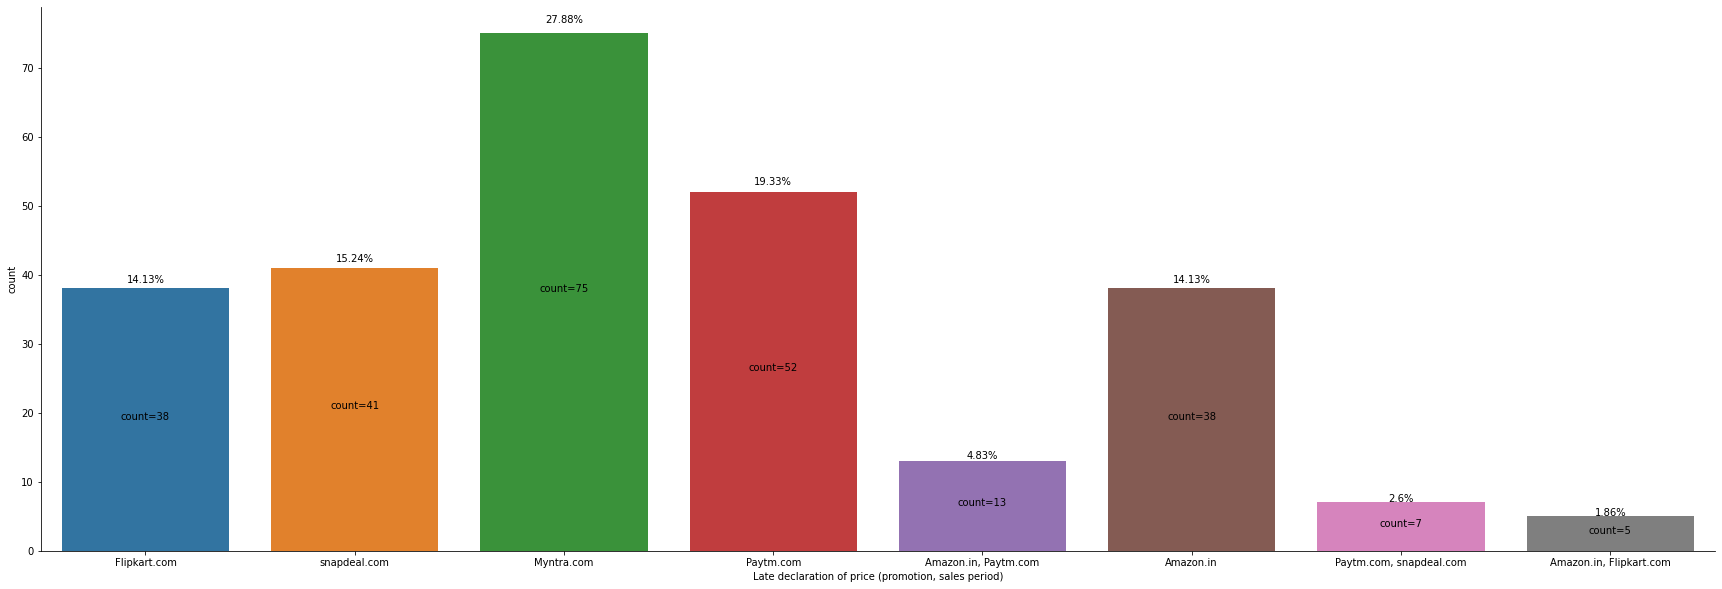

In [ ]:
plot_count(df, 'Late declaration of price (promotion, sales period)', (30,10))

The unique values in 'Longer page loading time (promotion, sales period)' are [Flipkart.com, Snapdeal.com, Myntra.com, Paytm.com, Amazon.in, Paytm.com, Amazon.in, Flipkart.com, Amazon.in, Snapdeal.com, Flipkart.com, Snapdeal.com, Paytm.com, Snapdeal.com, Amazon.in, Amazon.in, Paytm.com, Myntra.com]
The unique value counts are as follows:
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


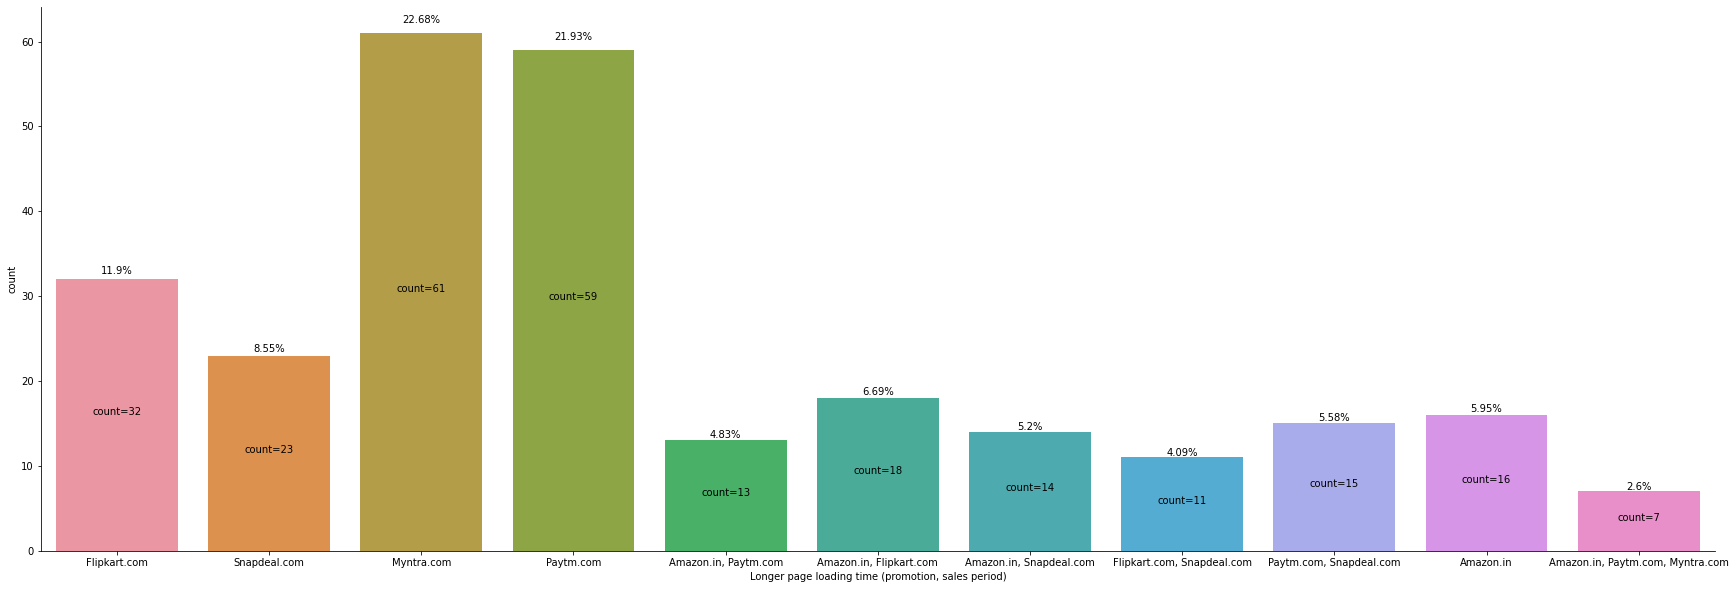

In [ ]:
plot_count(df, 'Longer page loading time (promotion, sales period)', (30,10))

The unique values in 'Limited mode of payment on most products (promotion, sales period)' are [Amazon.in, Snapdeal.com, Paytm.com, Amazon.in, Paytm.com, Flipkart.com, Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com, Myntra.com, Snapdeal.com]
The unique value counts are as follows:
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


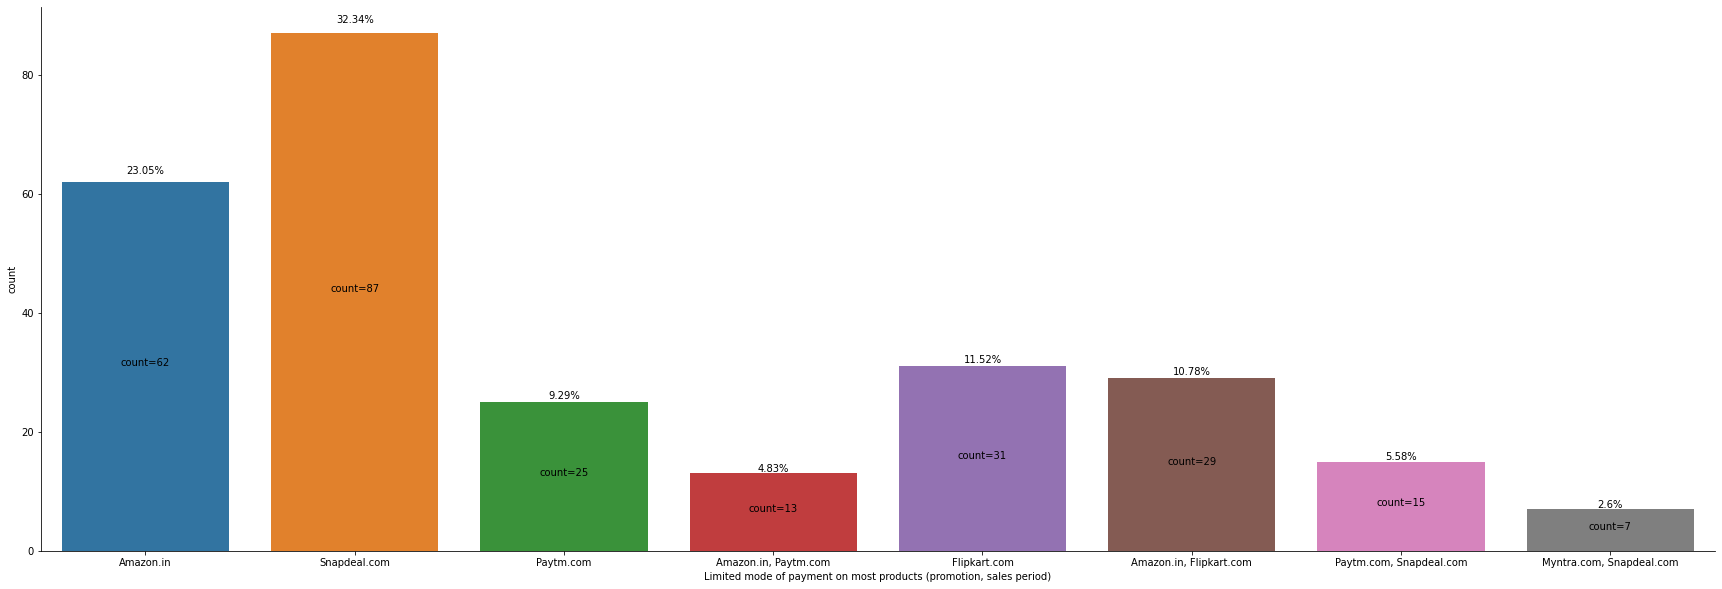

In [ ]:
plot_count(df, 'Limited mode of payment on most products (promotion, sales period)', (30,10))

The unique values in 'Longer delivery period' are [Paytm.com, Snapdeal.com, Flipkart.com, Amazon.in, Paytm.com, Snapdeal.com, Myntra.com]
The unique value counts are as follows:
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


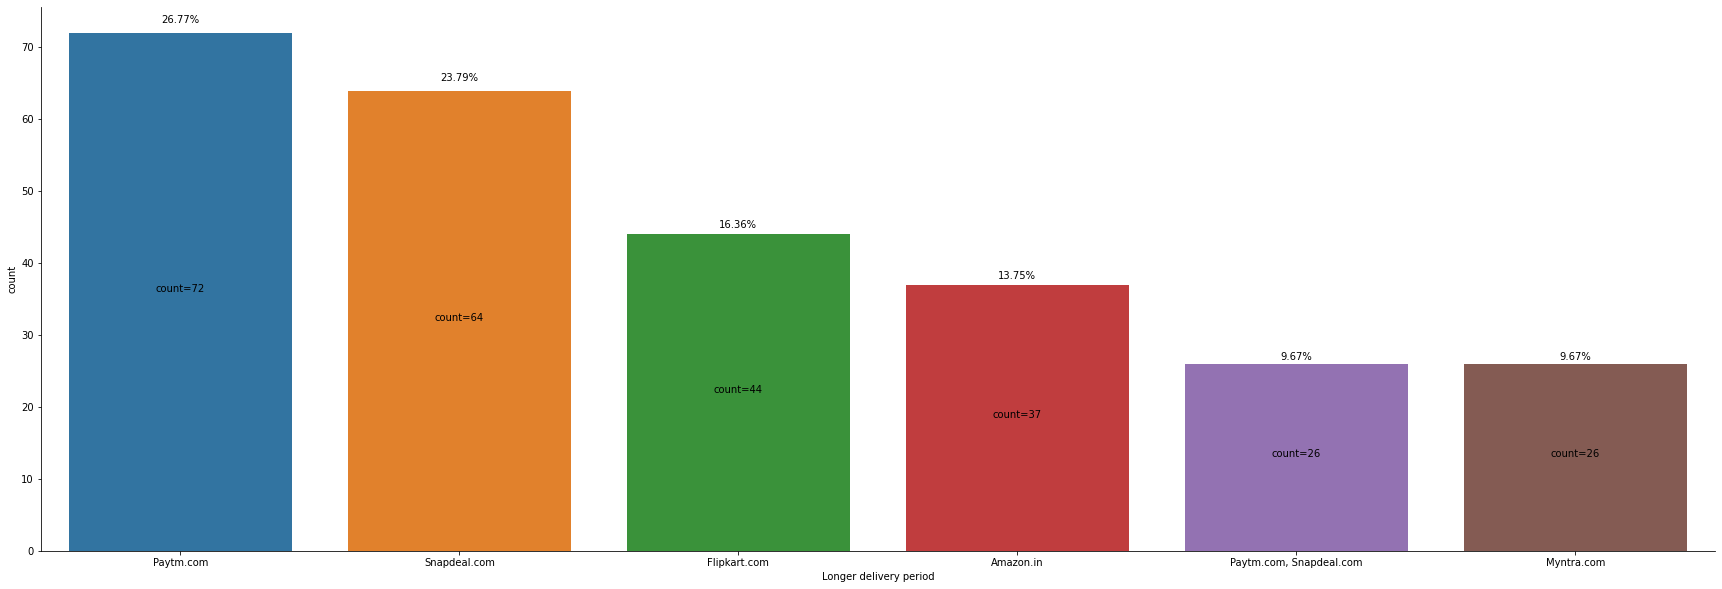

In [ ]:
plot_count(df, 'Longer delivery period', (30,10))

The unique values in 'Change in website/Application design' are [Flipkart.com, Amazon.in, Paytm.com, Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com, Flipkart.com, Myntra.com]
The unique value counts are as follows:
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


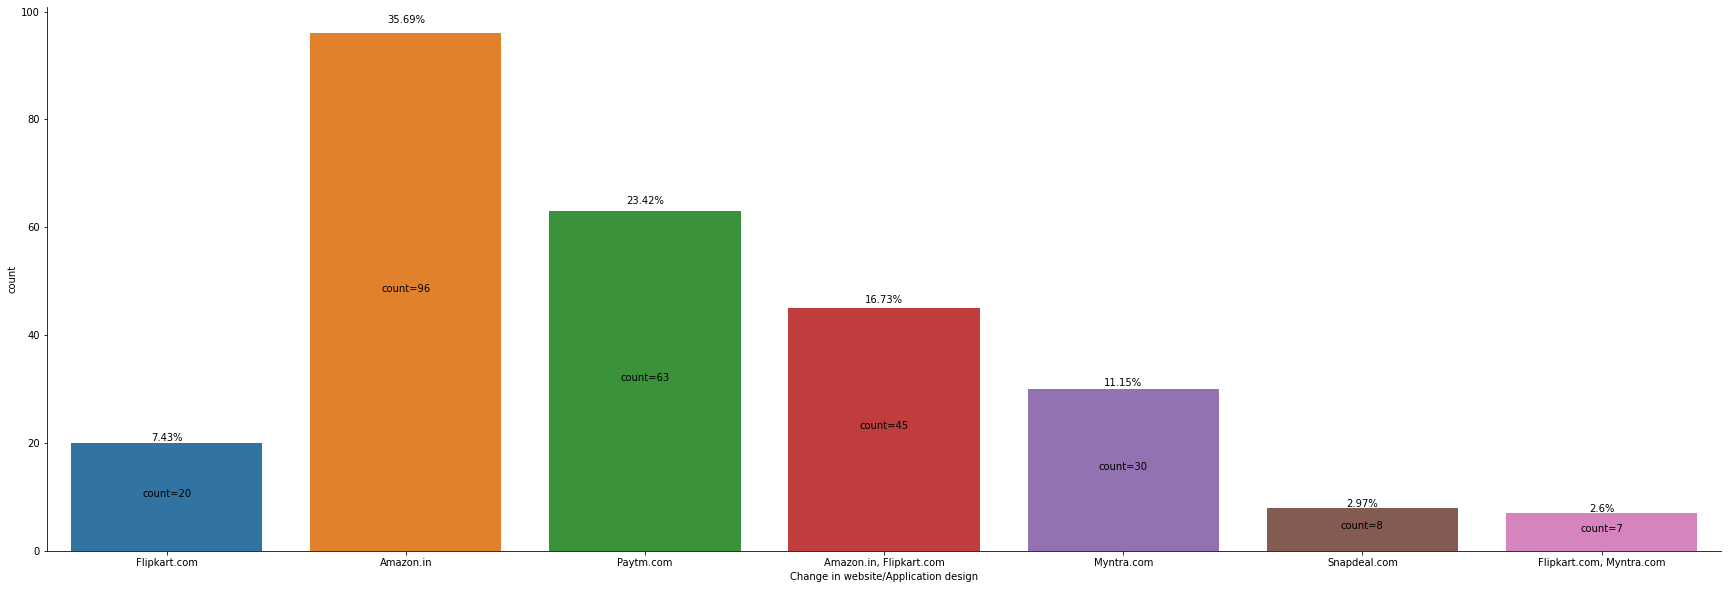

In [ ]:
plot_count(df, 'Change in website/Application design', (30,10))

The unique values in 'Frequent disruption when moving from one page to another' are [Amazon.in, Myntra.com, Paytm.com, Amazon.in, Flipkart.com, Snapdeal.com, Flipkart.com, Myntra.com, Snapdeal.com, Flipkart.com, Snapdeal.com]
The unique value counts are as follows:
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


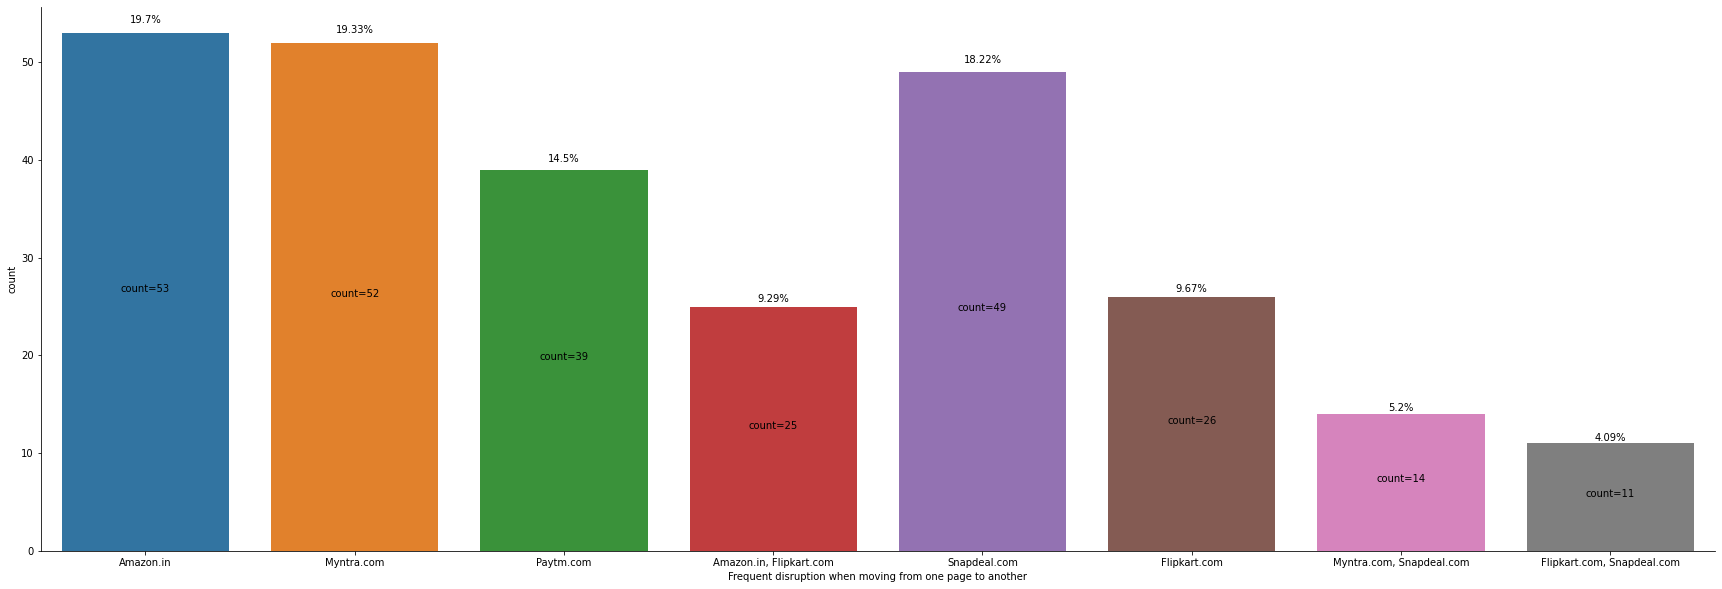

In [ ]:
plot_count(df, 'Frequent disruption when moving from one page to another', (30,10))

The unique values in 'Website is as efficient as before' are [Amazon.in, Amazon.in, Flipkart.com, Amazon.in, Flipkart.com, Paytm.com, Paytm.com, Snapdeal.com, Myntra.com, Snapdeal.com, Flipkart.com, Amazon.in, Paytm.com]
The unique value counts are as follows:
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


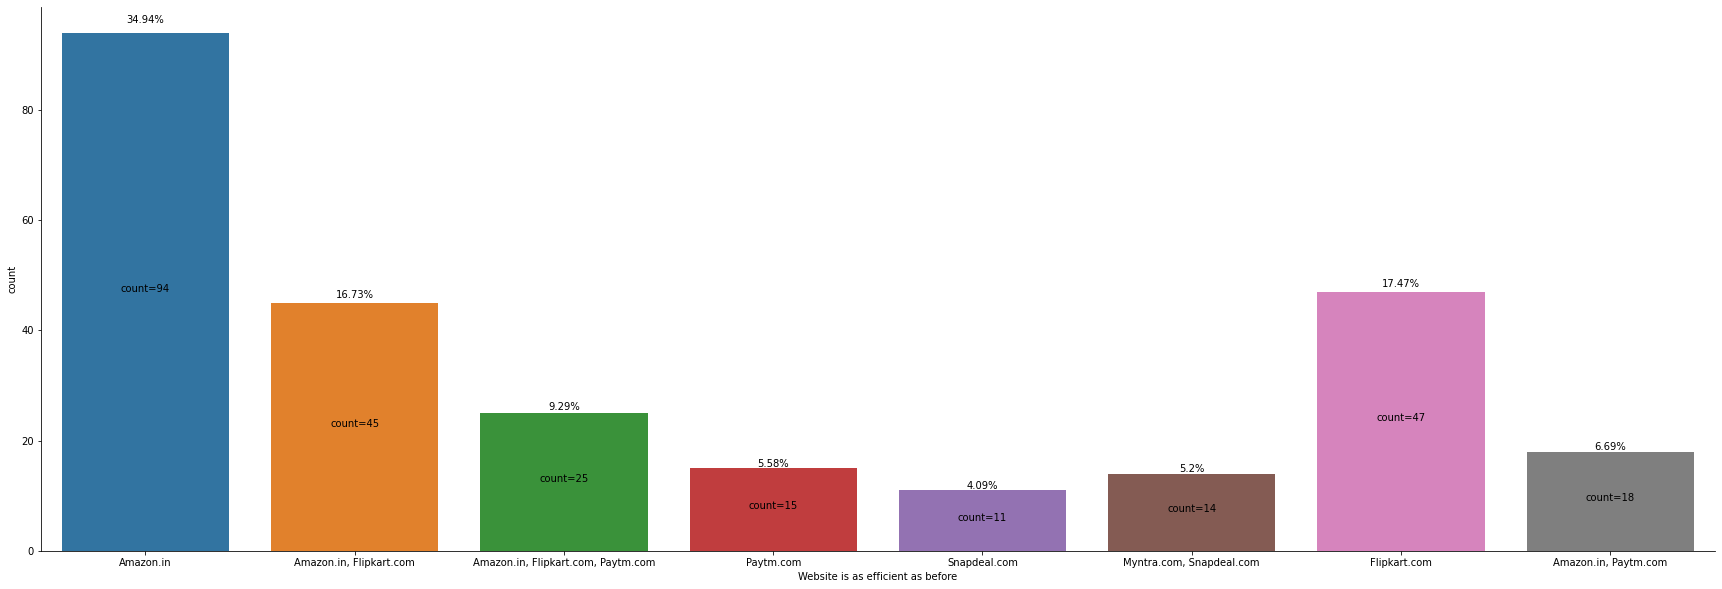

In [ ]:
plot_count(df, 'Website is as efficient as before', (30,10))

The unique values in 'Which of the Indian online retailer would you recommend to a friend?' are [Flipkart.com, Amazon.in, Myntra.com, Amazon.in, Paytm.com, Myntra.com, Amazon.in, Flipkart.com, Amazon.in, Paytm.com, Flipkart.com, Paytm.com, Myntra.com, snapdeal.com, Amazon.in, Amazon.in, Flipkart.com, Myntra.com]
The unique value counts are as follows:
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


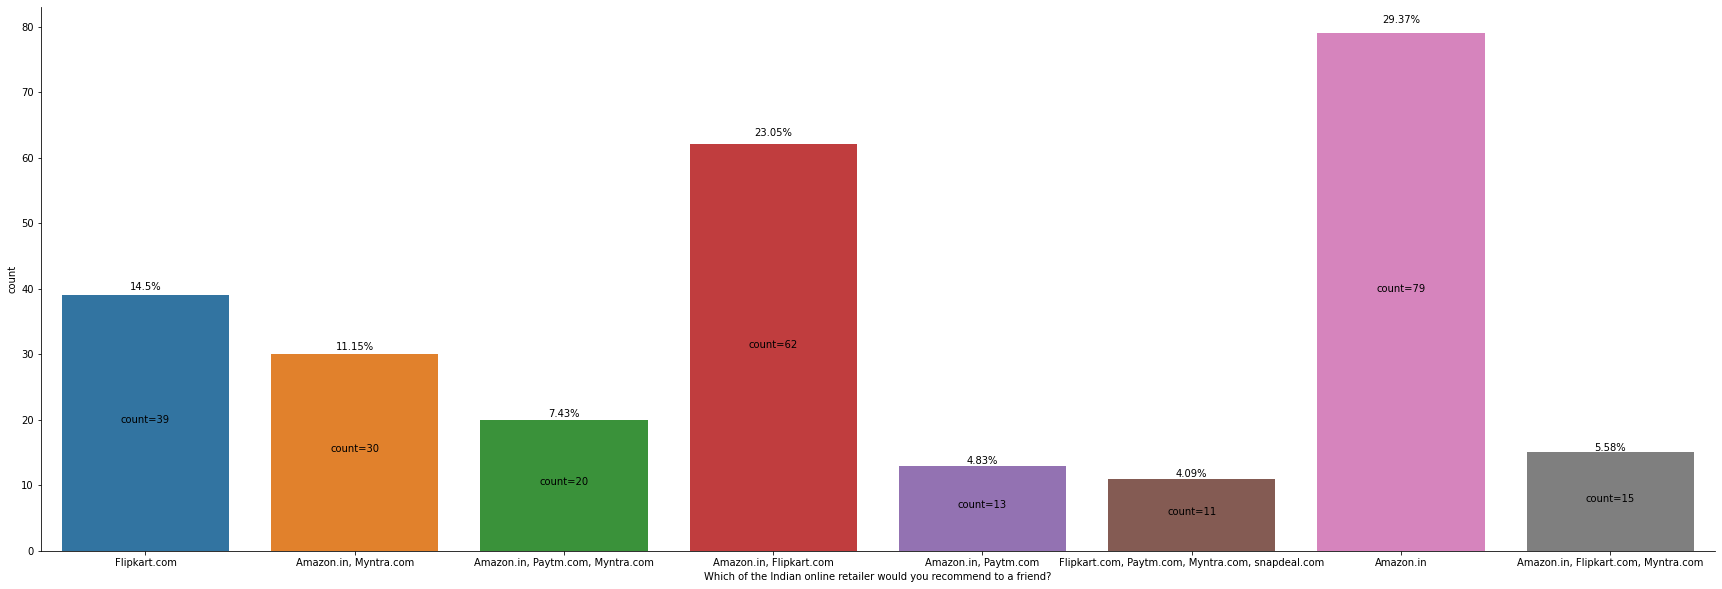

In [ ]:
plot_count(df, 'Which of the Indian online retailer would you recommend to a friend?', (30,10))

In [ ]:
df['From the following, tick any (or all) of the online retailers you have shopped from;'].unique()

array(['Amazon.in, Paytm.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Paytm.com, Myntra.com',
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com',
       'Amazon.in, Flipkart.com', 'Amazon.in, Flipkart.com, Snapdeal.com',
       'Amazon.in', 'Amazon.in, Flipkart.com, Paytm.com'], dtype=object)

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com

In [ ]:
df['Which of the Indian online retailer would you recommend to a friend?'].unique()

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Paytm.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com'], dtype=object)

269 customers have used the Amazon.in site.
221 customers have used the Flipkart.com site.
150 customers have used the Paytm.com site.
146 customers have used the Myntra.com site.
182 customers have used the Snapdeal.com site.


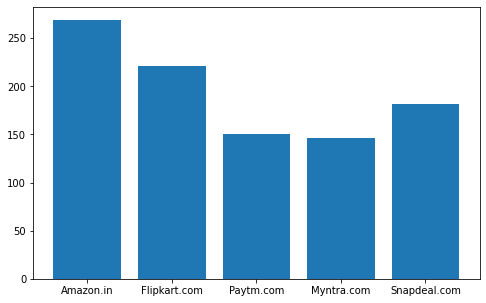

In [ ]:
retail_used = dict({'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0})
for row in df['From the following, tick any (or all) of the online retailers you have shopped from;']:
  if 'Amazon.in' in row:
    retail_used['Amazon.in'] = retail_used.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_used['Flipkart.com'] = retail_used.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_used['Paytm.com'] = retail_used.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_used['Myntra.com'] = retail_used.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_used['Snapdeal.com'] = retail_used.get('Snapdeal.com') + 1
  
for key, value in retail_used.items():
  print(f'{value} customers have used the {key} site.')

keys = retail_used.keys()
values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(keys, values)
plt.show()

Observations:
1. Most of the customers are using Amazon websites followed by Flipkart and Snapdeal.
2. Myntra is the least used site.

In [ ]:
#retail_used = dict({'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0})

df['Amazon_users'] = df['From the following, tick any (or all) of the online retailers you have shopped from;'].apply(lambda x : 1 if 'Amazon.in' in x else 0)
df['Flipkart_users'] = df['From the following, tick any (or all) of the online retailers you have shopped from;'].apply(lambda x : 1 if 'Flipkart.com' in x else 0)
df['Paytm_users'] = df['From the following, tick any (or all) of the online retailers you have shopped from;'].apply(lambda x : 1 if 'Paytm.com' in x else 0)
df['Myntra_users'] = df['From the following, tick any (or all) of the online retailers you have shopped from;'].apply(lambda x : 1 if 'Myntra.com' in x else 0)
df['Snapdeal_users'] = df['From the following, tick any (or all) of the online retailers you have shopped from;'].apply(lambda x : 1 if 'Snapdeal.com' in x else 0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

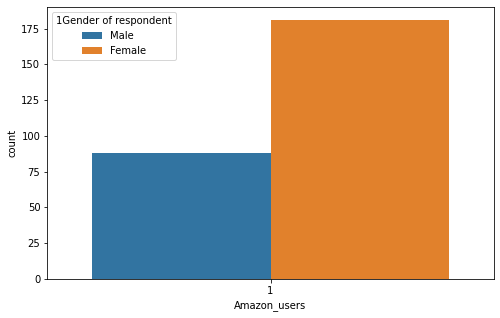

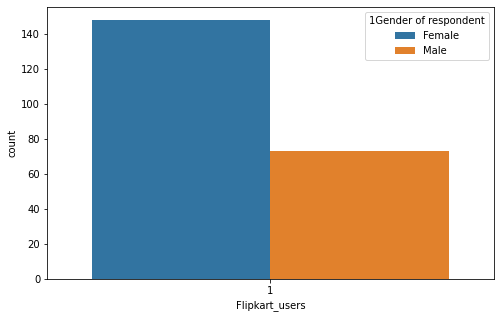

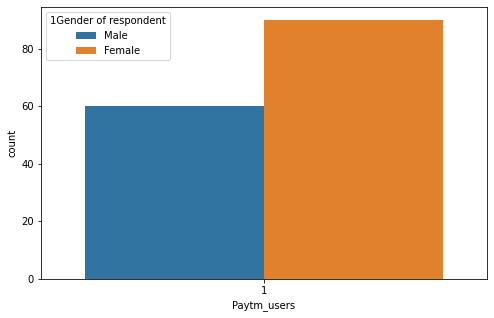

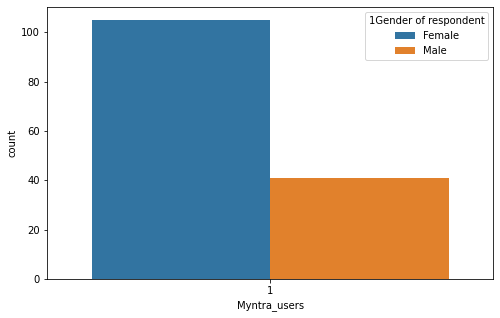

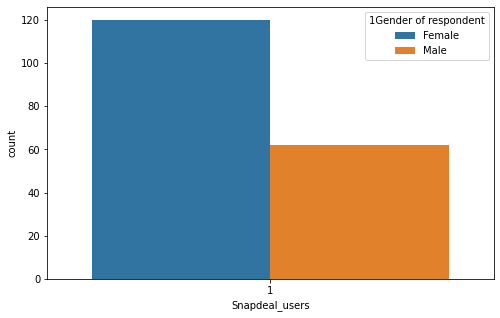

In [ ]:

sites = ['Amazon_users', 'Flipkart_users', 'Paytm_users', 'Myntra_users', 'Snapdeal_users']

for site in sites:
  users = df[df[site]==1]
  plt.figure(figsize=(8,5))
  sns.countplot(users[site], hue=users['1Gender of respondent'])
plt.show()

Observations:
1. Most of the users in all of the sites are female customers.

249 customers feel that the Amazon.in site is easy to use.
201 customers feel that the Flipkart.com site is easy to use.
125 customers feel that the Paytm.com site is easy to use.
147 customers feel that the Myntra.com site is easy to use.
130 customers feel that the Snapdeal.com site is easy to use.


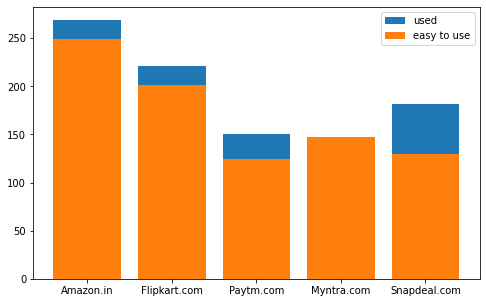

In [ ]:
retail_easeToUse = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Easy to use website or application']:
  if 'Amazon.in' in row:
    retail_easeToUse['Amazon.in'] = retail_easeToUse.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_easeToUse['Flipkart.com'] = retail_easeToUse.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_easeToUse['Paytm.com'] = retail_easeToUse.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_easeToUse['Myntra.com'] = retail_easeToUse.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_easeToUse['Snapdeal.com'] = retail_easeToUse.get('Snapdeal.com') + 1
  
for k,v in retail_easeToUse.items():
  print(f'{v} customers feel that the {k} site is easy to use.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_easeToUse.keys()
values = retail_easeToUse.values()
plt.bar(keys, values)
plt.legend(['used','easy to use'])
plt.show()

Observations:
1. Most of the customers feel that Amazon is the most easy to use web store followed by Flipkart.
2. Though moany customers are using Snapdeal, not many customers feel that Snapdeal is an easy to use site.

227 customers feel that the Amazon.in site is visually good.
175 customers feel that the Flipkart.com site is visually good.
67 customers feel that the Paytm.com site is visually good.
115 customers feel that the Myntra.com site is visually good.
61 customers feel that the Snapdeal.com site is visually good.


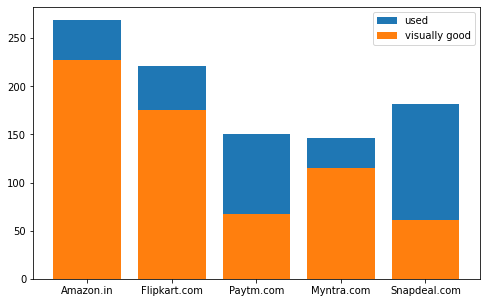

In [ ]:
retail_visual = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Visual appealing web-page layout']:
  if 'Amazon.in' in row:
    retail_visual['Amazon.in'] = retail_visual.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_visual['Flipkart.com'] = retail_visual.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_visual['Paytm.com'] = retail_visual.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_visual['Myntra.com'] = retail_visual.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_visual['Snapdeal.com'] = retail_visual.get('Snapdeal.com') + 1
  
for k,v in retail_visual.items():
  print(f'{v} customers feel that the {k} site is visually good.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_visual.keys()
values = retail_visual.values()
plt.bar(keys, values)
plt.legend(['used','visually good'])
plt.show()

Observations:
1. Amazon is considered to be the most visually appealing site.
2. Snapdeal and Myntra are the least visually appealing sites.
3. The most percentage of customers of the Myntra site seem to like its visual aspects than any other sites.

220 customers feel that the Amazon.in site has wide variety of products on offer.
184 customers feel that the Flipkart.com site has wide variety of products on offer.
20 customers feel that the Paytm.com site has wide variety of products on offer.
64 customers feel that the Myntra.com site has wide variety of products on offer.
14 customers feel that the Snapdeal.com site has wide variety of products on offer.


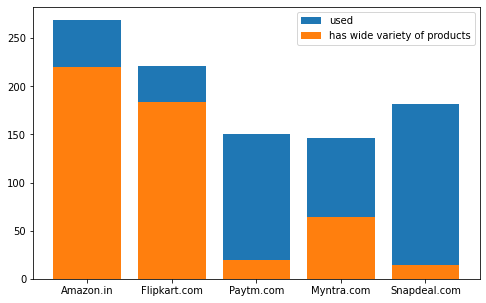

In [ ]:
retail_offer = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Wild variety of product on offer']:
  if 'Amazon.in' in row:
    retail_offer['Amazon.in'] = retail_offer.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_offer['Flipkart.com'] = retail_offer.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_offer['Paytm.com'] = retail_offer.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_offer['Myntra.com'] = retail_offer.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_offer['Snapdeal.com'] = retail_offer.get('Snapdeal.com') + 1
  
for k,v in retail_offer.items():
  print(f'{v} customers feel that the {k} site has wide variety of products on offer.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_offer.keys()
values = retail_offer.values()
plt.bar(keys, values)
plt.legend(['used','has wide variety of products'])
plt.show()

Observations:
1. Most of the customers feel that the Amazon site has the most wide variety of products on offer followed by Flipkart.
2. Snapdeal and Paytm sites have the least variety of products.

238 customers feel that the Amazon.in site has complete and relevant description infomration of Products.
194 customers feel that the Flipkart.com site has complete and relevant description infomration of Products.
59 customers feel that the Paytm.com site has complete and relevant description infomration of Products.
64 customers feel that the Myntra.com site has complete and relevant description infomration of Products.
59 customers feel that the Snapdeal.com site has complete and relevant description infomration of Products.


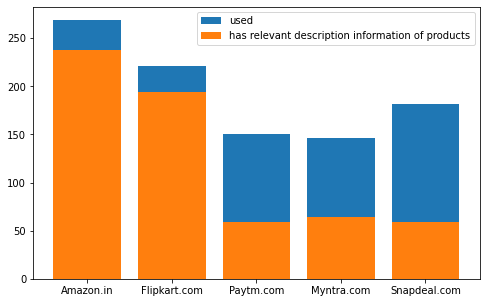

In [ ]:
retail_desc = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Complete, relevant description information of products']:
  if 'Amazon.in' in row:
    retail_desc['Amazon.in'] = retail_desc.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_desc['Flipkart.com'] = retail_desc.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_desc['Paytm.com'] = retail_desc.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_desc['Myntra.com'] = retail_desc.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_desc['Snapdeal.com'] = retail_desc.get('Snapdeal.com') + 1
  
for k,v in retail_desc.items():
  print(f'{v} customers feel that the {k} site has complete and relevant description infomration of Products.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_desc.keys()
values = retail_desc.values()
plt.bar(keys, values)
plt.legend(['used','has relevant description information of products'])
plt.show()

Observations:
1. Most of the customers think that, Amazon and Flipkart sites have the most relevant information on products on the site.
2. Snapdeal has the least percentage of people thinking that the site has relevant information on products on the site.

249 customers feel that the Amazon.in site is fast.
162 customers feel that the Flipkart.com site is fast.
99 customers feel that the Paytm.com site is fast.
74 customers feel that the Myntra.com site is fast.
81 customers feel that the Snapdeal.com site is fast.


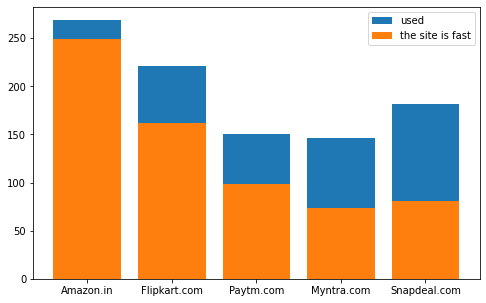

In [ ]:
retail_load = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Fast loading website speed of website and application']:
  if 'Amazon.in' in row:
    retail_load['Amazon.in'] = retail_load.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_load['Flipkart.com'] = retail_load.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_load['Paytm.com'] = retail_load.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_load['Myntra.com'] = retail_load.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_load['Snapdeal.com'] = retail_load.get('Snapdeal.com') + 1
  
for k,v in retail_load.items():
  print(f'{v} customers feel that the {k} site is fast.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_load.keys()
values = retail_load.values()
plt.bar(keys, values)
plt.legend(['used','the site is fast'])
plt.show()

Observations:
1. Most customers think that the Amazon site is very fast.
2. Only very less percentage of customers feel that the Snapdeal site is fast.

227 customers feel that the Amazon.in site is reliable.
146 customers feel that the Flipkart.com site is reliable.
96 customers feel that the Paytm.com site is reliable.
64 customers feel that the Myntra.com site is reliable.
45 customers feel that the Snapdeal.com site is reliable.


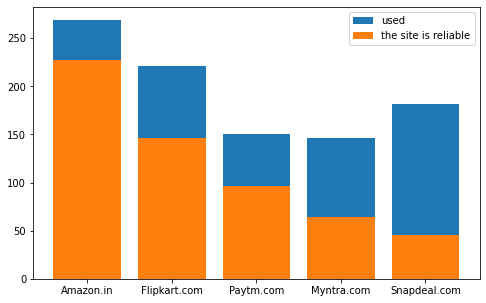

In [ ]:
retail_rel = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Reliability of the website or application']:
  if 'Amazon.in' in row:
    retail_rel['Amazon.in'] = retail_rel.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_rel['Flipkart.com'] = retail_rel.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_rel['Paytm.com'] = retail_rel.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_rel['Myntra.com'] = retail_rel.get('Myntra.com') + 1
  if 'Snapdeal.com' in row:
    retail_rel['Snapdeal.com'] = retail_rel.get('Snapdeal.com') + 1
  
for k,v in retail_rel.items():
  print(f'{v} customers feel that the {k} site is reliable.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_rel.keys()
values = retail_rel.values()
plt.bar(keys, values)
plt.legend(['used','the site is reliable'])
plt.show()

Observations:
1. Amazon is the most reliable site as per the survey.
2. Snapdeal is the least reliable site as per the survey.

In [ ]:
df['Quickness to complete purchase'].unique()

array(['Paytm.com', 'Amazon.com, Flipkart.com, Myntra.com',
       'Amazon.com, Paytm.com, Myntra.com',
       'Amazon.com, Flipkart.com, Paytm.com',
       'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal',
       'Amazon.com', 'Flipkart.com, Myntra.com, Snapdeal',
       'Amazon.com, Flipkart.com', 'Flipkart.com'], dtype=object)

215 customers feel that the Amazon.in site is quick to complete purchase.
158 customers feel that the Flipkart.com site is quick to complete purchase.
107 customers feel that the Paytm.com site is quick to complete purchase.
79 customers feel that the Myntra.com site is quick to complete purchase.
29 customers feel that the Snapdeal.com site is quick to complete purchase.


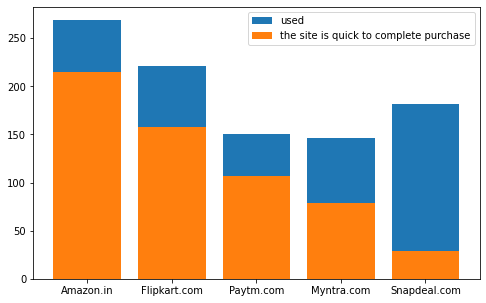

In [ ]:
retail_quk = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Quickness to complete purchase']:
  if 'Amazon.com' in row:
    retail_quk['Amazon.in'] = retail_quk.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_quk['Flipkart.com'] = retail_quk.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_quk['Paytm.com'] = retail_quk.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_quk['Myntra.com'] = retail_quk.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_quk['Snapdeal.com'] = retail_quk.get('Snapdeal.com') + 1
  
for k,v in retail_quk.items():
  print(f'{v} customers feel that the {k} site is quick to complete purchase.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_quk.keys()
values = retail_quk.values()
plt.bar(keys, values)
plt.legend(['used','the site is quick to complete purchase'])
plt.show()

Observations:
1. Most of the customers feel that Amazon is the quickest to complete purchases.
2. Very less customers feel that Snapdeal is quick. Most of them that used Snapdeal do not think that it quick enough to complete purchases.

In [ ]:
df['Availability of several payment options'].unique()

array(['Patym.com', 'Amazon.in, Flipkart.com, Myntra.com',
       'Patym.com, Myntra.com',
       'Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Snapdeal.com', 'Amazon.in, Flipkart.com',
       'Flipkart.com, Myntra.com, Snapdeal.com', 'Amazon.in, Patym.com',
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com', 'Amazon.in',
       'Flipkart.com'], dtype=object)

215 customers feel that the Amazon.in site has several payment options.
203 customers feel that the Flipkart.com site has several payment options.
82 customers feel that the Paytm.com site has several payment options.
132 customers feel that the Myntra.com site has several payment options.
90 customers feel that the Snapdeal.com site has several payment options.


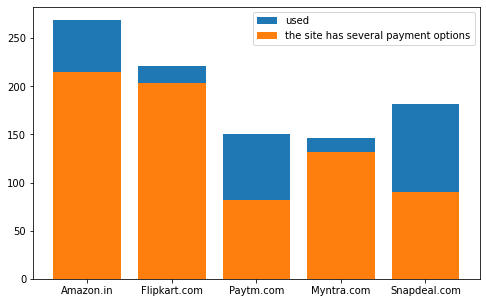

In [ ]:
retail_pmt = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Availability of several payment options']:
  if 'Amazon.in' in row:
    retail_pmt['Amazon.in'] = retail_pmt.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_pmt['Flipkart.com'] = retail_pmt.get('Flipkart.com') + 1
  if 'Patym.com' in row:
    retail_pmt['Paytm.com'] = retail_pmt.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_pmt['Myntra.com'] = retail_pmt.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_pmt['Snapdeal.com'] = retail_pmt.get('Snapdeal.com') + 1
  
for k,v in retail_pmt.items():
  print(f'{v} customers feel that the {k} site has several payment options.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_pmt.keys()
values = retail_pmt.values()
plt.bar(keys, values)
plt.legend(['used','the site has several payment options'])
plt.show()

Observations:
1. Most of the customers feel that Amazon has several payment options.
2. Percentage-wise, most percentage of customers that used Myntra feel that it has several payment options followed by Flipkart.
3. Most of the customers that used Snapdeal feel that it does not have several payment options.

206 customers feel that the financial information is secure in the Amazon.in site.
149 customers feel that the financial information is secure in the Flipkart.com site.
88 customers feel that the financial information is secure in the Paytm.com site.
91 customers feel that the financial information is secure in the Myntra.com site.
100 customers feel that the financial information is secure in the Snapdeal.com site.


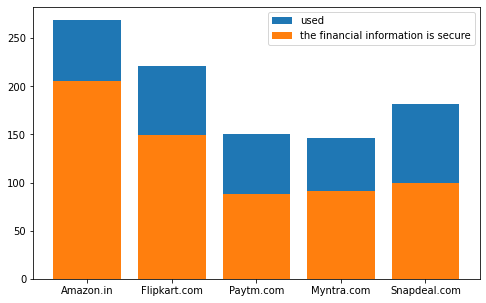

In [ ]:
retail_sec = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Security of customer financial information']:
  if 'Amazon.in' in row:
    retail_sec['Amazon.in'] = retail_sec.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_sec['Flipkart.com'] = retail_sec.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_sec['Paytm.com'] = retail_sec.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_sec['Myntra.com'] = retail_sec.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_sec['Snapdeal.com'] = retail_sec.get('Snapdeal.com') + 1
  
for k,v in retail_sec.items():
  print(f'{v} customers feel that the financial information is secure in the {k} site.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_sec.keys()
values = retail_sec.values()
plt.bar(keys, values)
plt.legend(['used','the financial information is secure'])
plt.show()

Observations:
1. Per the survey, the customers feel that the Amazon site has the most security for financial information .
2. The customers feel that the least secure site is the Paytm site.

227 customers feel that the Amazon.in site has perceived trustworthy.
143 customers feel that the Flipkart.com site has perceived trustworthy.
24 customers feel that the Paytm.com site has perceived trustworthy.
88 customers feel that the Myntra.com site has perceived trustworthy.
74 customers feel that the Snapdeal.com site has perceived trustworthy.


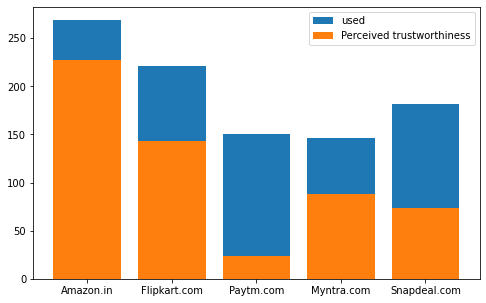

In [ ]:
retail_trust = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Perceived Trustworthiness']:
  if 'Amazon.in' in row:
    retail_trust['Amazon.in'] = retail_trust.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_trust['Flipkart.com'] = retail_trust.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_trust['Paytm.com'] = retail_trust.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_trust['Myntra.com'] = retail_trust.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_trust['Snapdeal.com'] = retail_trust.get('Snapdeal.com') + 1
  
for k,v in retail_trust.items():
  print(f'{v} customers feel that the {k} site has perceived trustworthy.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_trust.keys()
values = retail_trust.values()
plt.bar(keys, values)
plt.legend(['used','Perceived trustworthiness'])
plt.show()

Observations:
1. The most trustworthy site is Amazon.
2. The least trustworthy site per the survey is Paytm.

68 customers feel that the Amazon.in site has Longer page loading time.
61 customers feel that the Flipkart.com site has Longer page loading time.
94 customers feel that the Paytm.com site has Longer page loading time.
68 customers feel that the Myntra.com site has Longer page loading time.
63 customers feel that the Snapdeal.com site has Longer page loading time.


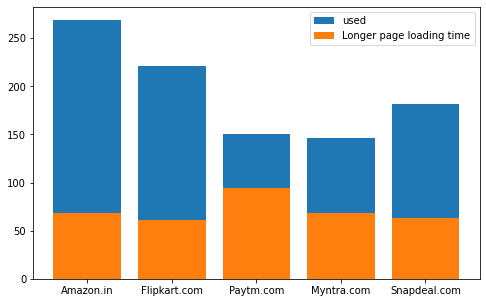

In [ ]:
retail_pgLoad = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Longer page loading time (promotion, sales period)']:
  if 'Amazon.in' in row:
    retail_pgLoad['Amazon.in'] = retail_pgLoad.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_pgLoad['Flipkart.com'] = retail_pgLoad.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_pgLoad['Paytm.com'] = retail_pgLoad.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_pgLoad['Myntra.com'] = retail_pgLoad.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_pgLoad['Snapdeal.com'] = retail_pgLoad.get('Snapdeal.com') + 1
  
for k,v in retail_pgLoad.items():
  print(f'{v} customers feel that the {k} site has Longer page loading time.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_pgLoad.keys()
values = retail_pgLoad.values()
plt.bar(keys, values)
plt.legend(['used','Longer page loading time'])
plt.show()

observations:
1. Most of the customers feel that the Paytm site has longer page loading time.
2. With respect to percentage, only a very small percentage of Amazon customers feel that the site has longer page loeading time.

37 customers feel that the Amazon.in site has Longer delivery period.
44 customers feel that the Flipkart.com site has Longer delivery period.
98 customers feel that the Paytm.com site has Longer delivery period.
26 customers feel that the Myntra.com site has Longer delivery period.
90 customers feel that the Snapdeal.com site has Longer delivery period.


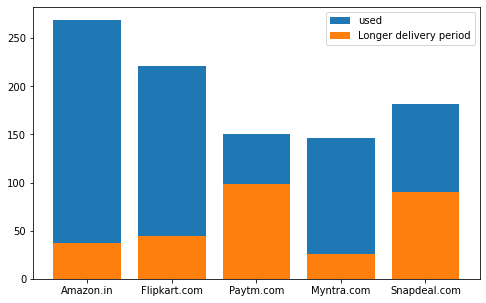

In [ ]:
retail_delv = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Longer delivery period']:
  if 'Amazon.in' in row:
    retail_delv['Amazon.in'] = retail_delv.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_delv['Flipkart.com'] = retail_delv.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_delv['Paytm.com'] = retail_delv.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_delv['Myntra.com'] = retail_delv.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_delv['Snapdeal.com'] = retail_delv.get('Snapdeal.com') + 1
  
for k,v in retail_delv.items():
  print(f'{v} customers feel that the {k} site has Longer delivery period.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_delv.keys()
values = retail_delv.values()
plt.bar(keys, values)
plt.legend(['used','Longer delivery period'])
plt.show()

Observations:
1. Paytm and Snapdeal have the longest delivery periods.
2. Most of the Amazon customers feel that the site has a reasonable delivery period.

78 customers feel that the Amazon.in site has frequent disruption when moving from one page to another.
62 customers feel that the Flipkart.com site has frequent disruption when moving from one page to another.
39 customers feel that the Paytm.com site has frequent disruption when moving from one page to another.
66 customers feel that the Myntra.com site has frequent disruption when moving from one page to another.
74 customers feel that the Snapdeal.com site has frequent disruption when moving from one page to another.


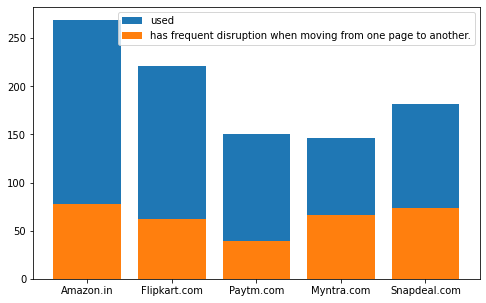

In [ ]:
retail_disr = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Frequent disruption when moving from one page to another']:
  if 'Amazon.in' in row:
    retail_disr['Amazon.in'] = retail_disr.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_disr['Flipkart.com'] = retail_disr.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_disr['Paytm.com'] = retail_disr.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_disr['Myntra.com'] = retail_disr.get('Myntra.com') + 1
  if 'Snapdeal' in row:
    retail_disr['Snapdeal.com'] = retail_disr.get('Snapdeal.com') + 1
  
for k,v in retail_disr.items():
  print(f'{v} customers feel that the {k} site has frequent disruption when moving from one page to another.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)


keys = retail_disr.keys()
values = retail_disr.values()
plt.bar(keys, values)
plt.legend(['used','has frequent disruption when moving from one page to another.'])
plt.show()

Observations:
1. With respect to percentage, Myntra has the most votes as the site with frequent disruption whenm moving from one page to another.

219 customers have recommended the Amazon.in site.
127 customers have recommended the Flipkart.com site.
44 customers have recommended the Paytm.com site.
76 customers have recommended the Myntra.com site.
11 customers have recommended the Snapdeal.com site.


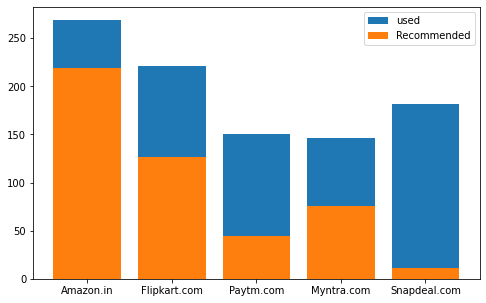

In [ ]:
retail_recomd = {'Amazon.in':0, 'Flipkart.com':0, 'Paytm.com':0, 'Myntra.com':0, 'Snapdeal.com':0}
for row in df['Which of the Indian online retailer would you recommend to a friend?']:
  if 'Amazon.in' in row:
    retail_recomd['Amazon.in'] = retail_recomd.get('Amazon.in') + 1
  if 'Flipkart.com' in row:
    retail_recomd['Flipkart.com'] = retail_recomd.get('Flipkart.com') + 1
  if 'Paytm.com' in row:
    retail_recomd['Paytm.com'] = retail_recomd.get('Paytm.com') + 1
  if 'Myntra.com' in row:
    retail_recomd['Myntra.com'] = retail_recomd.get('Myntra.com') + 1
  if 'snapdeal.com' in row:
    retail_recomd['Snapdeal.com'] = retail_recomd.get('Snapdeal.com') + 1
  
for k,v in retail_recomd.items():
  print(f'{v} customers have recommended the {k} site.')


used_keys = retail_used.keys()
used_values = retail_used.values()
plt.figure(figsize=(8,5))
plt.bar(used_keys, used_values)

keys = retail_recomd.keys()
values = retail_recomd.values()
plt.bar(keys, values)
plt.legend(['used','Recommended'])
plt.show()

Observations:
1. Amazon is the most recommended store followed by Flipkart.
2. Snapdeal is the least recommended store though it is used by more customers than Paytm and Myntra.

In [ ]:
df['Amazon_recommend'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x : 1 if 'Amazon.in' in x else 0)
df['Flipkart_recommend'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x : 1 if 'Flipkart.com' in x else 0)
df['Paytm_recommend'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x : 1 if 'Paytm.com' in x else 0)
df['Myntra_recommend'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x : 1 if 'Myntra.com' in x else 0)
df['Snapdeal_recommend'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x : 1 if 'snapdeal.com' in x else 0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

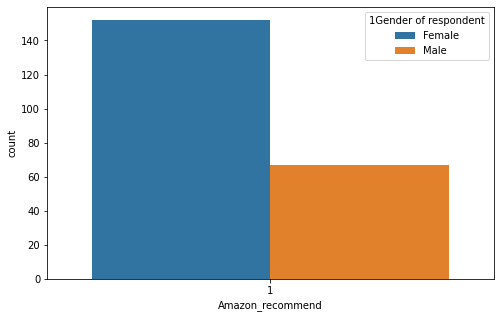

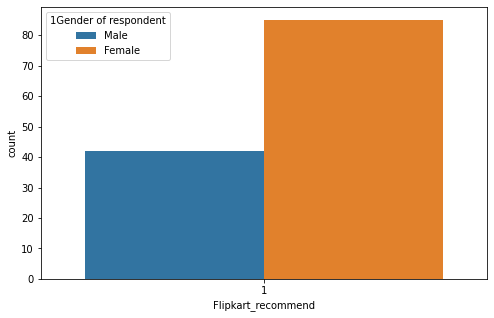

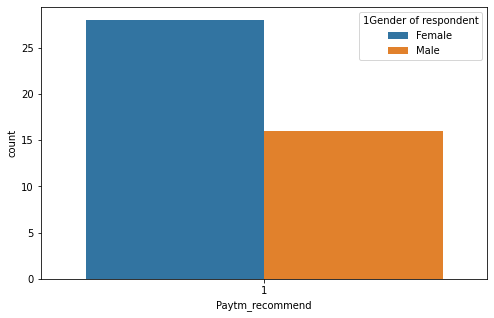

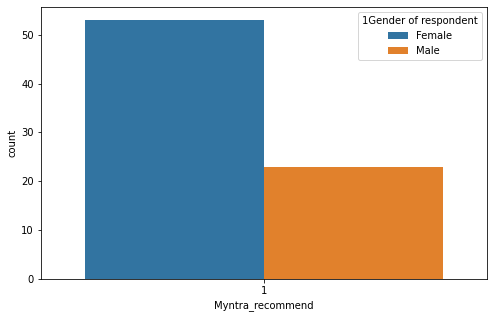

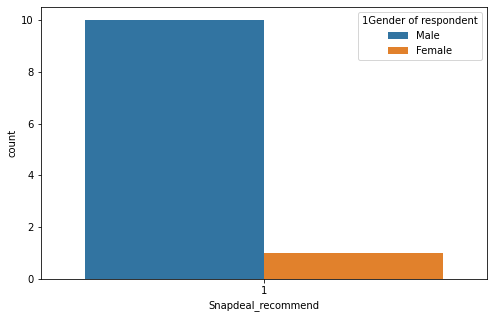

In [ ]:

sites = ['Amazon_recommend', 'Flipkart_recommend', 'Paytm_recommend', 'Myntra_recommend', 'Snapdeal_recommend']

for site in sites:
  users = df[df[site]==1]
  plt.figure(figsize=(8,5))
  sns.countplot(users[site], hue=users['1Gender of respondent'])
plt.show()

Observations:
1. Except the Snapdeal site, all the other sites are recommended more by female.
2. The total recommendation for Snapdeal site is pretty low.
3. Though Snapdeal is used more by female customers, it is not recommended as much by feamle customers.